In [1]:
#!pip install statsmodels

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 

import os
import time

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from lightgbm import LGBMClassifier

import pickle

In [2]:
#!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

In [3]:
# os.getcwd()

In [4]:
# os.chdir('/home/flame/Desktop/Projects/Churn Prediction/Complete Work/Project Work/Notes 2/')

In [5]:
data = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name='E Comm')
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [6]:
# os.chdir('/home/flame/Desktop/Projects/Churn Prediction/')

# EDA and Data Pre-Processing

In [7]:
data.shape

(5630, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
data.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [10]:
data.drop('CustomerID', axis=1, inplace=True)

In [11]:
cat =[]
num =[]

for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [12]:
print('cat = ' + str(cat))
print('num = ' + str(num))

cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [13]:
data = data[['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus','Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

In [14]:
data.head()

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0         Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                Phone                  UPI    Male              Mobile   
2                Phone           Debit Card    Male              Mobile   
3                Phone           Debit Card    Male  Laptop & Accessory   
4                Phone                   CC    Male              Mobile   

  MaritalStatus  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        Single      1     4.0         3              6.0             3.0   
1        Single      1     NaN         1              8.0             3.0   
2        Single      1     NaN         1             30.0             2.0   
3        Single      1     0.0         3             15.0             2.0   
4        Single      1     0.0         1             12.0             NaN   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0         1.0                0.0   
2                         14.0         0.0         1.0                3.0   
3                         23.0         0.0         1.0                3.0   
4                         11.0         1.0         1.0                3.0   

   CashbackAmount  
0          159.93  
1          120.90  
2          120.28  
3          134.07  
4          129.60

In [15]:
data.isnull().sum()

PreferredLoginDevice             0
PreferredPaymentMode             0
Gender                           0
PreferedOrderCat                 0
MaritalStatus                    0
Churn                            0
Tenure                         264
CityTier                         0
WarehouseToHome                251
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
SatisfactionScore                0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [17]:
imputer = imputer.fit(data.iloc[:, 5:19])
data.iloc[:, 5:19] = imputer.transform(data.iloc[:, 5:19])

In [18]:
data.isnull().sum()

PreferredLoginDevice           0
PreferredPaymentMode           0
Gender                         0
PreferedOrderCat               0
MaritalStatus                  0
Churn                          0
Tenure                         0
CityTier                       0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [19]:
for i in data.columns:
    if data[i].dtype =='object':
        print(i.upper(), ': ', data[i].nunique())
        print(data[i].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  3
PreferredLoginDevice
Phone           1231
Computer        1634
Mobile Phone    2765
Name: count, dtype: int64


PREFERREDPAYMENTMODE :  7
PreferredPaymentMode
Cash on Delivery     149
CC                   273
COD                  365
UPI                  414
E wallet             614
Credit Card         1501
Debit Card          2314
Name: count, dtype: int64


GENDER :  2
Gender
Female    2246
Male      3384
Name: count, dtype: int64


PREFEREDORDERCAT :  6
PreferedOrderCat
Others                 264
Grocery                410
Mobile                 809
Fashion                826
Mobile Phone          1271
Laptop & Accessory    2050
Name: count, dtype: int64


MARITALSTATUS :  3
MaritalStatus
Divorced     848
Single      1796
Married     2986
Name: count, dtype: int64




## Univariate Analysis

In [20]:
num

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

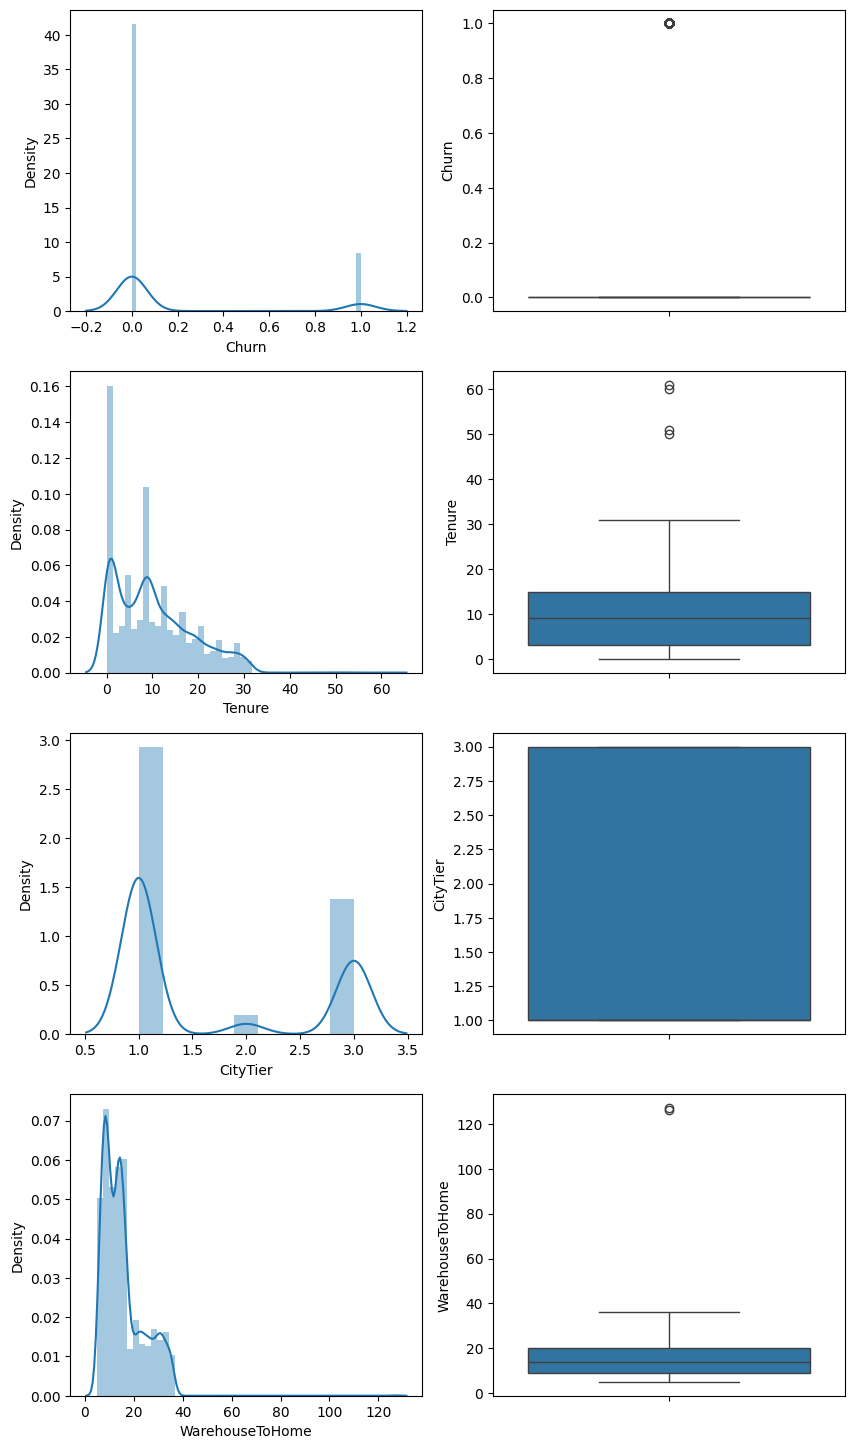

In [21]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(data['Churn'] , ax=axes[0][0])
a = sns.boxplot(data['Churn'] , ax=axes[0][1])

a = sns.distplot(data['Tenure'], ax=axes[1][0])
a = sns.boxplot(data['Tenure'] , ax=axes[1][1])

a = sns.distplot(data['CityTier'] , ax=axes[2][0])
a = sns.boxplot(data['CityTier'] , ax=axes[2][1])

a = sns.distplot(data['WarehouseToHome'] , ax=axes[3][0])
a = sns.boxplot(data['WarehouseToHome'] , ax=axes[3][1])
plt.show()

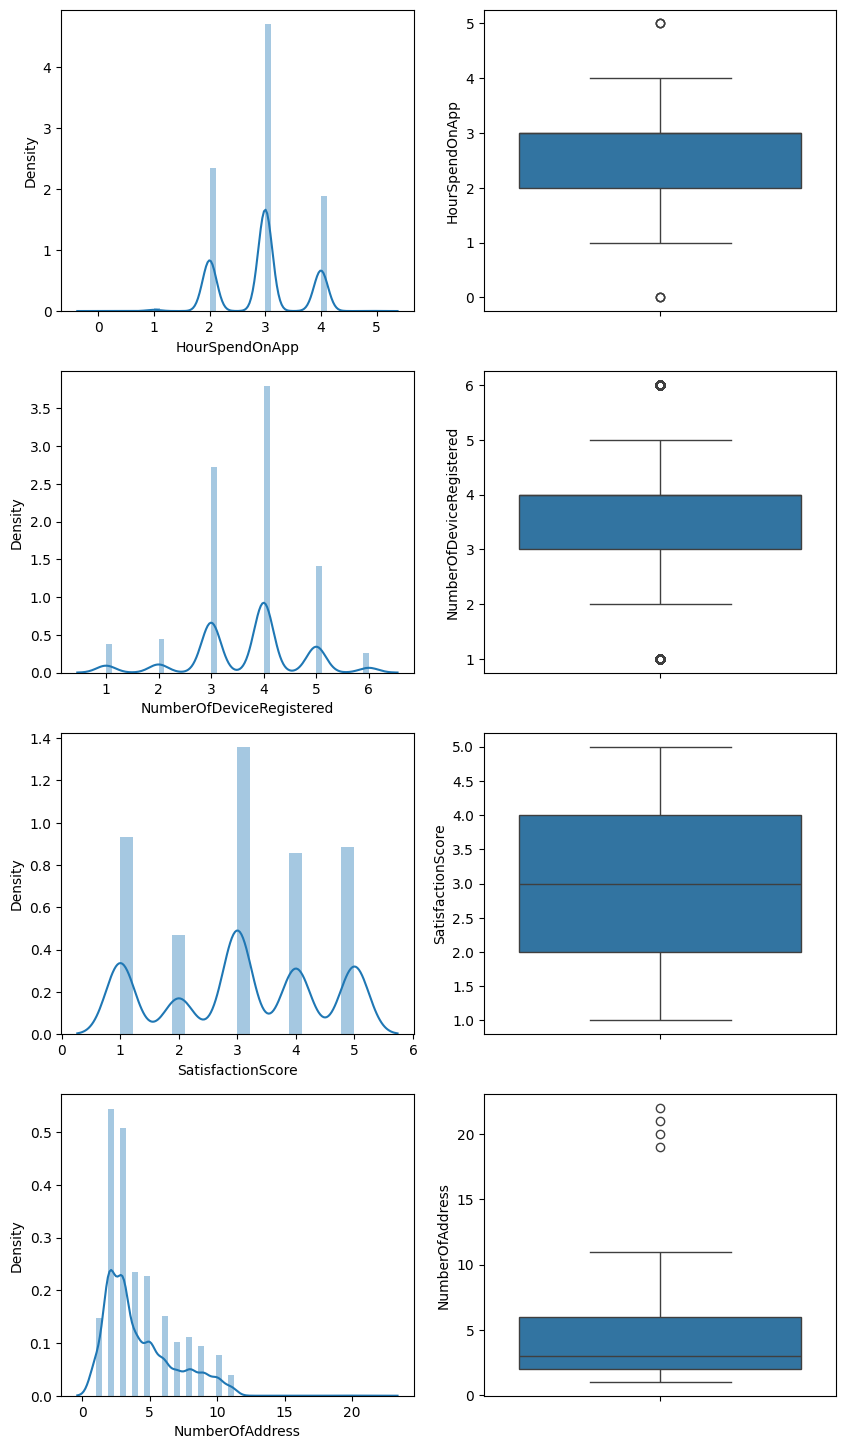

In [22]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,18)

a = sns.distplot(data['HourSpendOnApp'], ax = axes[0][0])
a = sns.boxplot(data['HourSpendOnApp'], ax = axes[0][1])

a = sns.distplot(data['NumberOfDeviceRegistered'], ax=axes[1][0])
a = sns.boxplot(data['NumberOfDeviceRegistered'], ax=axes[1][1])

a = sns.distplot(data['SatisfactionScore'], ax = axes[2][0])
a = sns.boxplot(data['SatisfactionScore'], ax = axes[2][1])

a = sns.distplot(data['NumberOfAddress'], ax = axes[3][0])
a = sns.boxplot(data['NumberOfAddress'], ax = axes[3][1])

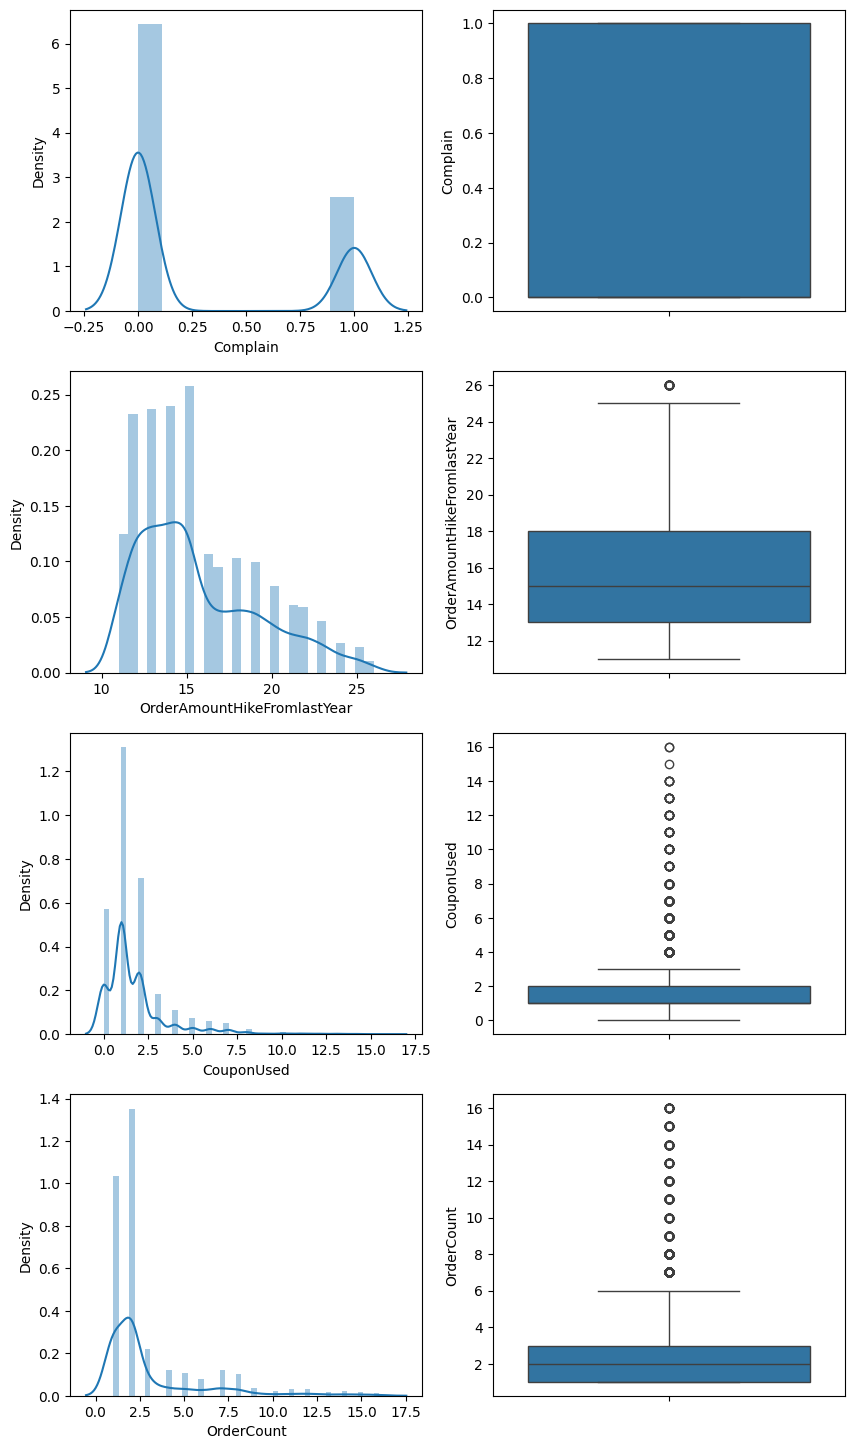

In [23]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,18)

a = sns.distplot(data['Complain'], ax = axes[0][0])
a = sns.boxplot(data['Complain'], ax = axes[0][1])

a = sns.distplot(data['OrderAmountHikeFromlastYear'], ax=axes[1][0])
a = sns.boxplot(data['OrderAmountHikeFromlastYear'], ax=axes[1][1])

a = sns.distplot(data['CouponUsed'], ax = axes[2][0])
a = sns.boxplot(data['CouponUsed'], ax = axes[2][1])

a = sns.distplot(data['OrderCount'], ax = axes[3][0])
a = sns.boxplot(data['OrderCount'], ax = axes[3][1])

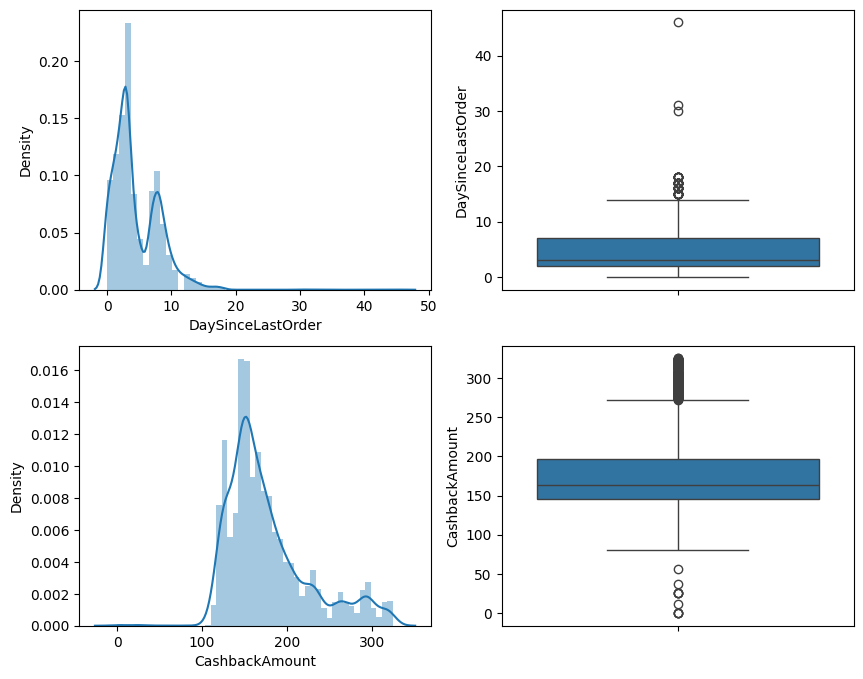

In [24]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10,8)

a = sns.distplot(data['DaySinceLastOrder'], ax = axes[0][0])
a = sns.boxplot(data['DaySinceLastOrder'], ax = axes[0][1])

a = sns.distplot(data['CashbackAmount'], ax=axes[1][0])
a = sns.boxplot(data['CashbackAmount'], ax=axes[1][1])

In [25]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

Text(0.5, 1.0, 'Preferred Login Device')

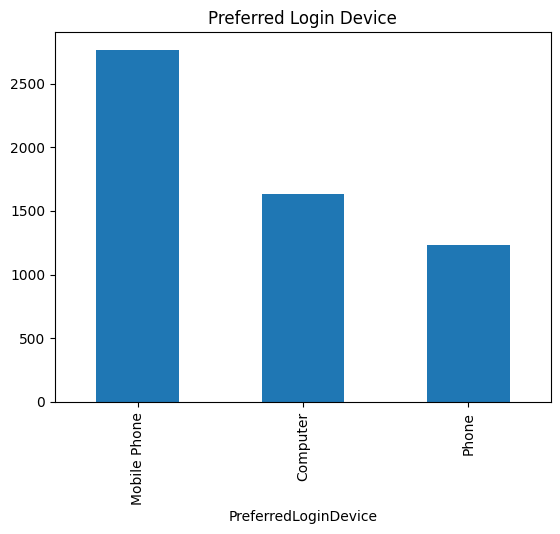

In [26]:
data['PreferredLoginDevice'].value_counts().plot(kind='bar')
plt.title('Preferred Login Device')

Text(0.5, 1.0, 'Preferred Payment Mode')

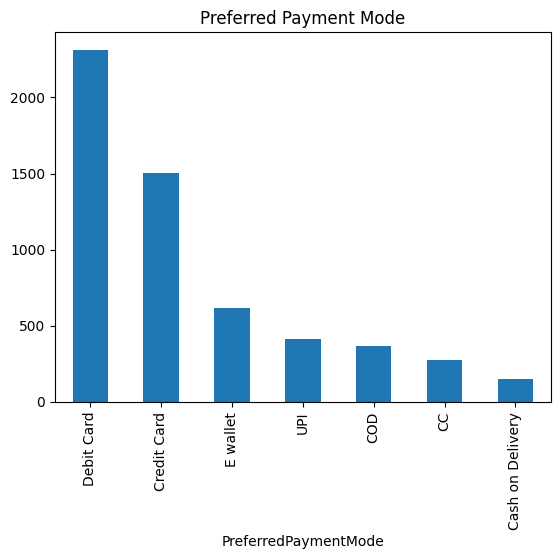

In [27]:
data['PreferredPaymentMode'].value_counts().plot(kind='bar')
plt.title('Preferred Payment Mode')

Text(0.5, 1.0, 'Gender')

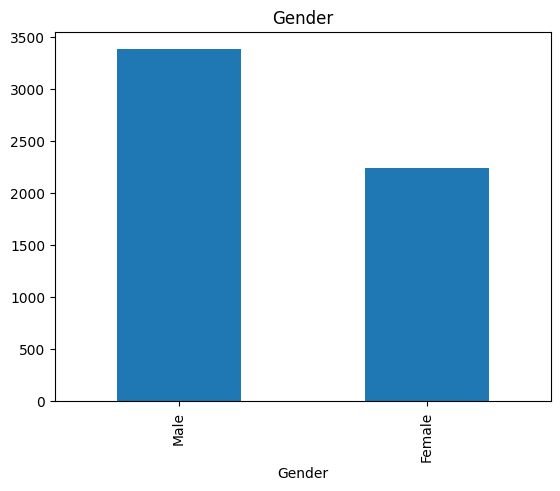

In [28]:
data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender')

Text(0.5, 1.0, 'Preferred Order Category')

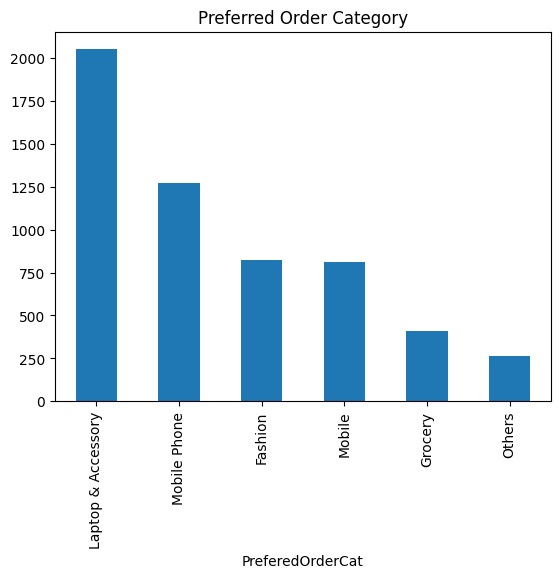

In [29]:
data['PreferedOrderCat'].value_counts().plot(kind='bar')
plt.title('Preferred Order Category')

Text(0.5, 1.0, 'Marital Status')

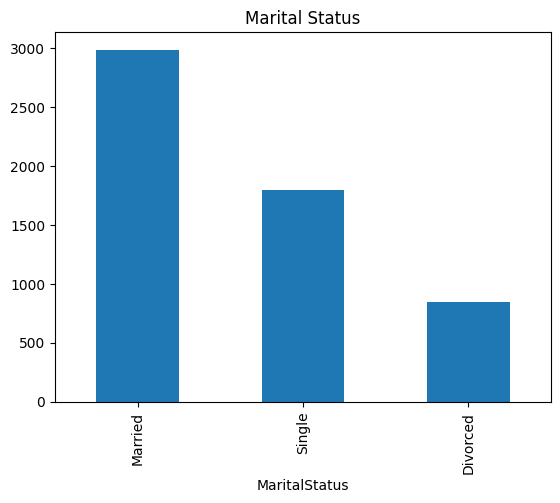

In [30]:
data['MaritalStatus'].value_counts().plot(kind='bar')
plt.title('Marital Status')

## Bivariate Analysis

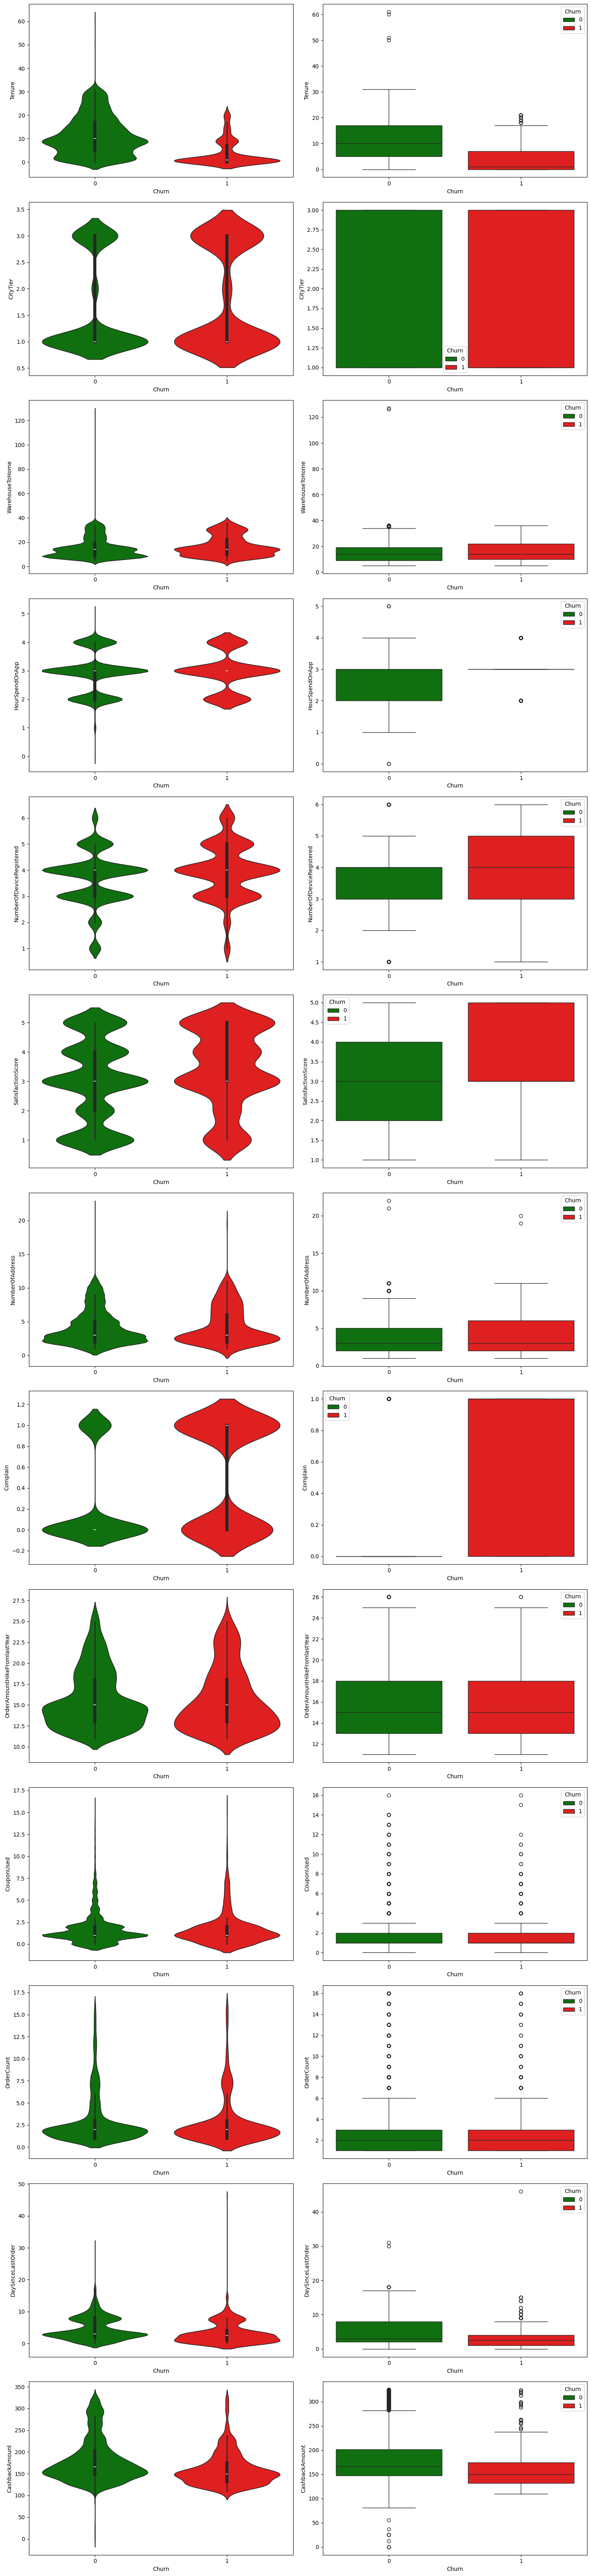

In [31]:
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
                     'NumberOfDeviceRegistered', 'SatisfactionScore', 
                     'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
                     'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5 * len(numerical_columns)))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over each numerical column
for i, column in enumerate(numerical_columns):
    # Plot violin plot
    sns.violinplot(x='Churn', y=column, data=data, hue='Churn', ax=axes[2*i], palette=['g', 'r'], legend=False)
    
    # Plot box plot
    sns.boxplot(x='Churn', y=column, data=data, ax=axes[2*i+1], palette=['g', 'r'], hue='Churn')

# Adjust layout
plt.tight_layout()
plt.show()

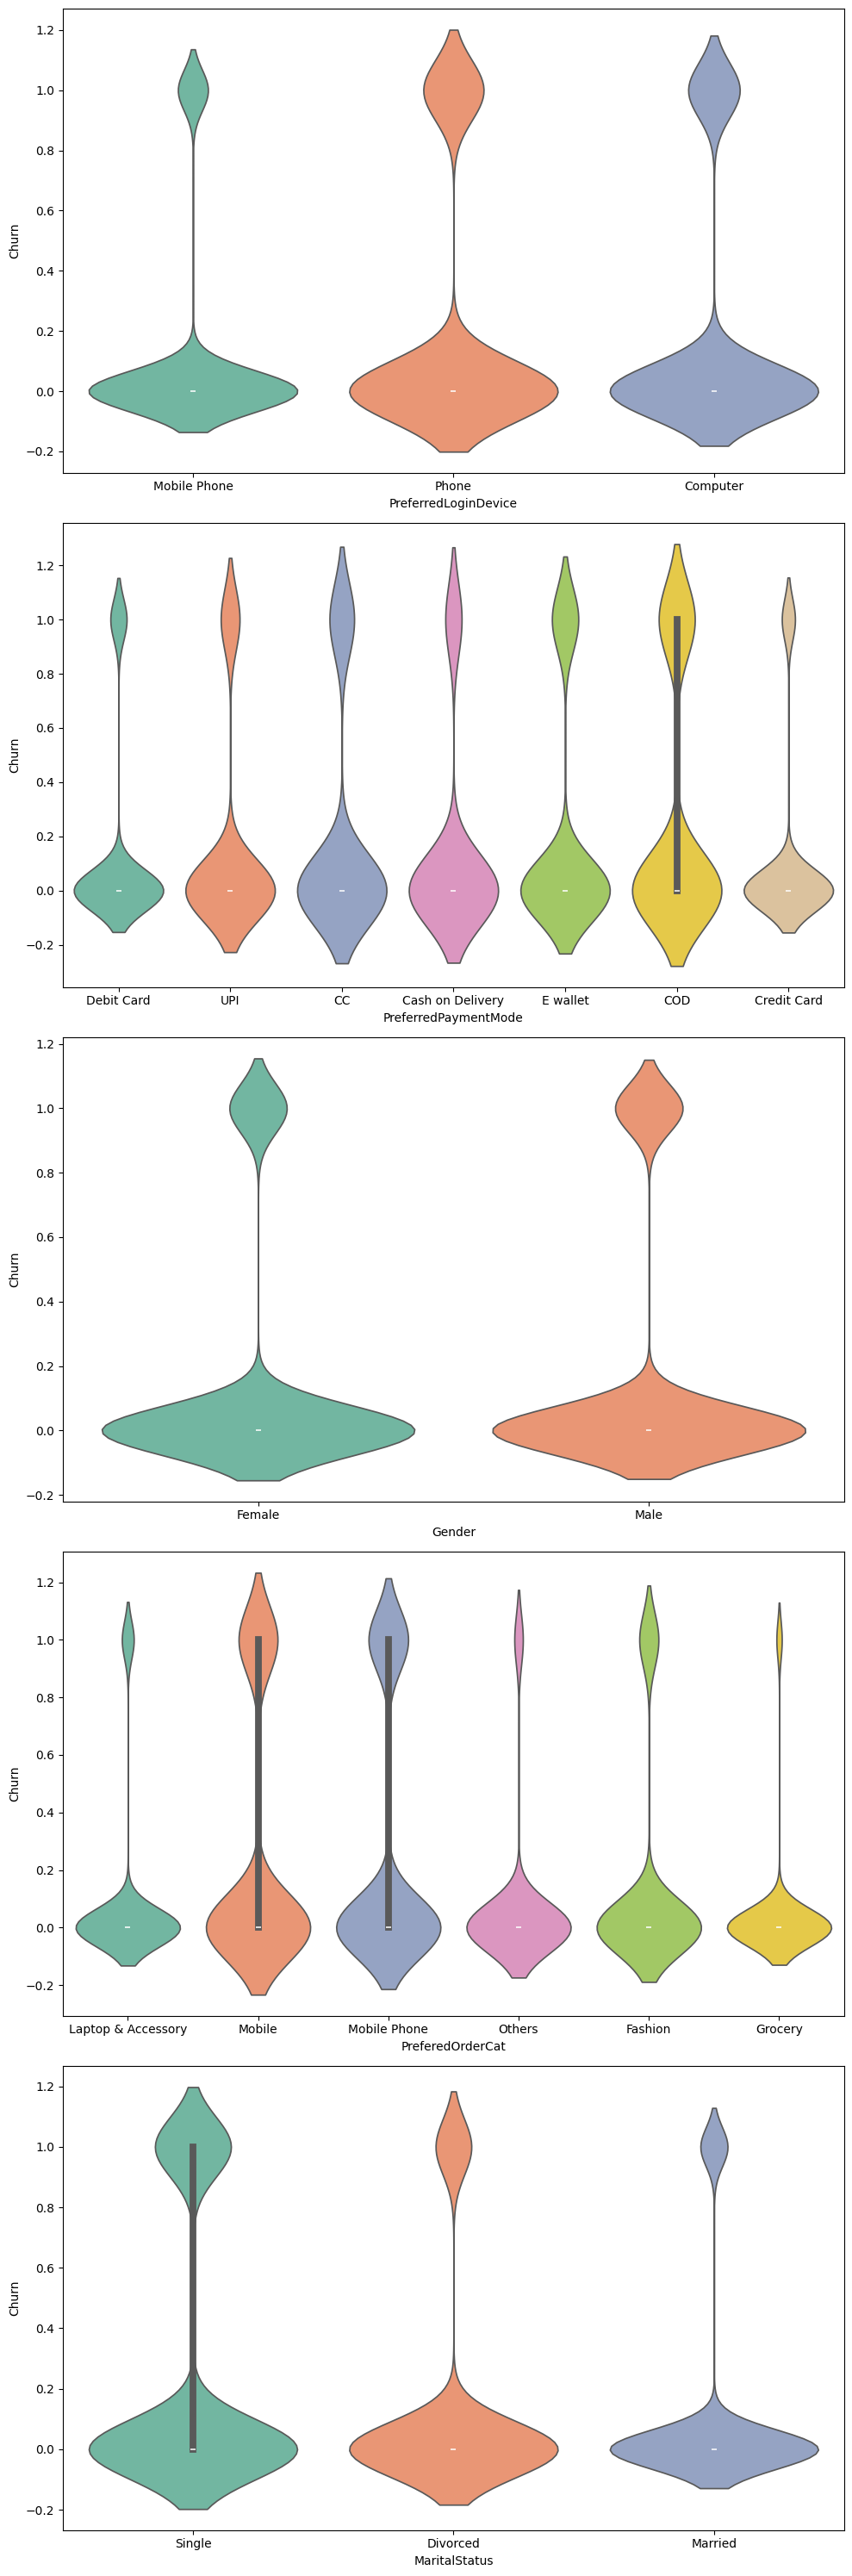

In [32]:
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 
                      'Gender', 'PreferedOrderCat', 'MaritalStatus']

# create subplots
fig, axes = plt.subplots(nrows= len(categorical_cols), ncols=1)
fig.set_size_inches(10, 30)

# loop and plot
for i, column in enumerate(categorical_cols):
    sns.violinplot(y='Churn', x=column, data=data, ax=axes[i], palette = "Set2")

# adjust the layoyt
plt.tight_layout()
plt.show()

## MultiVariate Analysis

In [33]:
# sns.pairplot(data, hue='Churn', palette =['g','r'])
# plt.title("KDE pairplot")
# plt.savefig(" KDE_Pairplot.jpg")

In [34]:
# sns.pairplot(data, kind='reg', hue ='Churn', palette =['g','r'])
# plt.title("Reg Pairplot")
# plt.savefig("Regression_Pairplot.jpg")

<Axes: >

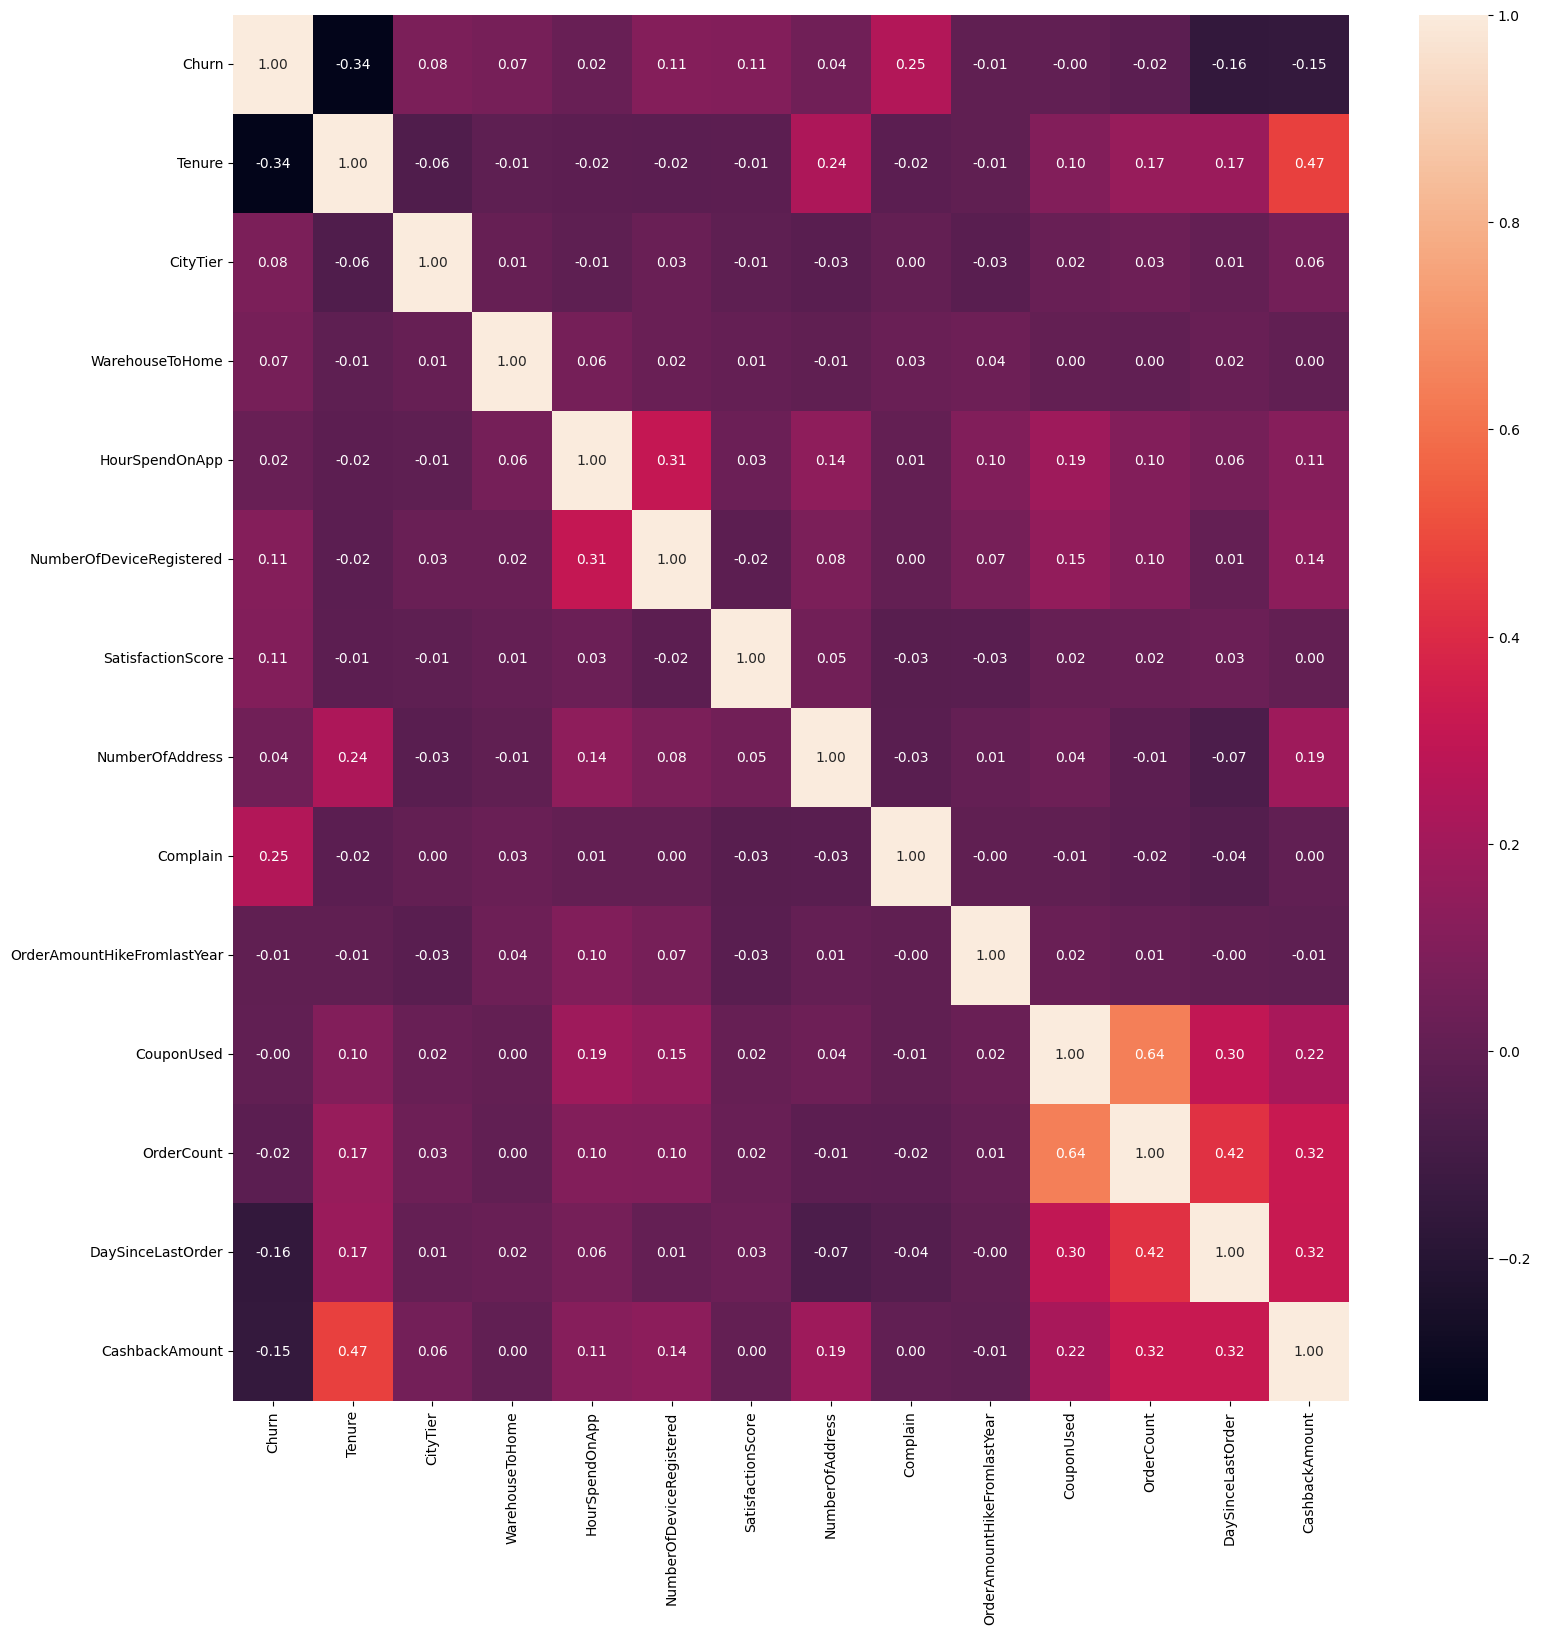

In [35]:
plt.figure(figsize=(18,18))
sns.heatmap(data[num].corr(), annot=True, fmt='.2f')
# plt.savefig("heatmap_Eda.jpg")

<Axes: xlabel='Churn'>

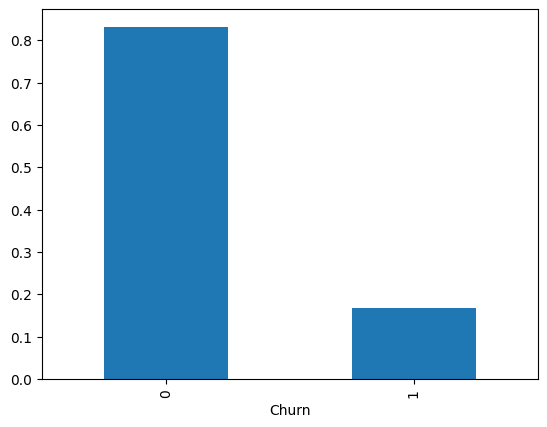

In [36]:
data['Churn'].value_counts(normalize=True).plot(kind='bar')

In [37]:
data['Churn'].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

In [38]:
data[num].skew()

Churn                          1.772843
Tenure                         0.773278
CityTier                       0.735326
WarehouseToHome                1.678346
HourSpendOnApp                -0.040982
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.835439
CouponUsed                     2.630035
OrderCount                     2.276640
DaySinceLastOrder              1.273530
CashbackAmount                 1.149846
dtype: float64

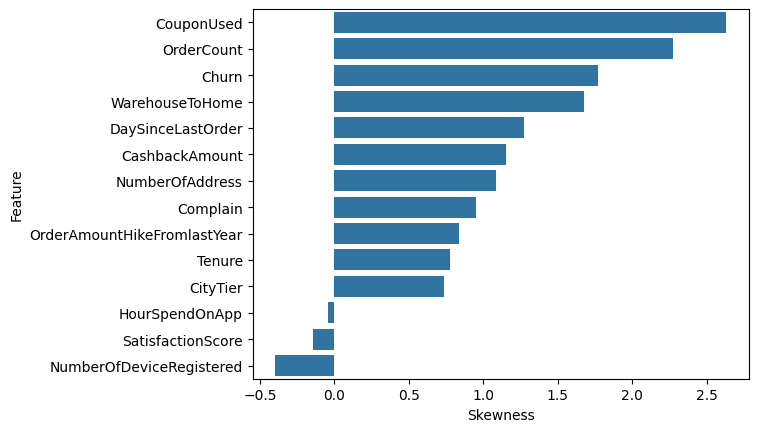

In [39]:
a = pd.DataFrame(data[num].skew()).sort_values(by=0, ascending=False)
a.reset_index(inplace=True)
a.columns = ['Feature', 'Skewness']

sns.barplot(x='Skewness', y='Feature', data=a)
plt.show()

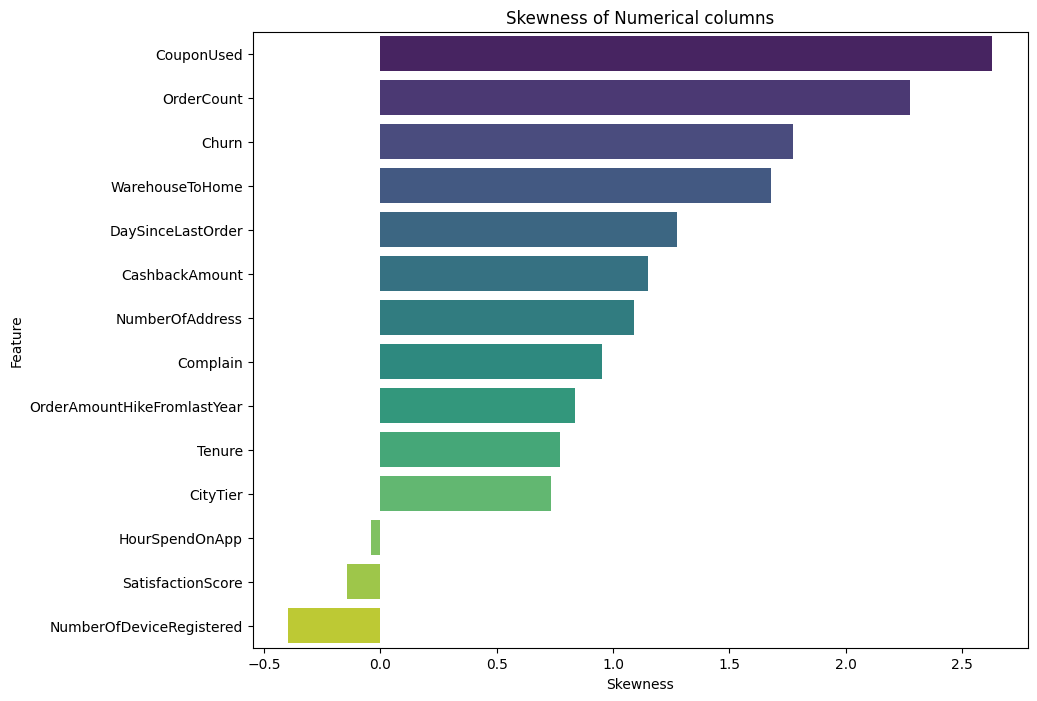

In [40]:
skewness = data[num].skew().sort_values(ascending=False)
skew_df = skewness.reset_index().rename(columns={'index':'Feature', 0:'Skewness'})

plt.figure(figsize=(10,8))
sns.barplot(x='Skewness', y='Feature', data=skew_df, palette='viridis')
plt.title('Skewness of Numerical columns')
plt.xlabel('Skewness')
plt.ylabel('Feature')
plt.show()

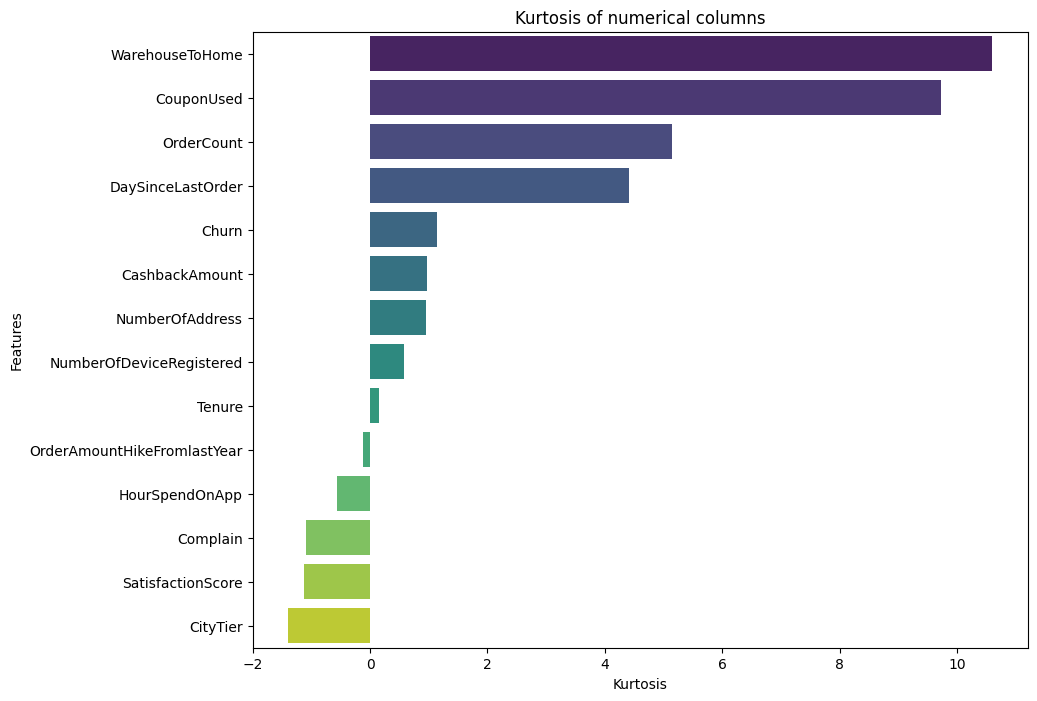

In [41]:
kurt = data[num].kurt().sort_values(ascending=False)
kurt_df = kurt.reset_index().rename(columns={'index':'Features',
                                            0:'Kurtosis'})

plt.figure(figsize=(10,8))
sns.barplot(x='Kurtosis', y='Features', data=kurt_df, palette='viridis')
plt.title('Kurtosis of numerical columns')
plt.xlabel('Kurtosis')
plt.ylabel('Features')
plt.show()

In [42]:
data[num].describe()

Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5630.000000  5630.000000  5630.000000      5630.000000     5630.000000   
mean      0.168384    10.134103     1.654707        15.566785        2.934636   
std       0.374240     8.357951     0.915389         8.345961        0.705528   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
25%       0.000000     3.000000     1.000000         9.000000        2.000000   
50%       0.000000     9.000000     1.000000        14.000000        3.000000   
75%       0.000000    15.000000     3.000000        20.000000        3.000000   
max       1.000000    61.000000     3.000000       127.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5630.000000        5630.000000      5630.000000   
mean                   3.688988           3.066785         4.214032   
std                    1.023999           1.380194         2.583586   
min                    1.000000           1.000000         1.000000   
25%                    3.000000           2.000000         2.000000   
50%                    4.000000           3.000000         3.000000   
75%                    4.000000           4.000000         6.000000   
max                    6.000000           5.000000        22.000000   

          Complain  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count  5630.000000                  5630.000000  5630.000000  5630.000000   
mean      0.284902                    15.674600     1.716874     2.961812   
std       0.451408                     3.591058     1.857640     2.879248   
min       0.000000                    11.000000     0.000000     1.000000   
25%       0.000000                    13.000000     1.000000     1.000000   
50%       0.000000                    15.000000     1.000000     2.000000   
75%       1.000000                    18.000000     2.000000     3.000000   
max       1.000000                    26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        5630.000000     5630.000000  
mean            4.459325      177.223030  
std             3.570626       49.207036  
min             0.000000        0.000000  
25%             2.000000      145.770000  
50%             3.000000      163.280000  
75%             7.000000      196.392500  
max            46.000000      324.990000

## Variable Transformation and Data Encoding

In [43]:
print(cat)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [44]:
data['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [45]:
#mobile phone and phones should be combined into a single category
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'})
data['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Phone       3996
Computer    1634
Name: count, dtype: int64

In [46]:
data['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [47]:
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'Credit Card':'CC', 'Cash on Delivery':'COD','E wallet':'UPI', 'Debit Card':'DC'})
data['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
DC     2314
CC     1774
UPI    1028
COD     514
Name: count, dtype: int64

In [48]:
data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [49]:
# we should combine mobile phone and mobile together
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace({'Mobile Phone':'Mobile', 'Laptop & Accessory':'Laptop_adons'})
data['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile          2080
Laptop_adons    2050
Fashion          826
Grocery          410
Others           264
Name: count, dtype: int64

In [50]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

In [51]:
data['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

## One Hot Encoding

In [52]:
data = pd.get_dummies(data, columns=cat, dtype=int, drop_first=True)

In [53]:
data.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0      1     4.0         3              6.0             3.0   
1      1     9.0         1              8.0             3.0   
2      1     9.0         1             30.0             2.0   
3      1     0.0         3             15.0             2.0   
4      1     0.0         1             12.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_COD  \
0                         11.0  ...                         0   
1                         15.0  ...                         0   
2                         14.0  ...                         0   
3                         23.0  ...                         0   
4                         11.0  ...                         0   

   PreferredPaymentMode_DC  PreferredPaymentMode_UPI  Gender_Male  \
0                        1                         0            0   
1                        0                         1            1   
2                        1                         0            1   
3                        1                         0            1   
4                        0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop_adons  \
0                         0                              1   
1                         0                              0   
2                         0                              0   
3                         0                              1   
4                         0                              0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Others  MaritalStatus_Married  \
0                        0                        0                      0   
1                        1                        0                      0   
2                        1                        0                      0   
3                        0                        0                      0   
4                        1                        0                      0   

   MaritalStatus_Single  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 25 columns]

In [54]:
data.shape

(5630, 25)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          5630 non-null   int64  
 1   Tenure                         5630 non-null   float64
 2   CityTier                       5630 non-null   int64  
 3   WarehouseToHome                5630 non-null   float64
 4   HourSpendOnApp                 5630 non-null   float64
 5   NumberOfDeviceRegistered       5630 non-null   int64  
 6   SatisfactionScore              5630 non-null   int64  
 7   NumberOfAddress                5630 non-null   int64  
 8   Complain                       5630 non-null   int64  
 9   OrderAmountHikeFromlastYear    5630 non-null   float64
 10  CouponUsed                     5630 non-null   float64
 11  OrderCount                     5630 non-null   float64
 12  DaySinceLastOrder              5630 non-null   f

## Outlier Treatment 

In [56]:
num

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [57]:
cols = {'Churn','CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','Complain'}

num1 = [ele for ele in num if ele not in cols]
print(num1)

['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


Text(0.5, 1.0, 'Outliers Before Treatmen')

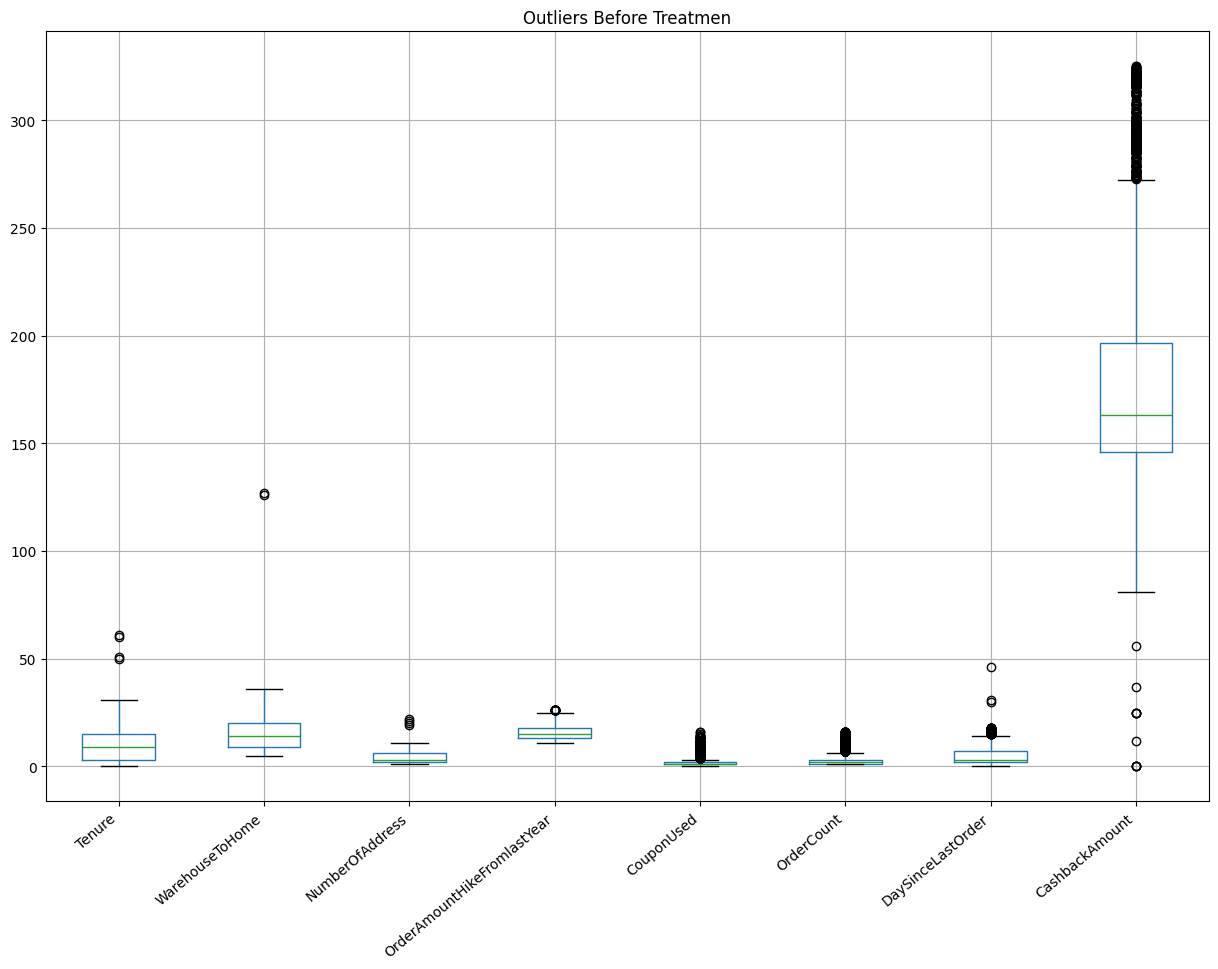

In [58]:
plt.figure(figsize=(15,10))
a = data[num1].boxplot()
a.set_xticklabels(a.get_xticklabels() ,rotation=40, ha="right")
plt.title('Outliers Before Treatmen')
# plt.savefig('Boxplot before treatment.jpg')

In [59]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR) 
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [60]:
for column in data[num1].columns:
    lr,ur=remove_outliers(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

Text(0.5, 1.0, 'Outliers Before Treatment')

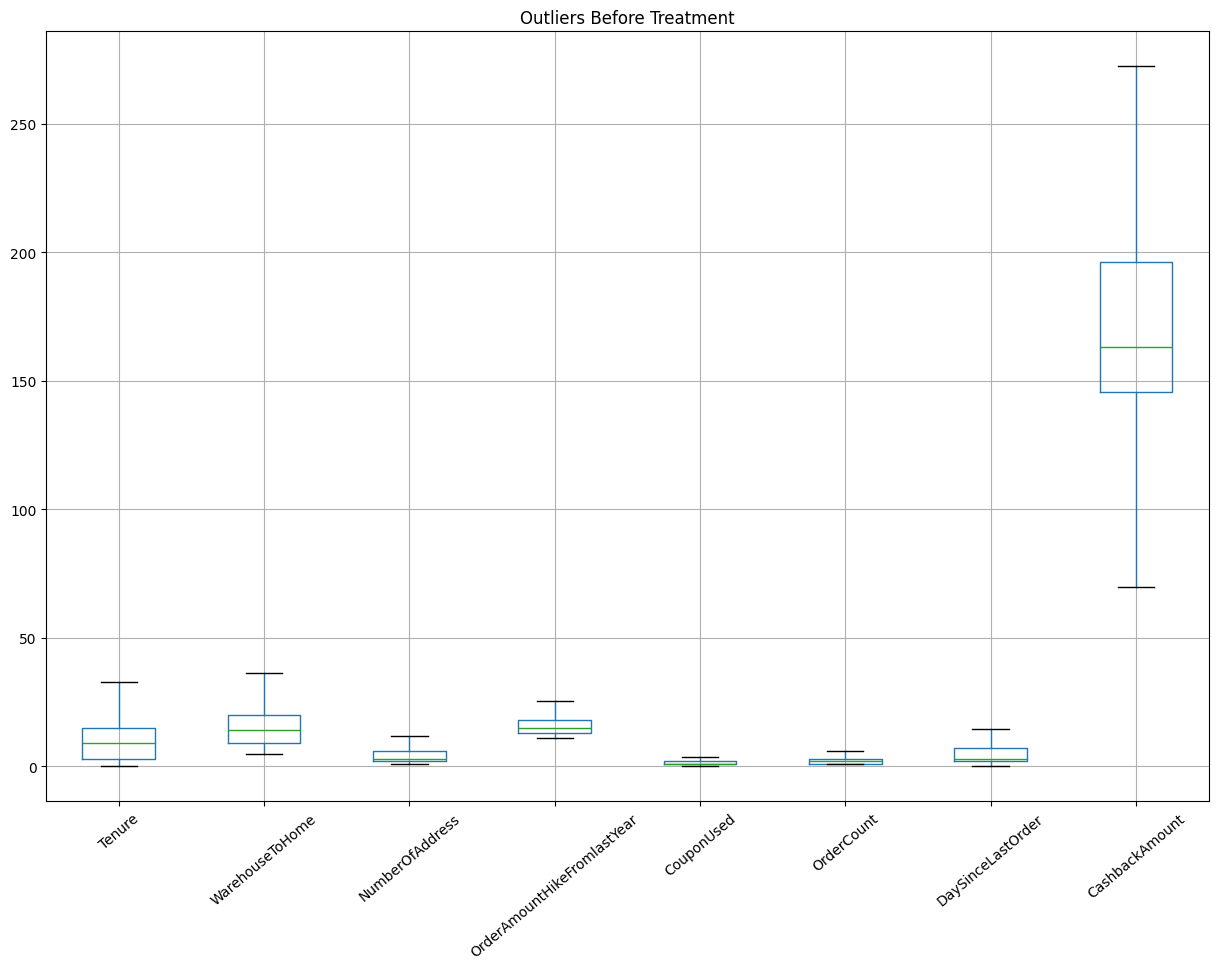

In [61]:
plt.figure(figsize=(15,10))
a = data[num1].boxplot()
a.set_xticklabels(a.get_xticklabels(), rotation=40)
plt.title('Outliers Before Treatment')
# plt.savefig('outliers after treatment.jpg')

In [62]:
data.head()

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0      1     4.0         3              6.0             3.0   
1      1     9.0         1              8.0             3.0   
2      1     9.0         1             30.0             2.0   
3      1     0.0         3             15.0             2.0   
4      1     0.0         1             12.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2              9.0         1   
1                         4                  3              7.0         1   
2                         4                  3              6.0         1   
3                         4                  5              8.0         0   
4                         3                  5              3.0         0   

   OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_COD  \
0                         11.0  ...                         0   
1                         15.0  ...                         0   
2                         14.0  ...                         0   
3                         23.0  ...                         0   
4                         11.0  ...                         0   

   PreferredPaymentMode_DC  PreferredPaymentMode_UPI  Gender_Male  \
0                        1                         0            0   
1                        0                         1            1   
2                        1                         0            1   
3                        1                         0            1   
4                        0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop_adons  \
0                         0                              1   
1                         0                              0   
2                         0                              0   
3                         0                              1   
4                         0                              0   

   PreferedOrderCat_Mobile  PreferedOrderCat_Others  MaritalStatus_Married  \
0                        0                        0                      0   
1                        1                        0                      0   
2                        1                        0                      0   
3                        0                        0                      0   
4                        1                        0                      0   

   MaritalStatus_Single  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 25 columns]

In [63]:
data.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_DC',
       'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop_adons', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

## Train Test Split

In [64]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

## Scaling Pipeline

In [66]:
print(X.columns[:13])
print('\n')
print(X.columns[13:])

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


Index(['PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_DC', 'PreferredPaymentMode_UPI', 'Gender_Male',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop_adons',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')


In [67]:
numerical_cols = X.columns[:13]
categorical_cols = X.columns[13:]

In [68]:
print(len(categorical_cols))
print(len(numerical_cols))

11
13


In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Pre Processing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ], remainder='passthrough')

# Fit and transform the Training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

## Clustering (For Feature Engineering)

### K- Means Clustering

In [70]:
from sklearn.cluster import KMeans

# determine the wss at various cluster levels
wss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_processed)
    wss.append((i, kmeans.inertia_))

# print the wss at 
for cluster_num, wss_value in wss:
    print(f"Number of clusters: {cluster_num}, WSS: {wss_value}")

Number of clusters: 1, WSS: 58956.65947729001
Number of clusters: 2, WSS: 52270.32356490779
Number of clusters: 3, WSS: 48980.06801667284
Number of clusters: 4, WSS: 46296.35275116459
Number of clusters: 5, WSS: 44479.122497115124
Number of clusters: 6, WSS: 43203.07183075622
Number of clusters: 7, WSS: 42160.43582587562


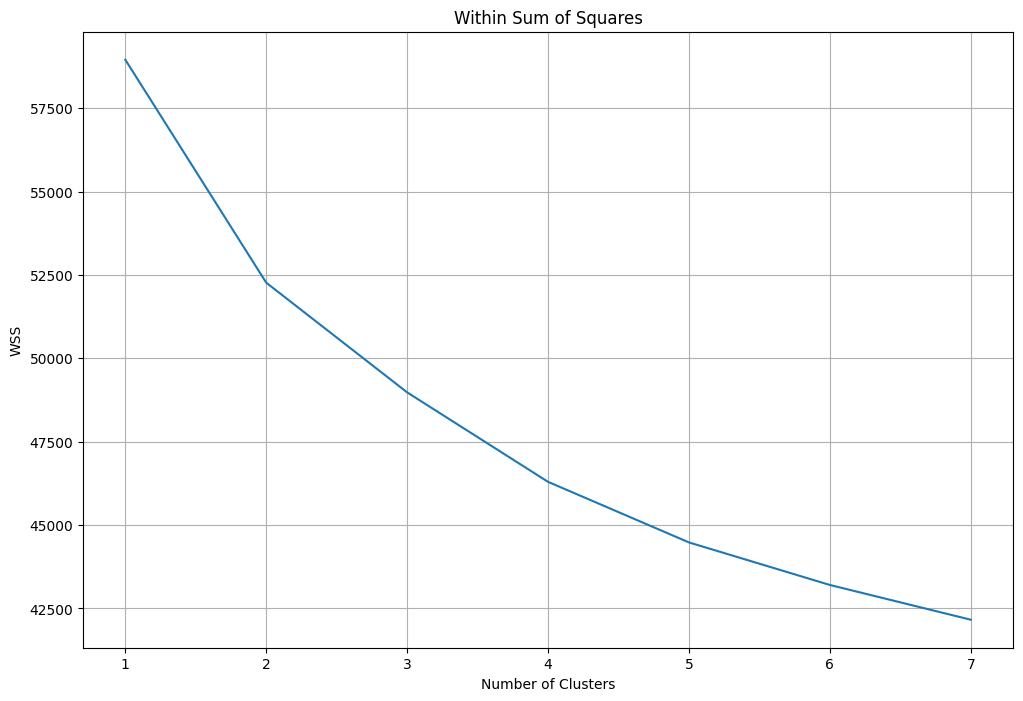

In [71]:
# plot the Wss Value
plt.figure(figsize=(12, 8))
plt.plot([t[0] for t in wss], [t[1] for t in wss])
plt.title('Within Sum of Squares')
plt.grid()
plt.ylabel('WSS')
plt.xlabel('Number of Clusters')
plt.show()

In [72]:
# Perform KMeans Clustering with 2 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_processed)

KMeans(n_clusters=4, random_state=42)

In [73]:
# Predict the Clusters for Training and Test Sets
X_train_kmeans = kmeans.predict(X_train_processed).reshape(-1, 1)
X_test_kmeans = kmeans.predict(X_test_processed).reshape(-1, 1)

### PAM Clustering

In [74]:
# from sklearn_extra.cluster import KMedoids
# from sklearn.metrics import silhouette_score

# kmedoids = KMedoids(n_clusters=7, random_state=42)
# kmedoids.fit(X_train_processed)

In [75]:
# # calculate the inertia
# pam_inertia = kmedoids.inertia_
# print(pam_inertia)

In [76]:
# # get the silhouette score for the training set
# silhouette_avg = silhouette_score(X_train_processed, kmedoids.labels_)
# print(silhouette_avg)

In [77]:
# # predict clusters for training and test sets
# X_train_pam = kmedoids.predict(X_train_processed).reshape(-1,1)
# X_test_pam = kmedoids.predict(X_test_processed).reshape(-1,1)

### Adding the K-Means to the Data

In [78]:
X_train_final = np.hstack((X_train_processed, X_train_kmeans))
X_test_final  = np.hstack((X_test_processed, X_test_kmeans))

In [79]:
X_train_final

array([[-1.21564446, -0.71820467, -0.19196443, ...,  0.        ,
         1.        ,  3.        ],
       [-0.13524422, -0.71820467, -0.810147  , ...,  1.        ,
         0.        ,  3.        ],
       [-1.21564446,  0.37463109,  1.0444007 , ...,  1.        ,
         0.        ,  3.        ],
       ...,
       [-0.37533316, -0.71820467, -0.56287397, ...,  1.        ,
         0.        ,  0.        ],
       [-1.09559999, -0.71820467,  2.52803885, ...,  1.        ,
         0.        ,  0.        ],
       [-1.21564446, -0.71820467,  1.53894675, ...,  0.        ,
         0.        ,  1.        ]])

In [80]:
all_feature_names = list(numerical_cols) + list(categorical_cols) + ['KMeansCluster']
all_feature_names

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Phone',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_DC',
 'PreferredPaymentMode_UPI',
 'Gender_Male',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop_adons',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'KMeansCluster']

In [81]:
# Convert to Data Frame
x_train_final_df = pd.DataFrame(X_train_final, columns=all_feature_names)
x_test_final_df = pd.DataFrame(X_test_final, columns=all_feature_names)

## Multicollinearity Check

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF calculation
X_train_vif = pd.DataFrame(x_train_final_df, columns=all_feature_names)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

feature       VIF
20        PreferedOrderCat_Mobile  7.204212
12                 CashbackAmount  6.488653
24                  KMeansCluster  4.310446
19  PreferedOrderCat_Laptop_adons  3.768284
22          MaritalStatus_Married  3.738145
13     PreferredLoginDevice_Phone  3.191784
23           MaritalStatus_Single  2.674979
17                    Gender_Male  2.468243
18       PreferedOrderCat_Grocery  2.412533
21        PreferedOrderCat_Others  2.164094
15        PreferredPaymentMode_DC  2.146683
10                     OrderCount  2.066450
9                      CouponUsed  2.026554
16       PreferredPaymentMode_UPI  1.763137
3                  HourSpendOnApp  1.570912
0                          Tenure  1.460597
11              DaySinceLastOrder  1.446018
4        NumberOfDeviceRegistered  1.351063
1                        CityTier  1.278912
14       PreferredPaymentMode_COD  1.270080
6                 NumberOfAddress  1.184668
8     OrderAmountHikeFromlastYear  1.041771
2                 WarehouseToHome  1.023273
5               SatisfactionScore  1.019151
7                        Complain  1.015952

In [83]:
x_train = x_train_final_df
x_test = x_test_final_df

In [84]:
x_test.head()

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0 -1.095600  1.467467        -1.057420        1.507689   
1  0.585023 -0.718205        -0.810147        0.086885   
2  0.344934 -0.718205         1.662583        0.086885   
3 -0.615422 -0.718205        -1.057420        1.507689   
4  0.344934 -0.718205        -1.057420        1.507689   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                  2.252683           1.407118        -0.857760 -0.633635   
1                 -2.628460          -1.495880        -0.465462  1.578195   
2                  0.300226           1.407118        -0.465462  1.578195   
3                  1.276454           1.407118        -0.465462 -0.633635   
4                  1.276454          -1.495880        -0.465462 -0.633635   

   OrderAmountHikeFromlastYear  CouponUsed  ...  PreferredPaymentMode_DC  \
0                     1.752692    0.506899  ...                      0.0   
1                    -0.749169   -0.428787  ...                      1.0   
2                    -0.471184    0.506899  ...                      0.0   
3                    -0.749169    1.910428  ...                      1.0   
4                     0.362770    1.910428  ...                      1.0   

   PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
0                       0.0          0.0                       0.0   
1                       0.0          0.0                       0.0   
2                       0.0          0.0                       0.0   
3                       0.0          1.0                       0.0   
4                       0.0          0.0                       1.0   

   PreferedOrderCat_Laptop_adons  PreferedOrderCat_Mobile  \
0                            0.0                      1.0   
1                            1.0                      0.0   
2                            0.0                      0.0   
3                            0.0                      1.0   
4                            0.0                      0.0   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  \
0                      0.0                    0.0                   1.0   
1                      0.0                    1.0                   0.0   
2                      0.0                    0.0                   1.0   
3                      0.0                    1.0                   0.0   
4                      0.0                    1.0                   0.0   

   KMeansCluster  
0            0.0  
1            3.0  
2            2.0  
3            0.0  
4            2.0  

[5 rows x 25 columns]

## Creating Functions for Performance Metrics

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [86]:
def model_performance(model_name,
                      x_train_data,
                      y_train_data, 
                      x_test_data,
                      y_test_data): 
    
    from sklearn.metrics import confusion_matrix, classification_report

    train_preds = model_name.predict(x_train_data)
    test_preds= model_name.predict(x_test_data)
    
    a = classification_report(y_train_data, train_preds)
    b = classification_report(y_test_data, test_preds)
    
    c = round(model_name.score(x_train_data, y_train_data),4)
    d = round(model_name.score(x_test_data, y_test_data),4)
    
    print('classification report for training data')
    print(a)
    print('\n')
    print('classification report for testing data')
    print(b)
    print('\n')
    print('the model score for training data is ',c)
    print('the model score for testing data is ',d)
    print('\n')
    
    
    from seaborn import heatmap
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)

    sns.heatmap(confusion_matrix(y_test_data, test_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data')
    plt.subplot(1,2,1)

    sns.heatmap(confusion_matrix(y_train_data, train_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Training Data')
    plt.subplot(1,2,2)


In [87]:
# ROC AUC Plots
def roc_score_auc_curve(model_name,
                       x_train_data,
                       y_train_data, 
                       x_test_data,
                       y_test_data):
    from sklearn.metrics import roc_curve, roc_auc_score

    
    train_preds = model_name.predict(x_train_data)
    test_preds= model_name.predict(x_test_data)

    
    a = round(roc_auc_score(y_train_data,model_name.predict_proba(x_train_data)[:,1]),4)
    b = round(roc_auc_score(y_test,model_name.predict_proba(x_test_data)[:,1]),4)
    print('AUC Score for Model on Training Data is',a)
    print('AUC Score for Model on Testing Data is',b)
    
    plt.figure(figsize=(12,7))
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_data, model_name.predict_proba(x_train_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(train_fpr, train_tpr, marker='.', label='Training') 
  

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test_data, model_name.predict_proba(x_test_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr, test_tpr, marker='o', label='Testing')
    plt.legend()


In [88]:
def k_fold_cross_valscore(model_name, x_train_data, y_train_data, folds):
    metrics = ['recall', 'accuracy', 'precision', 'f1']
    scores = {metric: cross_val_score(model_name, x_train_data, y_train_data, cv=folds, scoring=metric, verbose=0)
              for metric in metrics}
    
    cross_val_data = pd.DataFrame(scores)
    
    for metric in metrics:
        print(f"The mean {metric} for the model after {folds} folds is {np.mean(scores[metric]):.4f}")
    
    return cross_val_data

# Modelling

### Base Models

In [90]:
# Setting up a dictionary for the base models
base_models = {
    'LDA Model': LinearDiscriminantAnalysis(),
    'Logistic Regression Model': LogisticRegression(random_state=1, max_iter=100000),
    'ADA Boost Model': AdaBoostClassifier(random_state=1),
    'Decision Tree Model': DecisionTreeClassifier(random_state=1, criterion='gini'),
    'Random Forest Model': RandomForestClassifier(random_state=1),
    'KNN Model': KNeighborsClassifier(),
    'XGB Classifier': xgb.XGBClassifier(random_state=1, use_label_encoder=False),
    'QDA Model': QuadraticDiscriminantAnalysis(),
    'MLP Classifier': MLPClassifier(random_state=1, max_iter=5000)
}

### Model Training

LDA MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3268
           1       0.75      0.49      0.59       673

    accuracy                           0.89      3941
   macro avg       0.83      0.73      0.76      3941
weighted avg       0.88      0.89      0.88      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1414
           1       0.77      0.49      0.60       275

    accuracy                           0.89      1689
   macro avg       0.84      0.73      0.77      1689
weighted avg       0.89      0.89      0.88      1689



the model score for training data is  0.8856
the model score for testing data is  0.8934


AUC Score for Model on Training Data is 0.8915
AUC Score for Model on Testing Data is 0.8792


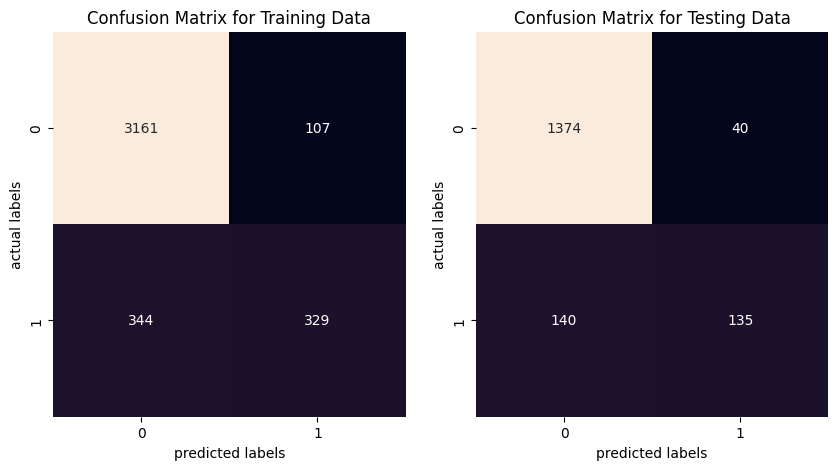

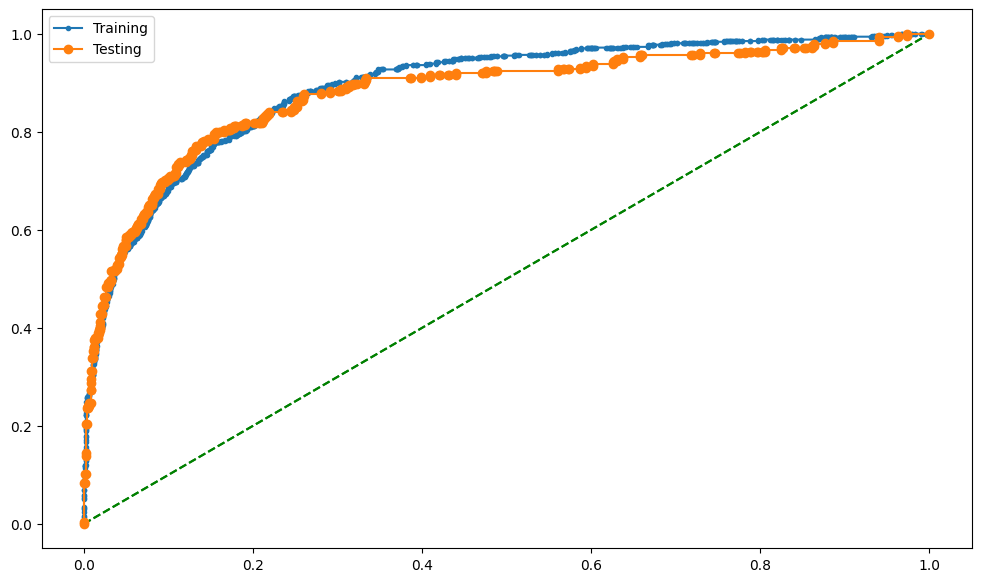

The mean recall for the model after 10 folds is 0.4788
The mean accuracy for the model after 10 folds is 0.8815
The mean precision for the model after 10 folds is 0.7353
The mean f1 for the model after 10 folds is 0.5762


#####################################################################################################################################################################################################
LOGISTIC REGRESSION MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3268
           1       0.76      0.52      0.62       673

    accuracy                           0.89      3941
   macro avg       0.83      0.74      0.78      3941
weighted avg       0.88      0.89      0.88      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1414
           1       0.75      0.53   

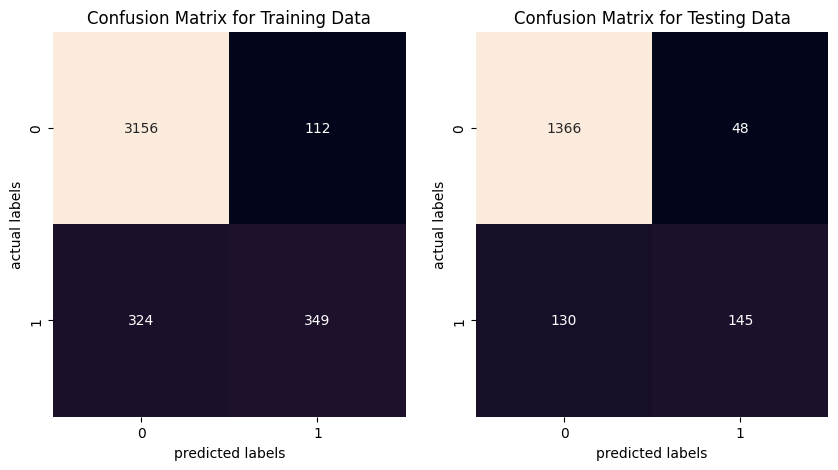

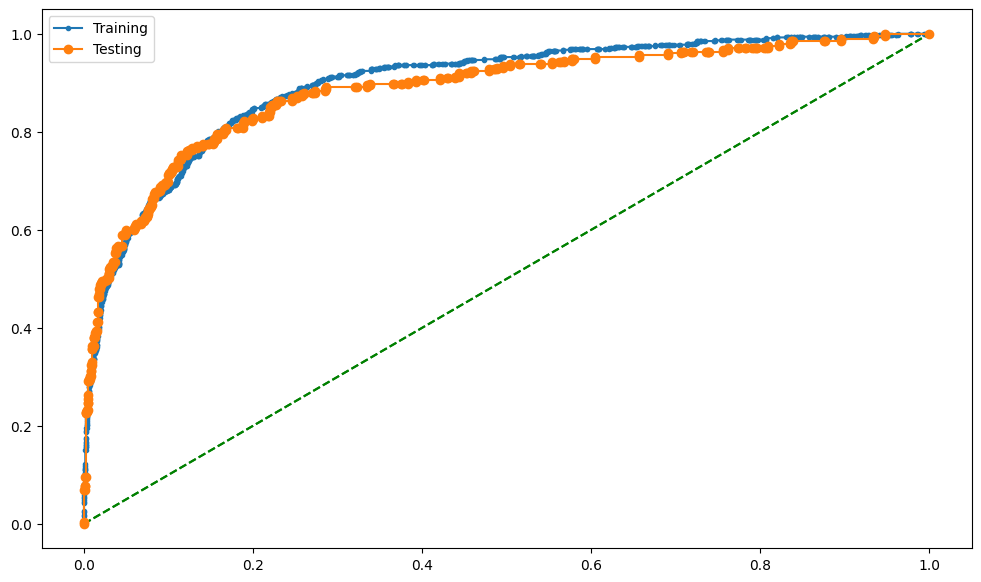

The mean recall for the model after 10 folds is 0.4995
The mean accuracy for the model after 10 folds is 0.8833
The mean precision for the model after 10 folds is 0.7343
The mean f1 for the model after 10 folds is 0.5909


#####################################################################################################################################################################################################
ADA BOOST MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3268
           1       0.77      0.61      0.68       673

    accuracy                           0.90      3941
   macro avg       0.85      0.79      0.81      3941
weighted avg       0.90      0.90      0.90      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1414
           1       0.75      0.61      0.67   

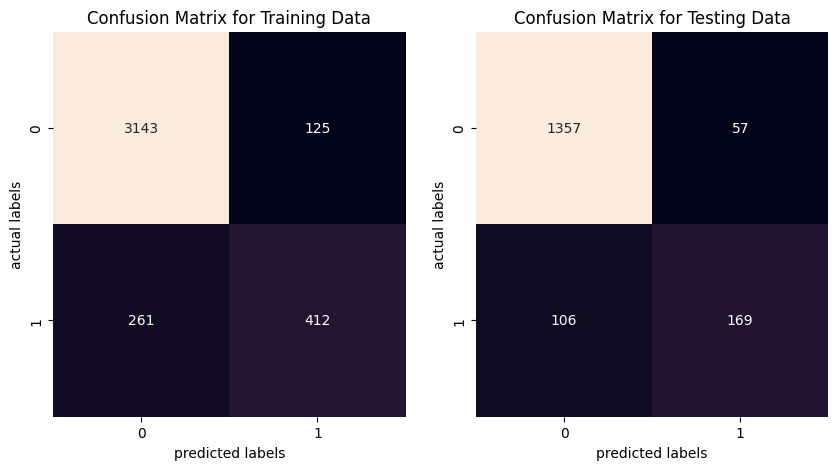

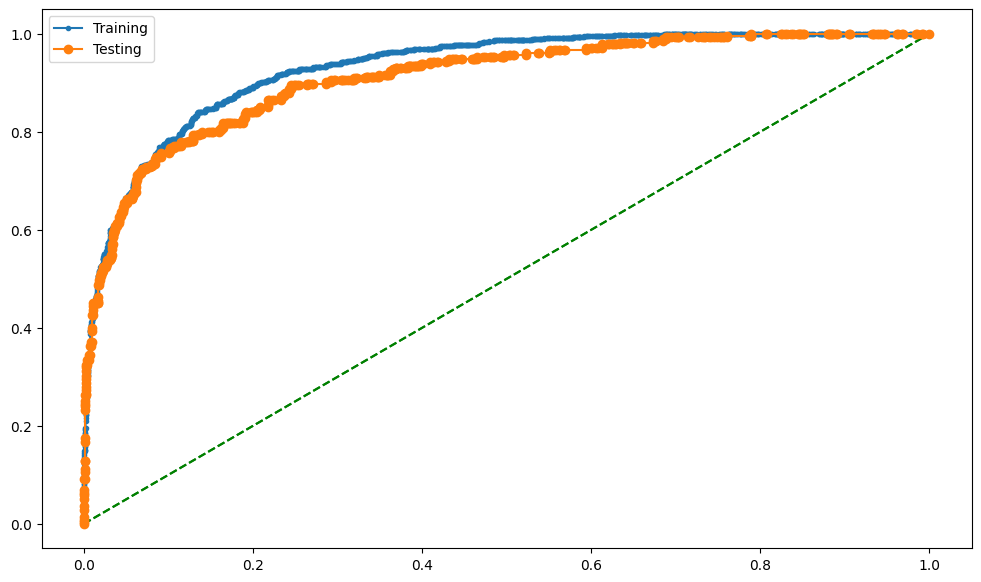

The mean recall for the model after 10 folds is 0.5737
The mean accuracy for the model after 10 folds is 0.8919
The mean precision for the model after 10 folds is 0.7371
The mean f1 for the model after 10 folds is 0.6436


#####################################################################################################################################################################################################
DECISION TREE MODEL
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      1.00      1.00       673

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1414
           1       0.82      0.85      0.8

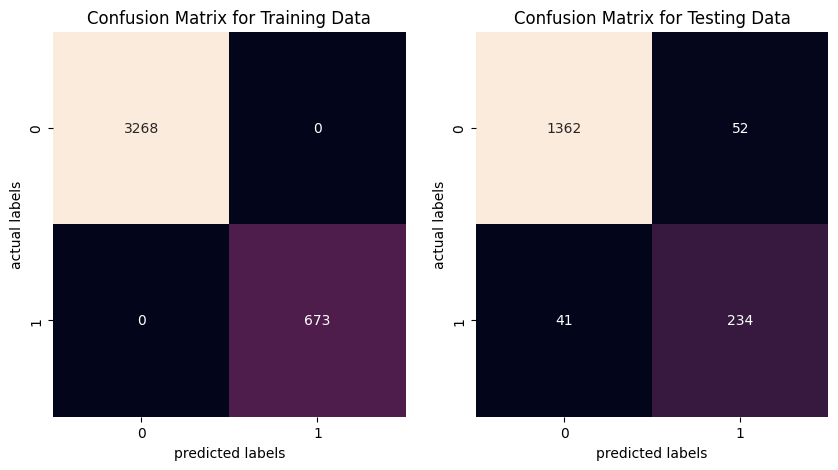

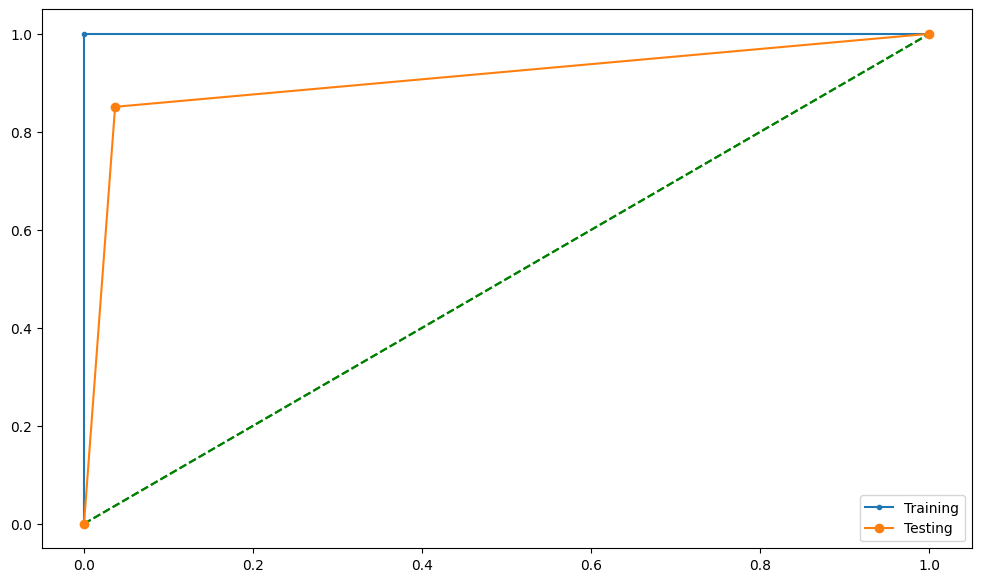

The mean recall for the model after 10 folds is 0.8264
The mean accuracy for the model after 10 folds is 0.9343
The mean precision for the model after 10 folds is 0.7986
The mean f1 for the model after 10 folds is 0.8112


#####################################################################################################################################################################################################
RANDOM FOREST MODEL
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      1.00      1.00       673

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1414
           1       0.93      0.79      0.8

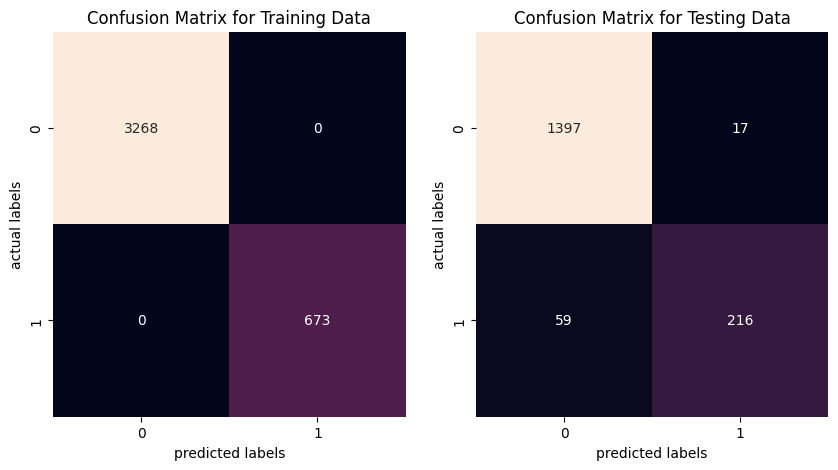

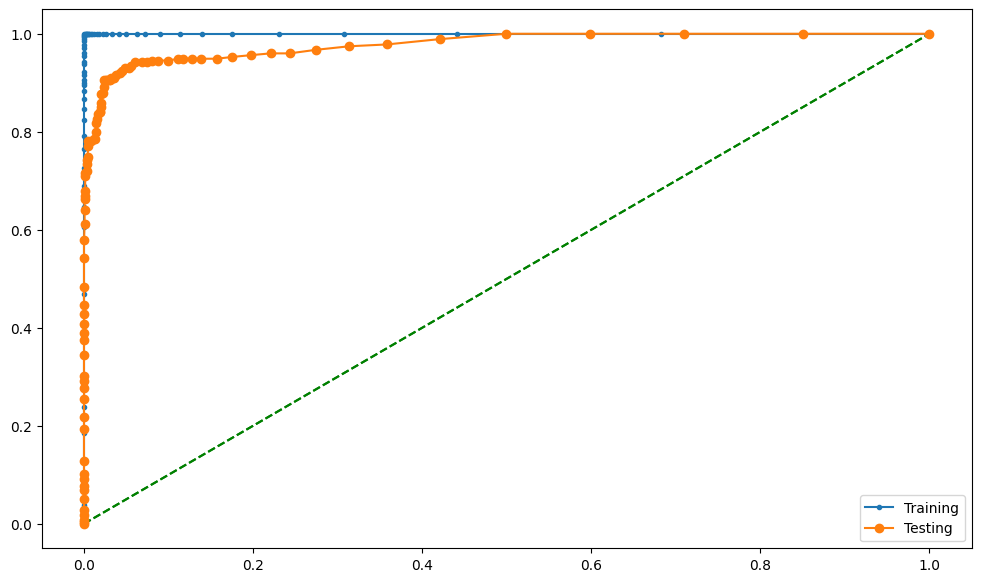

The mean recall for the model after 10 folds is 0.7834
The mean accuracy for the model after 10 folds is 0.9523
The mean precision for the model after 10 folds is 0.9271
The mean f1 for the model after 10 folds is 0.8477


#####################################################################################################################################################################################################
KNN MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3268
           1       0.90      0.66      0.76       673

    accuracy                           0.93      3941
   macro avg       0.92      0.82      0.86      3941
weighted avg       0.93      0.93      0.92      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1414
           1       0.75      0.48      0.58       27

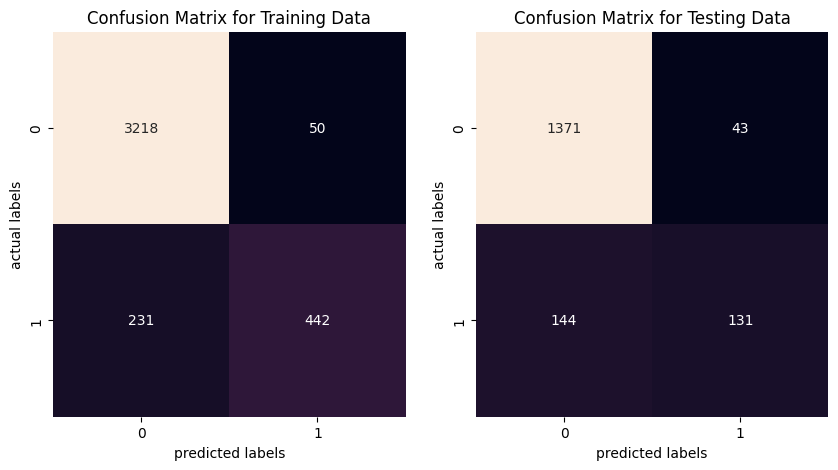

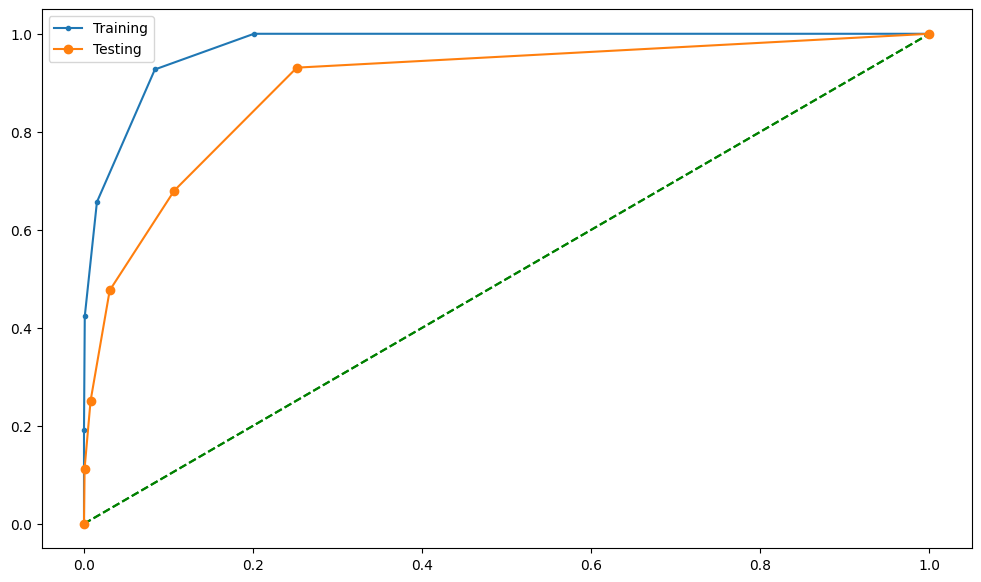

The mean recall for the model after 10 folds is 0.4653
The mean accuracy for the model after 10 folds is 0.8797
The mean precision for the model after 10 folds is 0.7339
The mean f1 for the model after 10 folds is 0.5674


#####################################################################################################################################################################################################
XGB CLASSIFIER
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      1.00      1.00       673

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1414
           1       0.92      0.89      0.90    

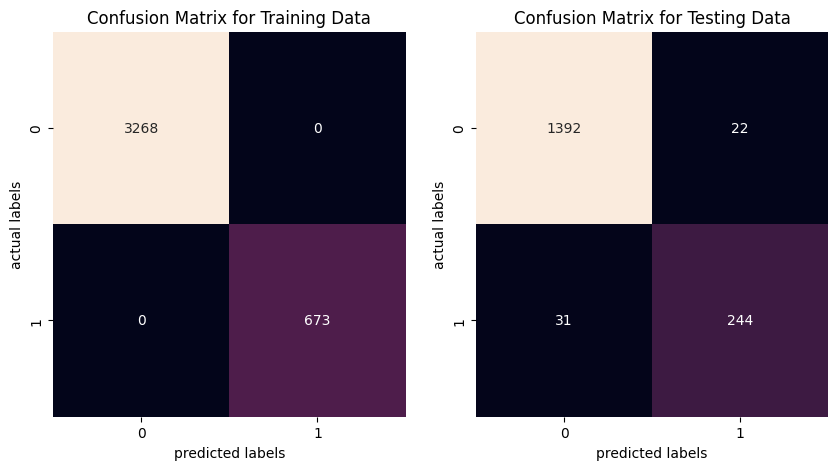

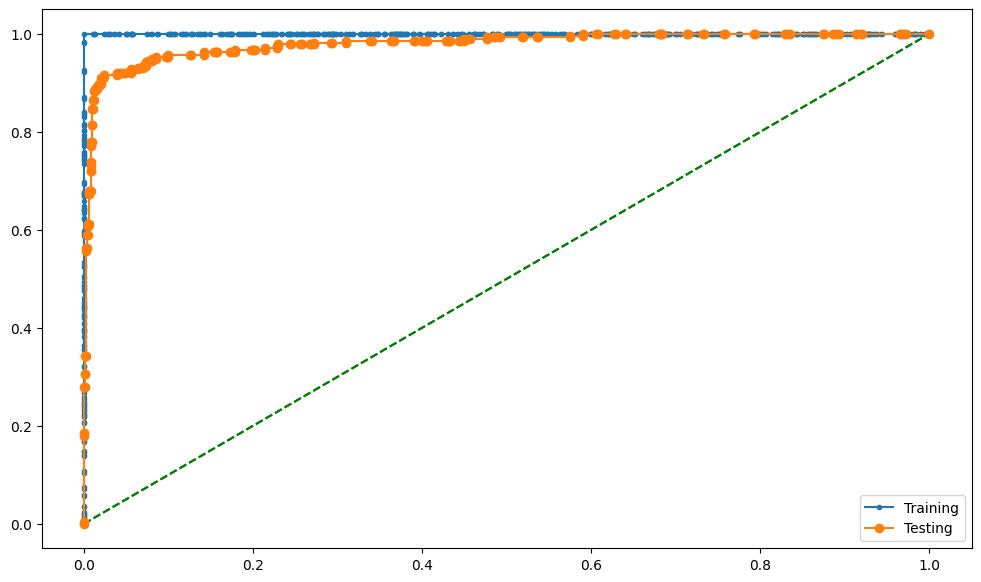

The mean recall for the model after 10 folds is 0.8607
The mean accuracy for the model after 10 folds is 0.9602
The mean precision for the model after 10 folds is 0.9037
The mean f1 for the model after 10 folds is 0.8796


#####################################################################################################################################################################################################
QDA MODEL
classification report for training data
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3268
           1       0.52      0.82      0.63       673

    accuracy                           0.84      3941
   macro avg       0.74      0.83      0.77      3941
weighted avg       0.88      0.84      0.85      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1414
           1       0.49      0.75      0.60       27

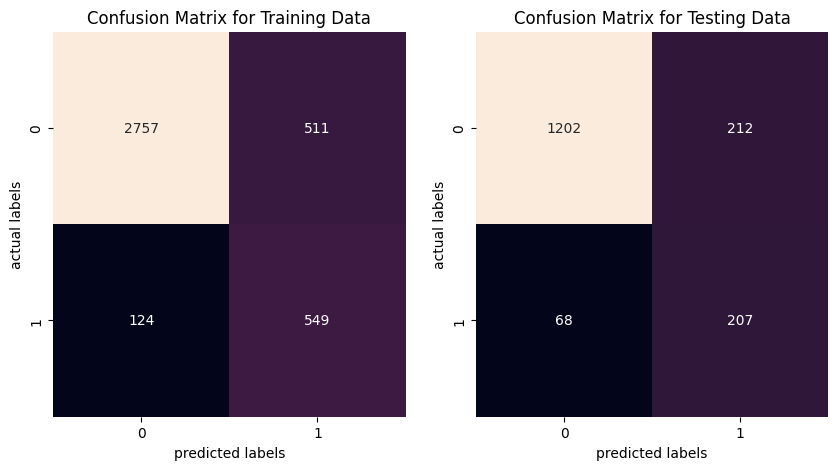

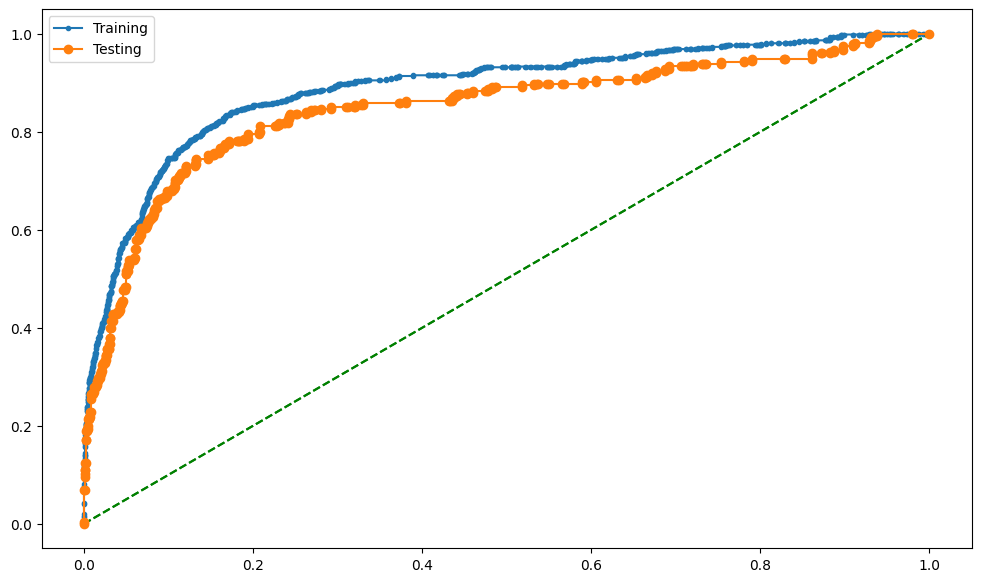

The mean recall for the model after 10 folds is 0.7416
The mean accuracy for the model after 10 folds is 0.8234
The mean precision for the model after 10 folds is 0.4916
The mean f1 for the model after 10 folds is 0.5898


#####################################################################################################################################################################################################
MLP CLASSIFIER
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      1.00      1.00       673

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1414
           1       0.91      0.81      0.86    

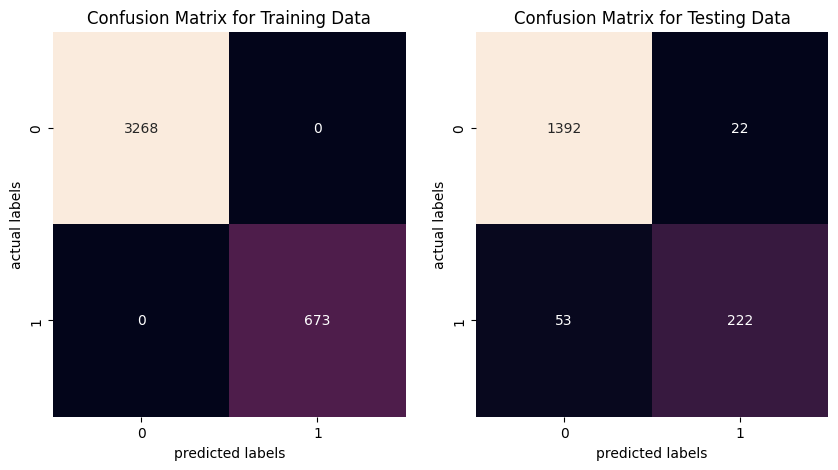

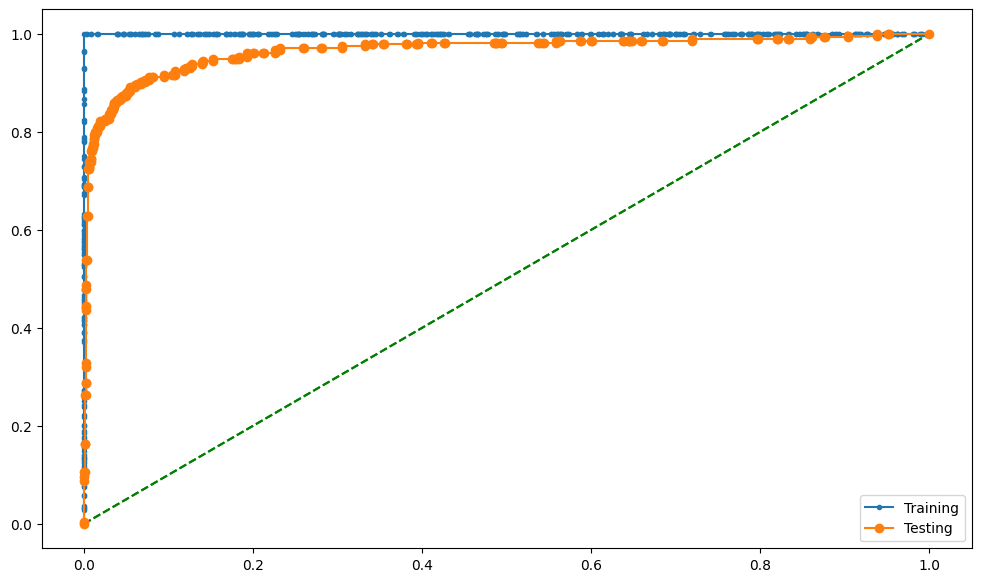

The mean recall for the model after 10 folds is 0.8100
The mean accuracy for the model after 10 folds is 0.9475
The mean precision for the model after 10 folds is 0.8754
The mean f1 for the model after 10 folds is 0.8403


#####################################################################################################################################################################################################


In [91]:
def model_training(model, x_train, y_train):
    # train the model on training data
    trained_model = model.fit(x_train, y_train)
    return trained_model

for model_name, model in base_models.items():
    print(model_name.upper())

    # Model training
    trained_model = model_training(model, x_train, y_train)

    # look at model performance metrics
    model_performance(trained_model, x_train, y_train, x_test, y_test)

    # look at the model ROC Curve
    roc_score_auc_curve(trained_model, x_train, y_train, x_test, y_test)

    # display the plots
    plt.show()
    
    # get the k-fold cross validation scores
    k_fold_cross_valscore(trained_model,
                          x_train,
                          y_train,
                          folds=10)
    

    print('\n')
    print('#####################################################################################################################################################################################################')
#     print('\n')

### Hyper Parameter Tuning Grid

In [92]:
# setup the param grid for hyper parameter tuning
param_grids = {
    'LDA Model': {
        'solver' : ['svd', 'lsqr', 'eigen'],
        'tol' : [0.001,0.0001,0.00001]},
    
    'Logistic Regression Model': {
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'tol' : [0.01,0.001,0.0001],
        #'penalty': ['l1', 'l2'],
        'max_iter': [1000, 10000],
        'C' : np.logspace(-4,4,10,20)},
    
    
    'ADA Boost Model': {
        'n_estimators' : [500,600,700,800,900,1000,1100,1200,1300],
        'algorithm' : ['SAMME'],
        'learning_rate' : [0.01,0.05,0.1,0.2,0.3,0.5]},
    
    
    'Decision Tree Model': {
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [6,7,8,9,10,11,12,13,14],
        #'min_samples_leaf' : [15,20,25,30,35,40,45,50,55,60,65,70],
        #'min_samples_split' : [25,30,35,40,45,50,60,70,80,90,100],
    },
    
    'Random Forest Model': {
        'max_depth' : [7,8,9,10,11,12,13,14],
        'max_features': [15,16,17,18],
        #'min_samples_leaf': [15,20,25,30],
        #'min_samples_split': [60,65,70],
        'n_estimators' : [31,51,71,101,301]},
    
    'KNN Model': {
        'n_neighbors' : [2,3,5,7,],  #9,11
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [15,20,25,30,35],
        'metric' :['minkowski','euclidean','manhattan','chebyshev']},
    
    'XGB Classifier': {
        'colsample_bytree': [0.5, 0.7], 
        'learning_rate': [0.1,0.5],      
        'max_depth': [7,8,9,10],         
        'n_estimators' : [51, 71, 91,101 ,301],
        'subsample': [0.3,0.5, 0.7]},

    'QDA Model': {'reg_param': [0.0, 0.1, 0.5, 1.0]},
    
    'MLP Classifier': {
        'activation': ['logistic', 'relu', 'tanh', 'identity' ],
        'hidden_layer_sizes': [50, 100, 300, (50,50), (100,100), (300,300)],
        'max_iter' : [10000],
        'solver': ['sgd', 'adam', 'lbfgs']}
}

In [93]:
# Function for tuning and evaluating a model
def tune_train_evaluate_model(base_models, param_grids,
                              x_train, y_train,
                              x_test, y_test, 
                             scoring='recall', verbose=1):
    
    for model_name, model in base_models.items():
        print(f"Tuning {model_name}")
        param_grid = param_grids[model_name]

        
        start_time = time.time()
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, verbose=verbose, n_jobs=-1)
        grid_search.fit(x_train, y_train)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print('\n')
        print(f"time taken to tune {model_name}: {elapsed_time:.2f} seconds")
        print('\n')

        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best estimator for {model_name}: {grid_search.best_estimator_}")
        print('\n')

        # Best model Performance
        best_model = grid_search.best_estimator_
        print(f"Performance for {model_name} (Tuned Model)")
        
        
        # train_preds = best_model.predict(x_train)
        # test_preds = best_model.predict(x_test)

        # Looking the Model Performance for the best model
        model_performance(best_model, x_train, y_train, x_test, y_test)
        plt.show()

        # Look at model ROC Curve
        roc_score_auc_curve(best_model, x_train, y_train, x_test, y_test)
        plt.show()


        # get the k-fold cross validation scores
        k_fold_cross_valscore(best_model, x_train, y_train, folds=10)
        print('\n')
        

        print('########################################################################################################################################################################################')

Tuning LDA Model
Fitting 5 folds for each of 9 candidates, totalling 45 fits


time taken to tune LDA Model: 1.79 seconds


Best parameters for LDA Model: {'solver': 'svd', 'tol': 0.001}
Best estimator for LDA Model: LinearDiscriminantAnalysis(tol=0.001)


Performance for LDA Model (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3268
           1       0.75      0.49      0.59       673

    accuracy                           0.89      3941
   macro avg       0.83      0.73      0.76      3941
weighted avg       0.88      0.89      0.88      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1414
           1       0.77      0.49      0.60       275

    accuracy                           0.89      1689
   macro avg       0.84      0.73      0.77      1689
weighted avg       0.89

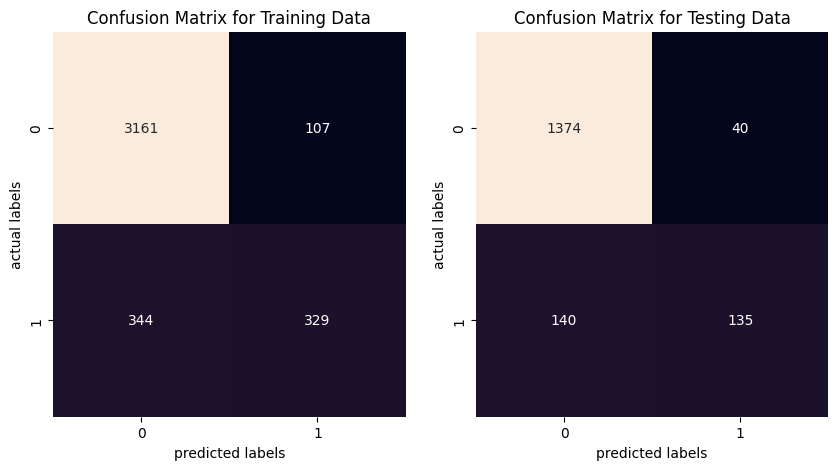

AUC Score for Model on Training Data is 0.8915
AUC Score for Model on Testing Data is 0.8792


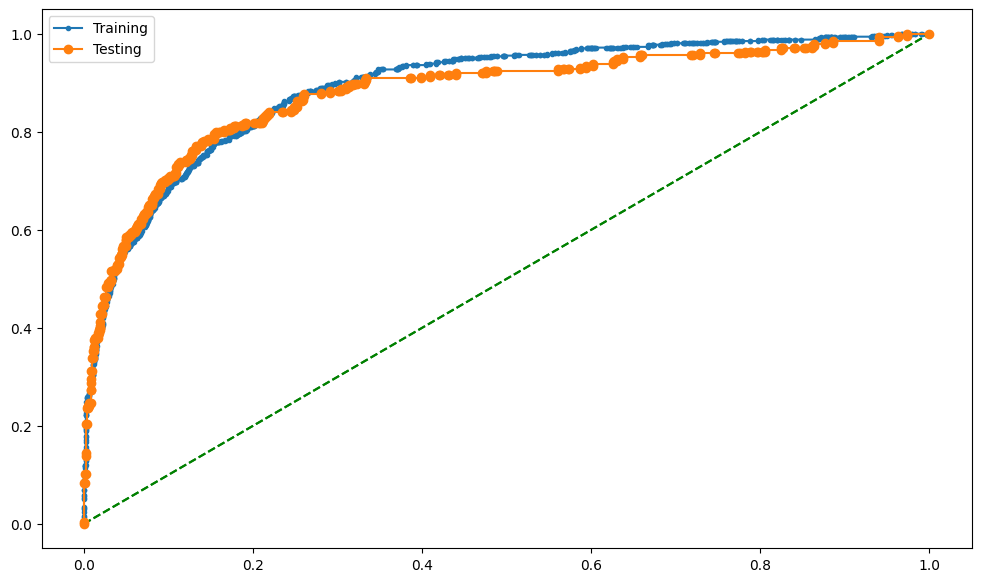

The mean recall for the model after 10 folds is 0.4788
The mean accuracy for the model after 10 folds is 0.8815
The mean precision for the model after 10 folds is 0.7353
The mean f1 for the model after 10 folds is 0.5762


########################################################################################################################################################################################
Tuning Logistic Regression Model
Fitting 5 folds for each of 300 candidates, totalling 1500 fits


time taken to tune Logistic Regression Model: 3.91 seconds


Best parameters for Logistic Regression Model: {'C': 166.81005372000558, 'max_iter': 1000, 'solver': 'lbfgs', 'tol': 0.001}
Best estimator for Logistic Regression Model: LogisticRegression(C=166.81005372000558, max_iter=1000, random_state=1,
                   tol=0.001)


Performance for Logistic Regression Model (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

       

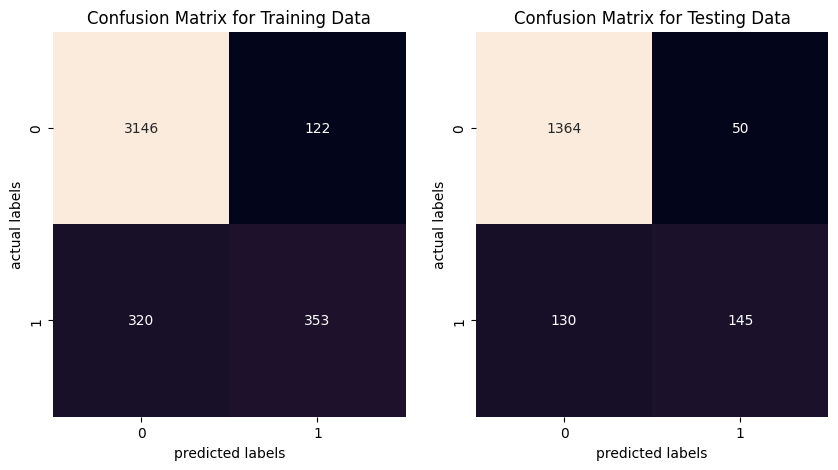

AUC Score for Model on Training Data is 0.8978
AUC Score for Model on Testing Data is 0.8851


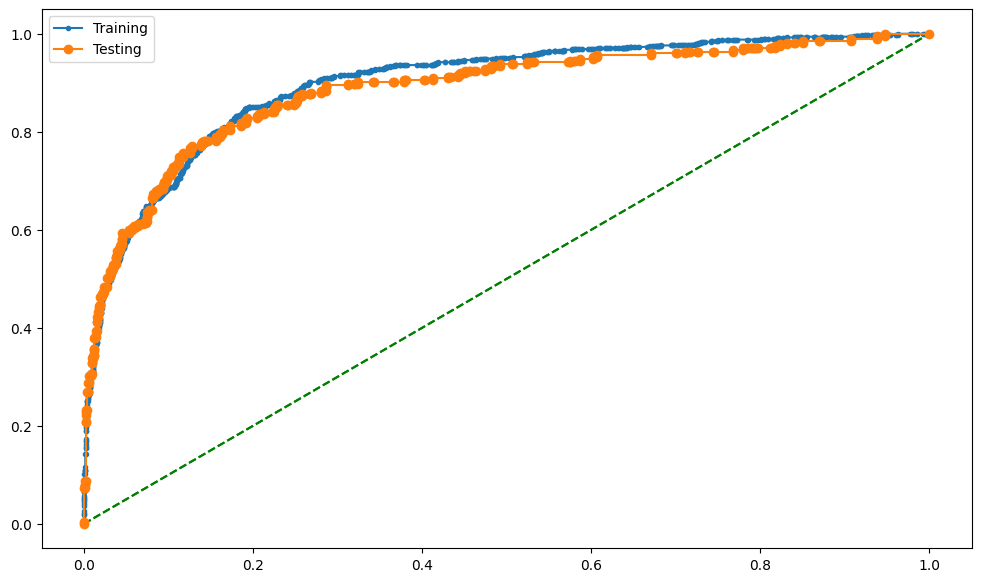

The mean recall for the model after 10 folds is 0.5054
The mean accuracy for the model after 10 folds is 0.8830
The mean precision for the model after 10 folds is 0.7287
The mean f1 for the model after 10 folds is 0.5931


########################################################################################################################################################################################
Tuning ADA Boost Model
Fitting 5 folds for each of 54 candidates, totalling 270 fits


time taken to tune ADA Boost Model: 97.95 seconds


Best parameters for ADA Boost Model: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 1200}
Best estimator for ADA Boost Model: AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=1200,
                   random_state=1)


Performance for ADA Boost Model (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3268
     

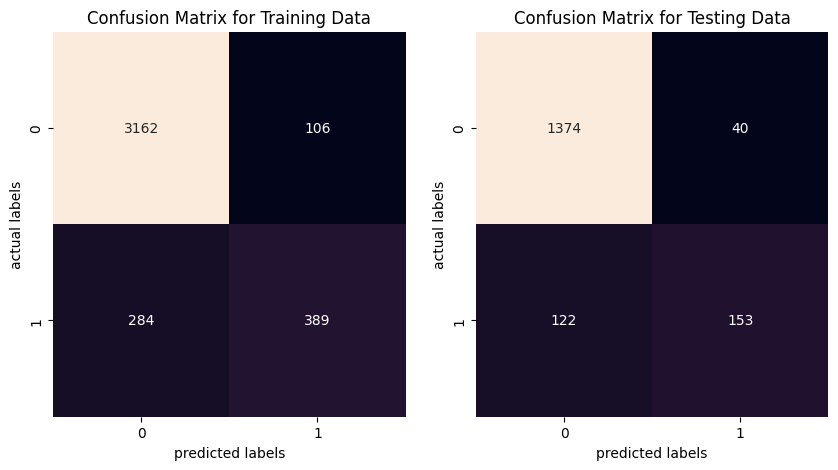

AUC Score for Model on Training Data is 0.9263
AUC Score for Model on Testing Data is 0.9067


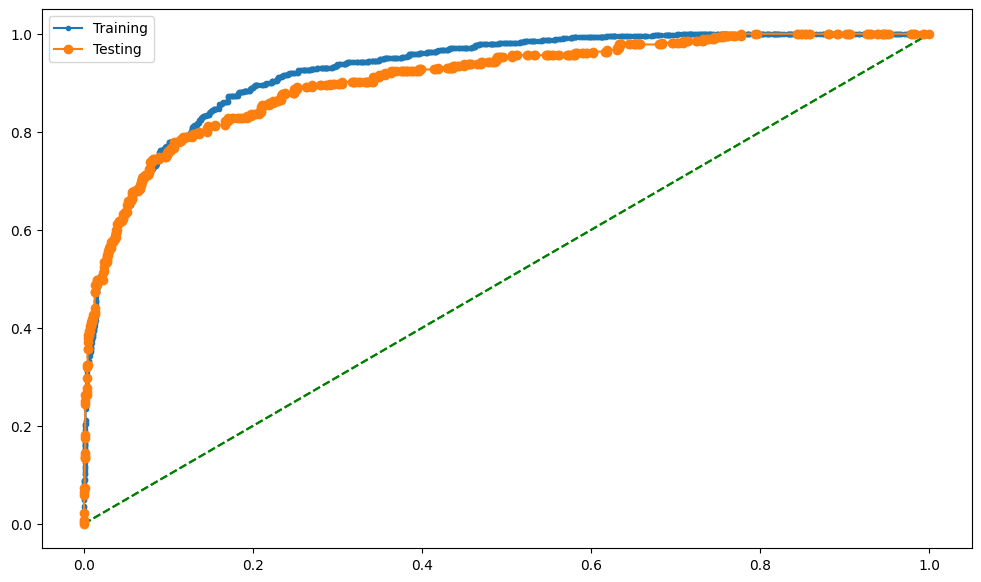

The mean recall for the model after 10 folds is 0.5678
The mean accuracy for the model after 10 folds is 0.8975
The mean precision for the model after 10 folds is 0.7726
The mean f1 for the model after 10 folds is 0.6537


########################################################################################################################################################################################
Tuning Decision Tree Model
Fitting 5 folds for each of 18 candidates, totalling 90 fits


time taken to tune Decision Tree Model: 0.26 seconds


Best parameters for Decision Tree Model: {'criterion': 'entropy', 'max_depth': 14}
Best estimator for Decision Tree Model: DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=1)


Performance for Decision Tree Model (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      0.99      0.99      

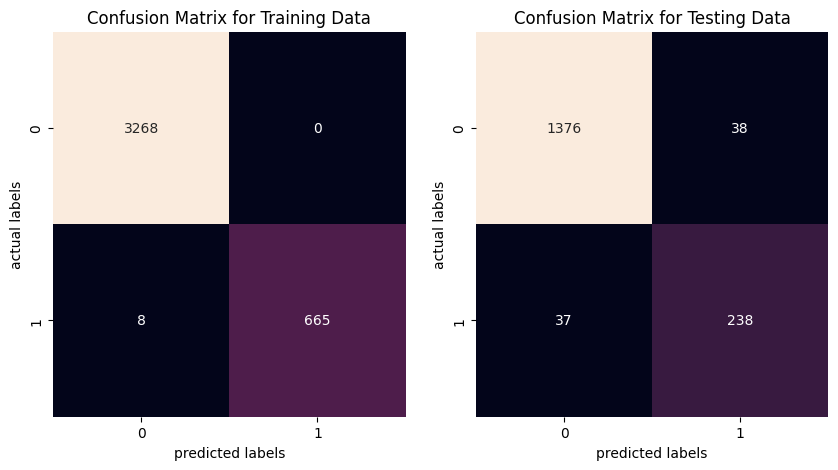

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.9312


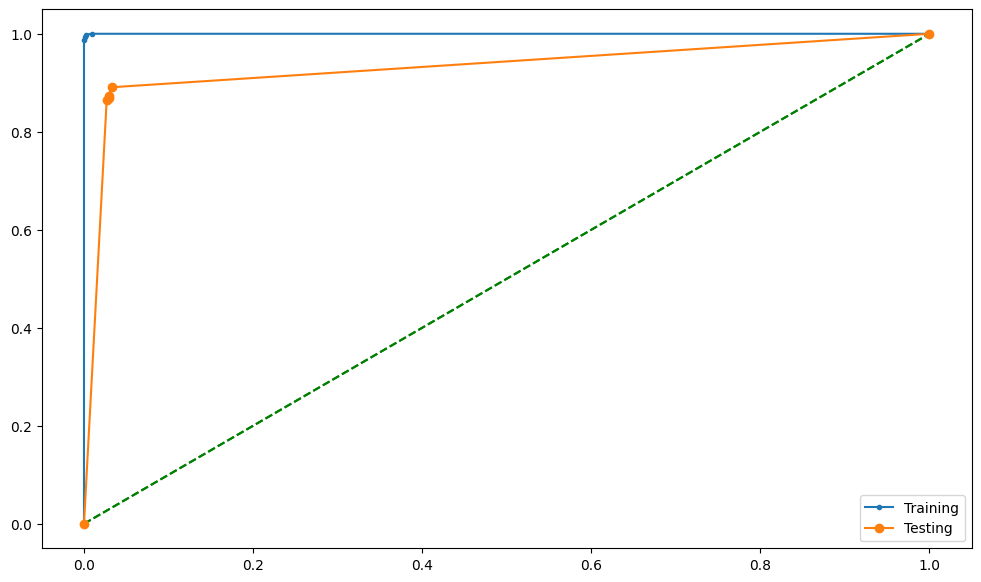

The mean recall for the model after 10 folds is 0.8249
The mean accuracy for the model after 10 folds is 0.9386
The mean precision for the model after 10 folds is 0.8189
The mean f1 for the model after 10 folds is 0.8209


########################################################################################################################################################################################
Tuning Random Forest Model
Fitting 5 folds for each of 160 candidates, totalling 800 fits


time taken to tune Random Forest Model: 43.26 seconds


Best parameters for Random Forest Model: {'max_depth': 14, 'max_features': 17, 'n_estimators': 101}
Best estimator for Random Forest Model: RandomForestClassifier(max_depth=14, max_features=17, n_estimators=101,
                       random_state=1)


Performance for Random Forest Model (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   

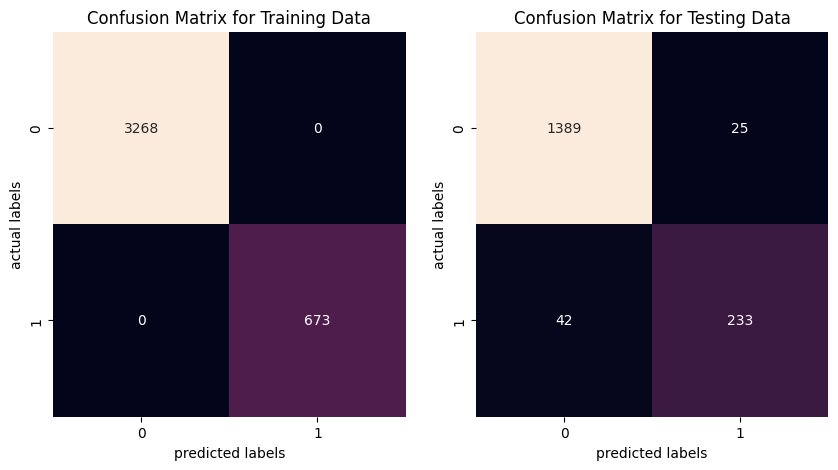

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.9757


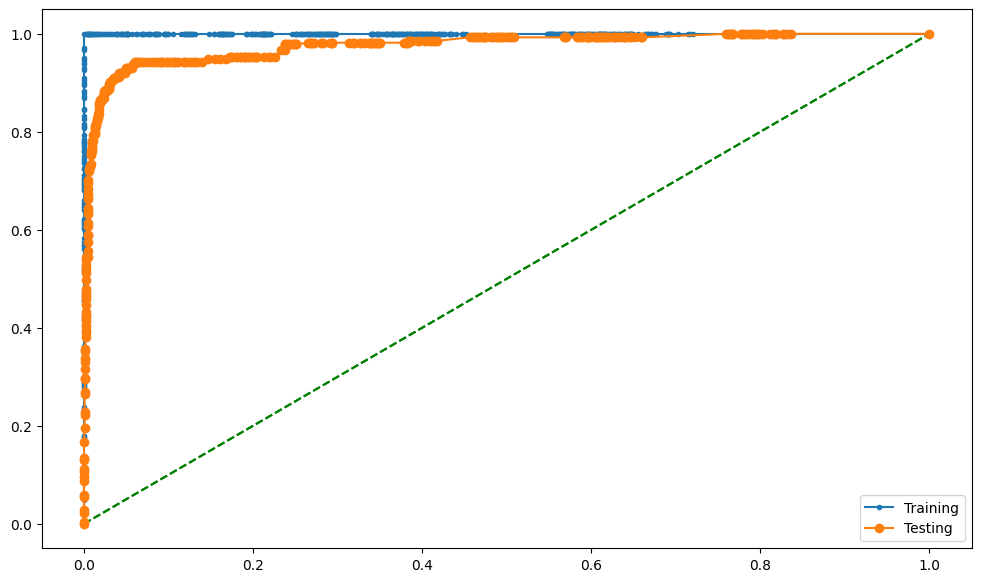

The mean recall for the model after 10 folds is 0.8234
The mean accuracy for the model after 10 folds is 0.9556
The mean precision for the model after 10 folds is 0.9093
The mean f1 for the model after 10 folds is 0.8627


########################################################################################################################################################################################
Tuning KNN Model
Fitting 5 folds for each of 640 candidates, totalling 3200 fits


time taken to tune KNN Model: 24.89 seconds


Best parameters for KNN Model: {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Best estimator for KNN Model: KNeighborsClassifier(leaf_size=15, metric='manhattan', n_neighbors=2,
                     weights='distance')


Performance for KNN Model (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      32

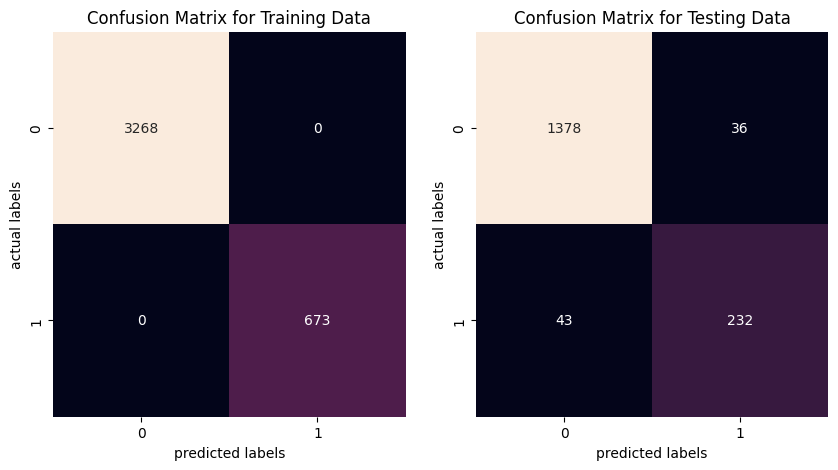

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.9293


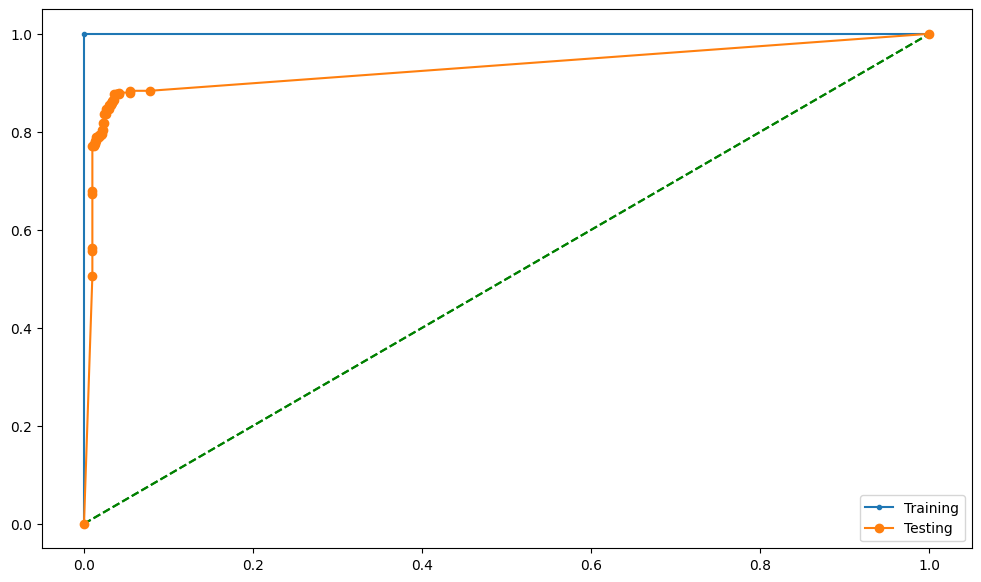

The mean recall for the model after 10 folds is 0.8128
The mean accuracy for the model after 10 folds is 0.9386
The mean precision for the model after 10 folds is 0.8260
The mean f1 for the model after 10 folds is 0.8190


########################################################################################################################################################################################
Tuning XGB Classifier
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


time taken to tune XGB Classifier: 16.77 seconds


Best parameters for XGB Classifier: {'colsample_bytree': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 301, 'subsample': 0.7}
Best estimator for XGB Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
 

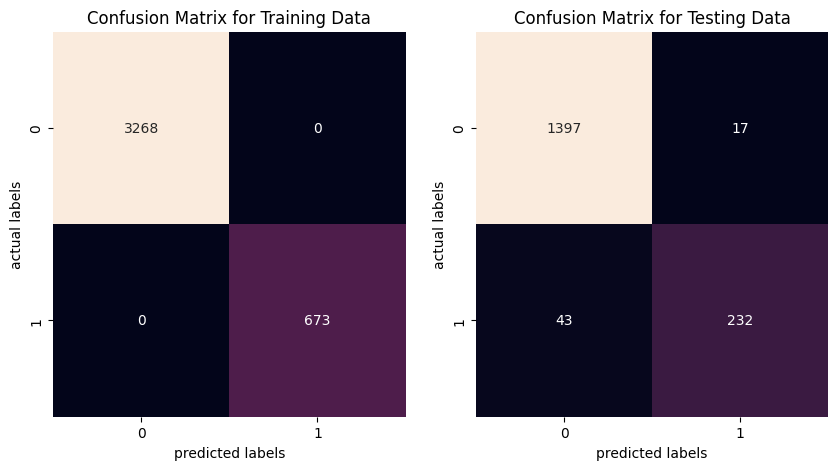

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.9734


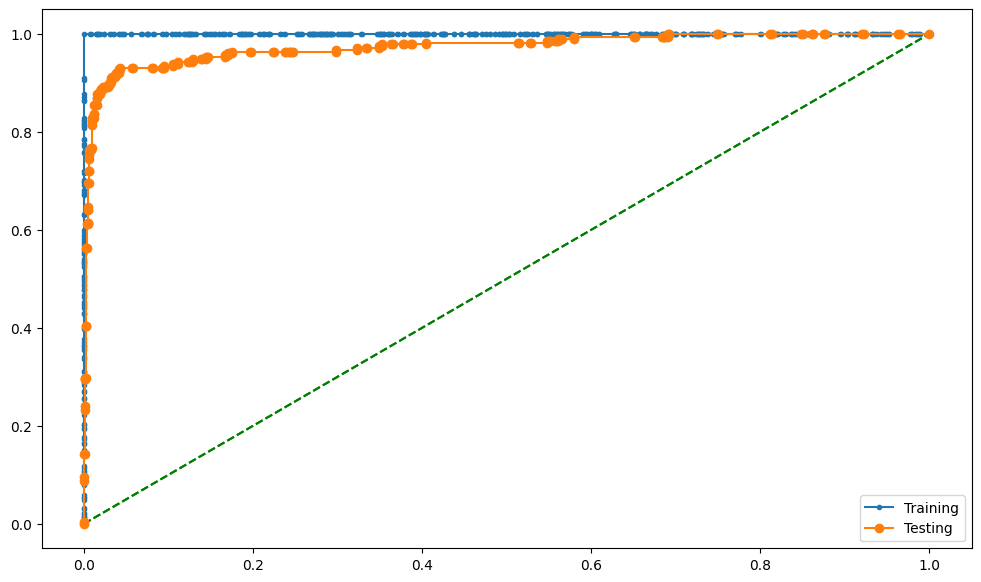

The mean recall for the model after 10 folds is 0.8412
The mean accuracy for the model after 10 folds is 0.9597
The mean precision for the model after 10 folds is 0.9177
The mean f1 for the model after 10 folds is 0.8762


########################################################################################################################################################################################
Tuning QDA Model
Fitting 5 folds for each of 4 candidates, totalling 20 fits


time taken to tune QDA Model: 0.08 seconds


Best parameters for QDA Model: {'reg_param': 0.0}
Best estimator for QDA Model: QuadraticDiscriminantAnalysis()


Performance for QDA Model (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3268
           1       0.52      0.82      0.63       673

    accuracy                           0.84      3941
   macro avg       0.74      0.83      0.77      3941
we

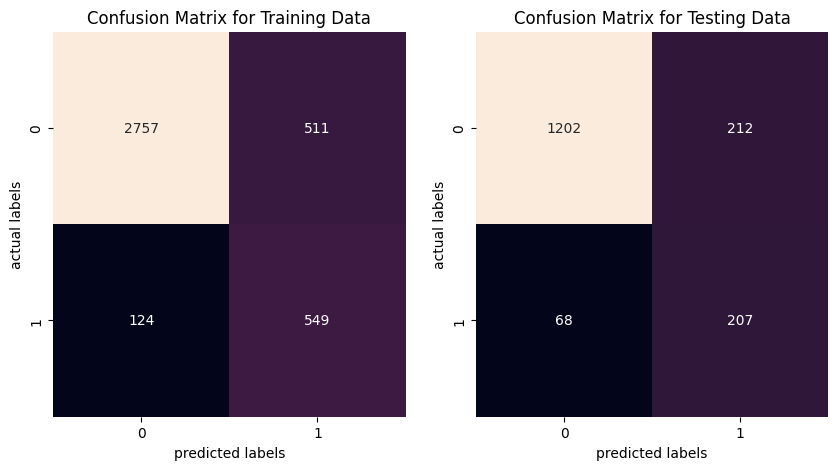

AUC Score for Model on Training Data is 0.8897
AUC Score for Model on Testing Data is 0.8483


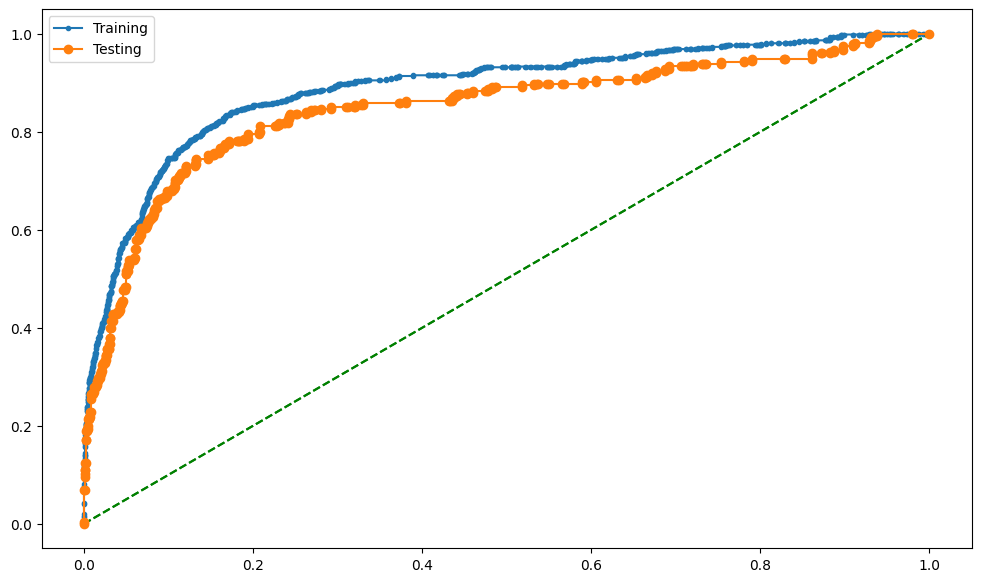

The mean recall for the model after 10 folds is 0.7416
The mean accuracy for the model after 10 folds is 0.8234
The mean precision for the model after 10 folds is 0.4916
The mean f1 for the model after 10 folds is 0.5898


########################################################################################################################################################################################
Tuning MLP Classifier
Fitting 5 folds for each of 72 candidates, totalling 360 fits


time taken to tune MLP Classifier: 1281.02 seconds


Best parameters for MLP Classifier: {'activation': 'tanh', 'hidden_layer_sizes': (300, 300), 'max_iter': 10000, 'solver': 'adam'}
Best estimator for MLP Classifier: MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 300), max_iter=10000,
              random_state=1)


Performance for MLP Classifier (Tuned Model)
classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00   

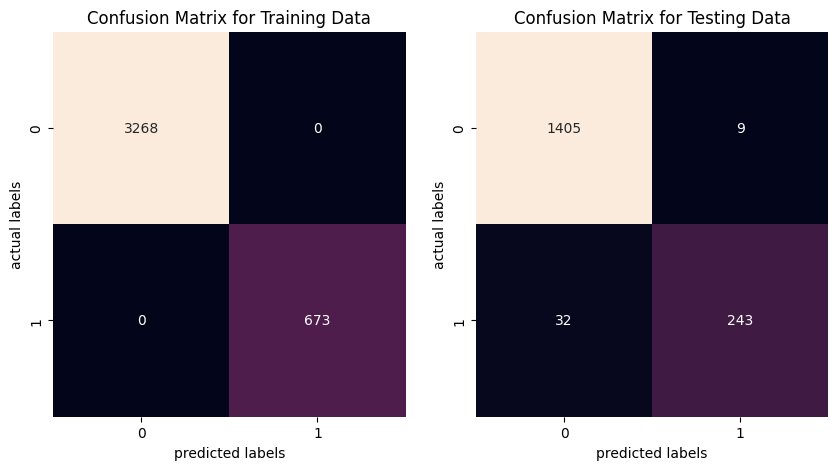

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.9876


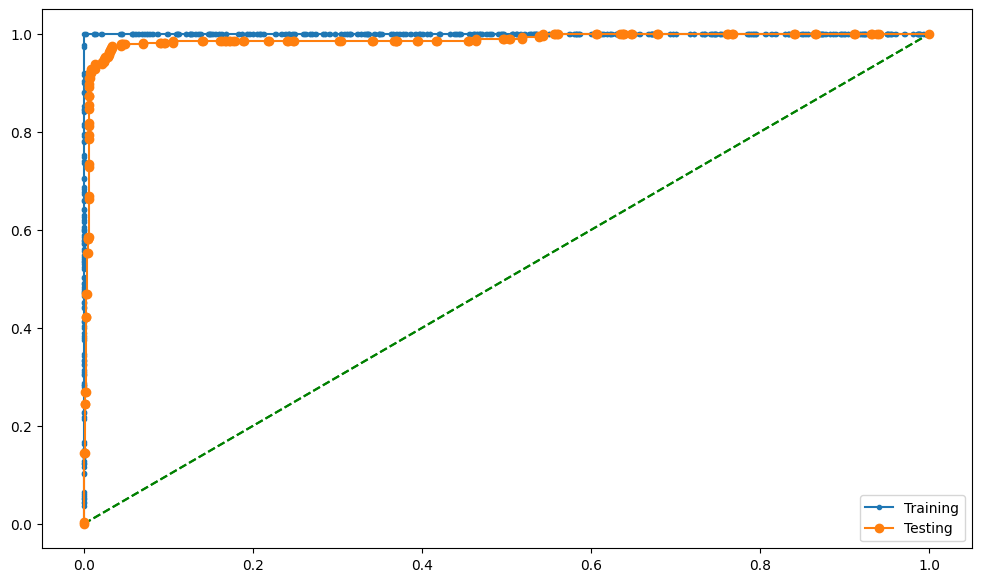

The mean recall for the model after 10 folds is 0.8932
The mean accuracy for the model after 10 folds is 0.9721
The mean precision for the model after 10 folds is 0.9411
The mean f1 for the model after 10 folds is 0.9160


########################################################################################################################################################################################


In [94]:
tune_train_evaluate_model(base_models, param_grids,
                              x_train, y_train,
                              x_test, y_test, 
                             scoring='recall', verbose=1)

# Best XG-Boost Model

In [89]:
import xgboost as xgb
from xgboost import XGBClassifier

final_model = XGBClassifier(colsample_bytree=0.5,
                            learning_rate= 0.5,
                            max_depth= 8,
                            n_estimators= 301,
                            subsample= 0.7,
                            random_state=1,
                            use_label_encoder=False)
final_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=301, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       1.00      1.00      1.00       673

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



classification report for testing data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1414
           1       0.93      0.84      0.88       275

    accuracy                           0.96      1689
   macro avg       0.95      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689



the model score for training data is  1.0
the model score for testing data is  0.9633




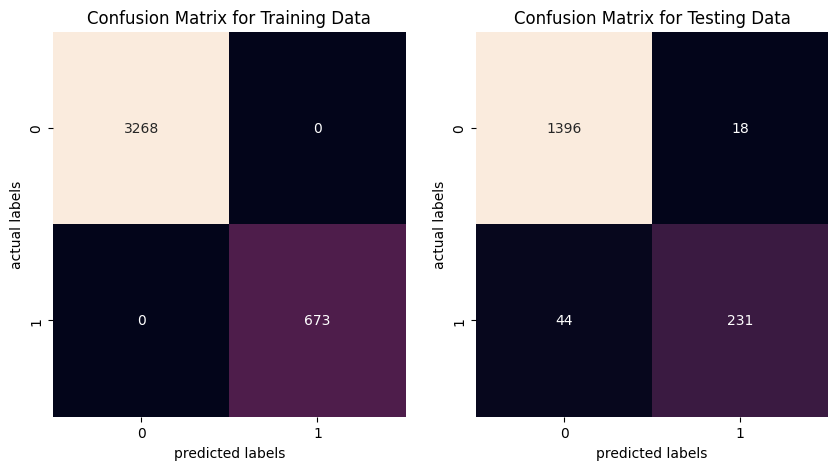

In [90]:
model_performance(final_model, x_train, y_train, x_test, y_test)

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.9748


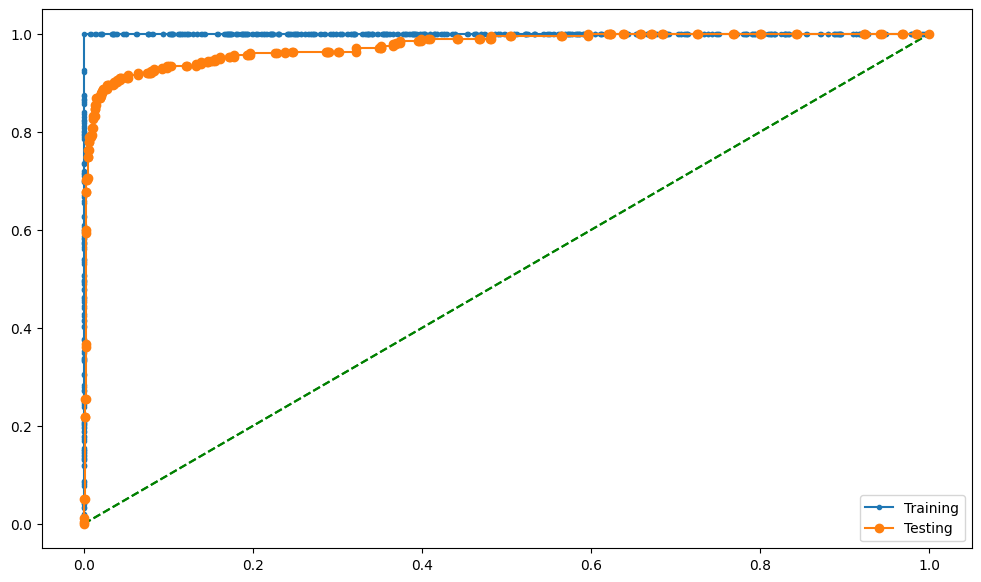

In [91]:
roc_score_auc_curve(final_model, x_train, y_train, x_test, y_test)

In [92]:
k_fold_cross_valscore(final_model, x_train, y_train, folds=10)

The mean recall for the model after 10 folds is 0.8368
The mean accuracy for the model after 10 folds is 0.9576
The mean precision for the model after 10 folds is 0.9097
The mean f1 for the model after 10 folds is 0.8704


recall  accuracy  precision        f1
0  0.779412  0.956962   0.963636  0.861789
1  0.779412  0.959391   0.981481  0.868852
2  0.779412  0.944162   0.883333  0.828125
3  0.820896  0.954315   0.901639  0.859375
4  0.880597  0.959391   0.880597  0.880597
5  0.850746  0.956853   0.890625  0.870229
6  0.940299  0.979695   0.940299  0.940299
7  0.850746  0.954315   0.876923  0.863636
8  0.805970  0.946701   0.870968  0.837209
9  0.880597  0.964467   0.907692  0.893939

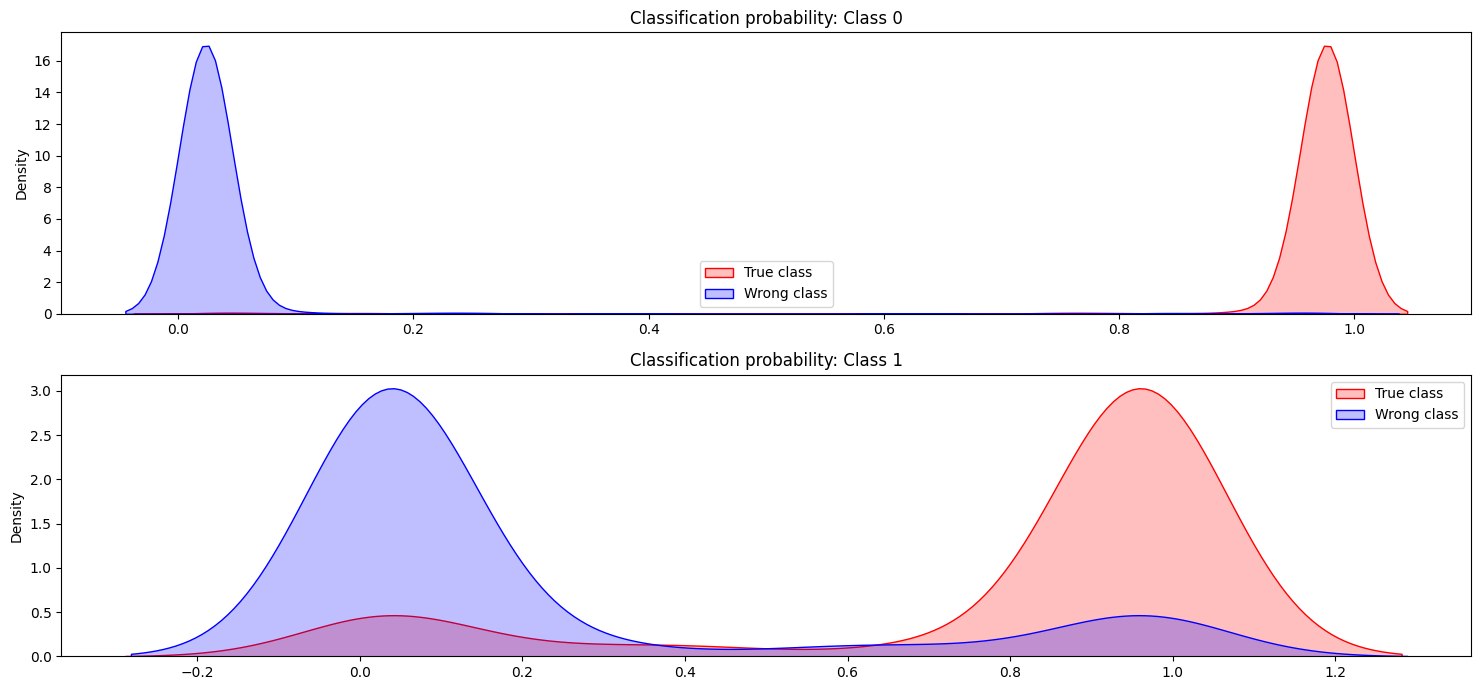

In [93]:
def plot_proba(ax, trained_model, X, y, bins=40, show_class=1):
    from sklearn.calibration import CalibratedClassifierCV

    # Calibrate the model's predicted probabilities
    calibrated_model = CalibratedClassifierCV(trained_model, cv='prefit')
    calibrated_model.fit(X, y)

    # Predict probabilities
    proba = calibrated_model.predict_proba(X)

    # Visualization
    if show_class == 0:
        sns.kdeplot(proba[y==0, 0], shade=True, color="r", label='True class', ax=ax)
        sns.kdeplot(proba[y==0, 1], shade=True, color="b", label='Wrong class', ax=ax)
        ax.set_title('Classification probability: Class 0')
    elif show_class == 1:
        sns.kdeplot(proba[y==1, 1], shade=True, color="r", label='True class', ax=ax)
        sns.kdeplot(proba[y==1, 0], shade=True, color="b", label='Wrong class', ax=ax)
        ax.set_title('Classification probability: Class 1')

    ax.legend()



# PLotting the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

# Plot the probability distribution for class 0
plot_proba(axes[0], final_model, x_test, y_test, bins=40, show_class=0)

# Plot the probability distribution for class 1
plot_proba(axes[1], final_model, x_test, y_test, bins=40, show_class=1)

plt.tight_layout()
plt.show()

### Feature Importance of the XGBoost Model

In [94]:
# Set feature names
final_model.get_booster().feature_names = all_feature_names

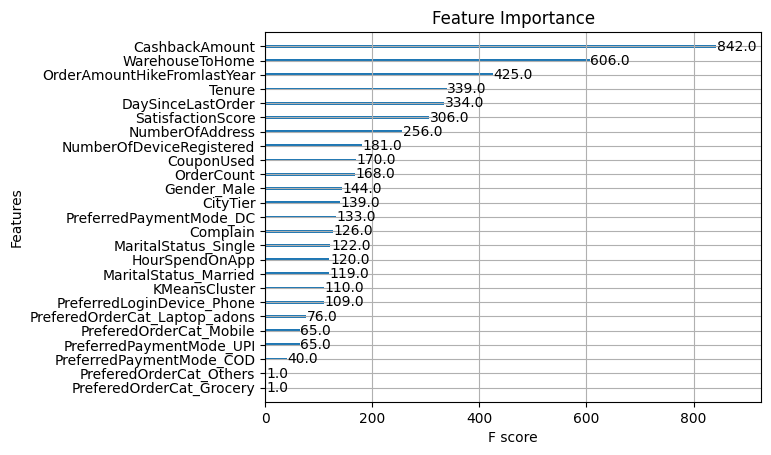

In [95]:
from xgboost import plot_importance

plot_importance(final_model)
plt.title('Feature Importance')
plt.show()

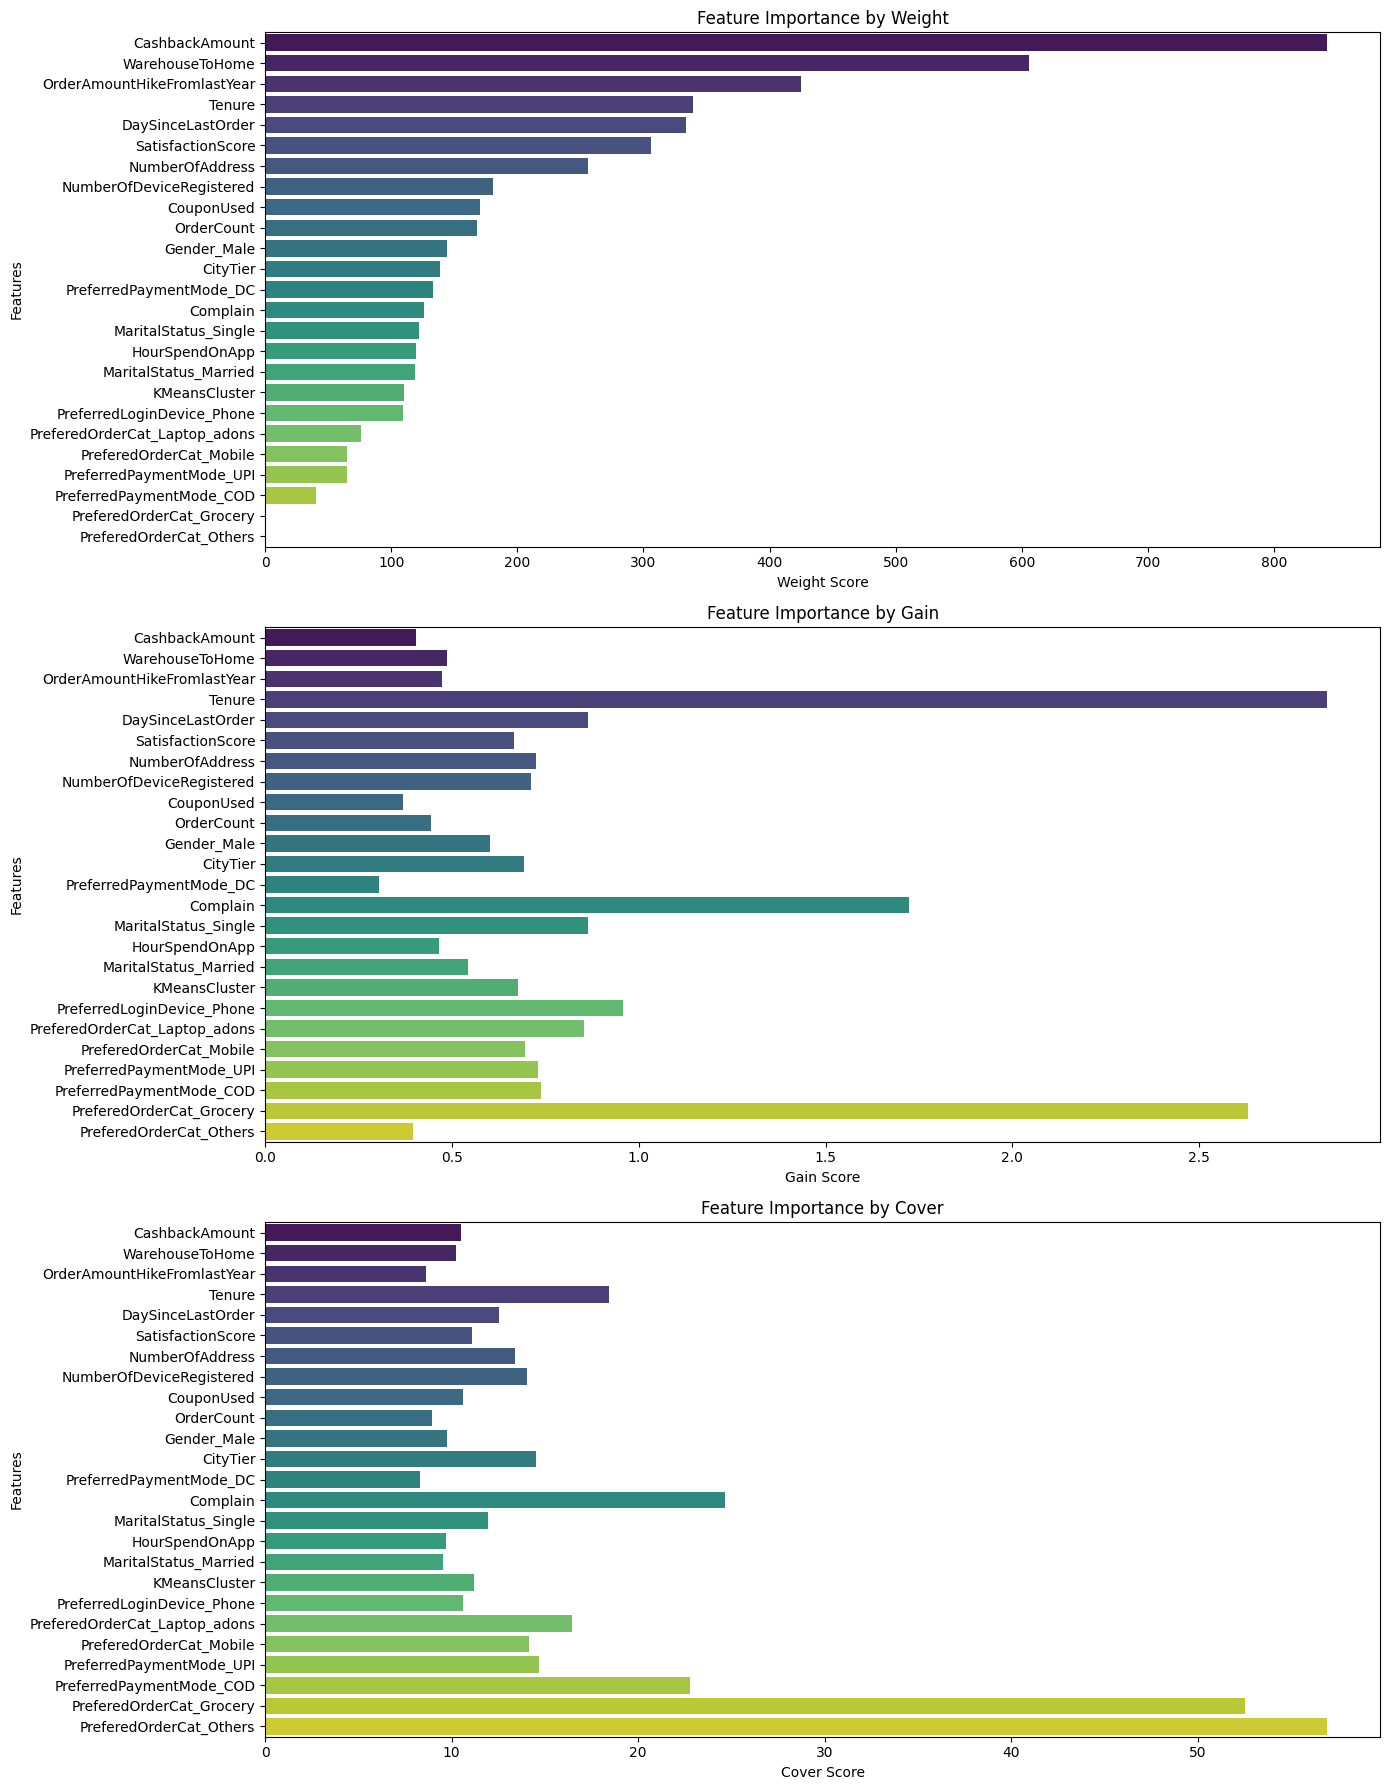

In [96]:
# Get the feature importance scores for different types
booster = final_model.get_booster()
importance_weight = booster.get_score(importance_type='weight')
importance_gain = booster.get_score(importance_type='gain')
importance_cover = booster.get_score(importance_type='cover')


# conver all the info to a dataframe
importance_df = pd.DataFrame({
    'Feature': list(importance_weight.keys()),
    'Weight' : list(importance_weight.values()),
    'Gain': [importance_gain.get(f, 0) for f in importance_weight.keys()],
    'Cover': [importance_cover.get(f,0) for f in importance_weight.keys()]
})


# sort by weight
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Plot with subplots for different importance types
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))


sns.barplot(x='Weight', y='Feature', data=importance_df, palette='viridis', ax=axes[0])
axes[0].set_title('Feature Importance by Weight')
axes[0].set_xlabel('Weight Score')
axes[0].set_ylabel('Features')

sns.barplot(x='Gain', y='Feature', data=importance_df, palette='viridis', ax=axes[1])
axes[1].set_title('Feature Importance by Gain')
axes[1].set_xlabel('Gain Score')
axes[1].set_ylabel('Features')

sns.barplot(x='Cover', y='Feature', data=importance_df, palette='viridis', ax=axes[2])
axes[2].set_title('Feature Importance by Cover')
axes[2].set_xlabel('Cover Score')
axes[2].set_ylabel('Features')

plt.tight_layout()
plt.show()

### Partial Dependence Plots for top 12 features

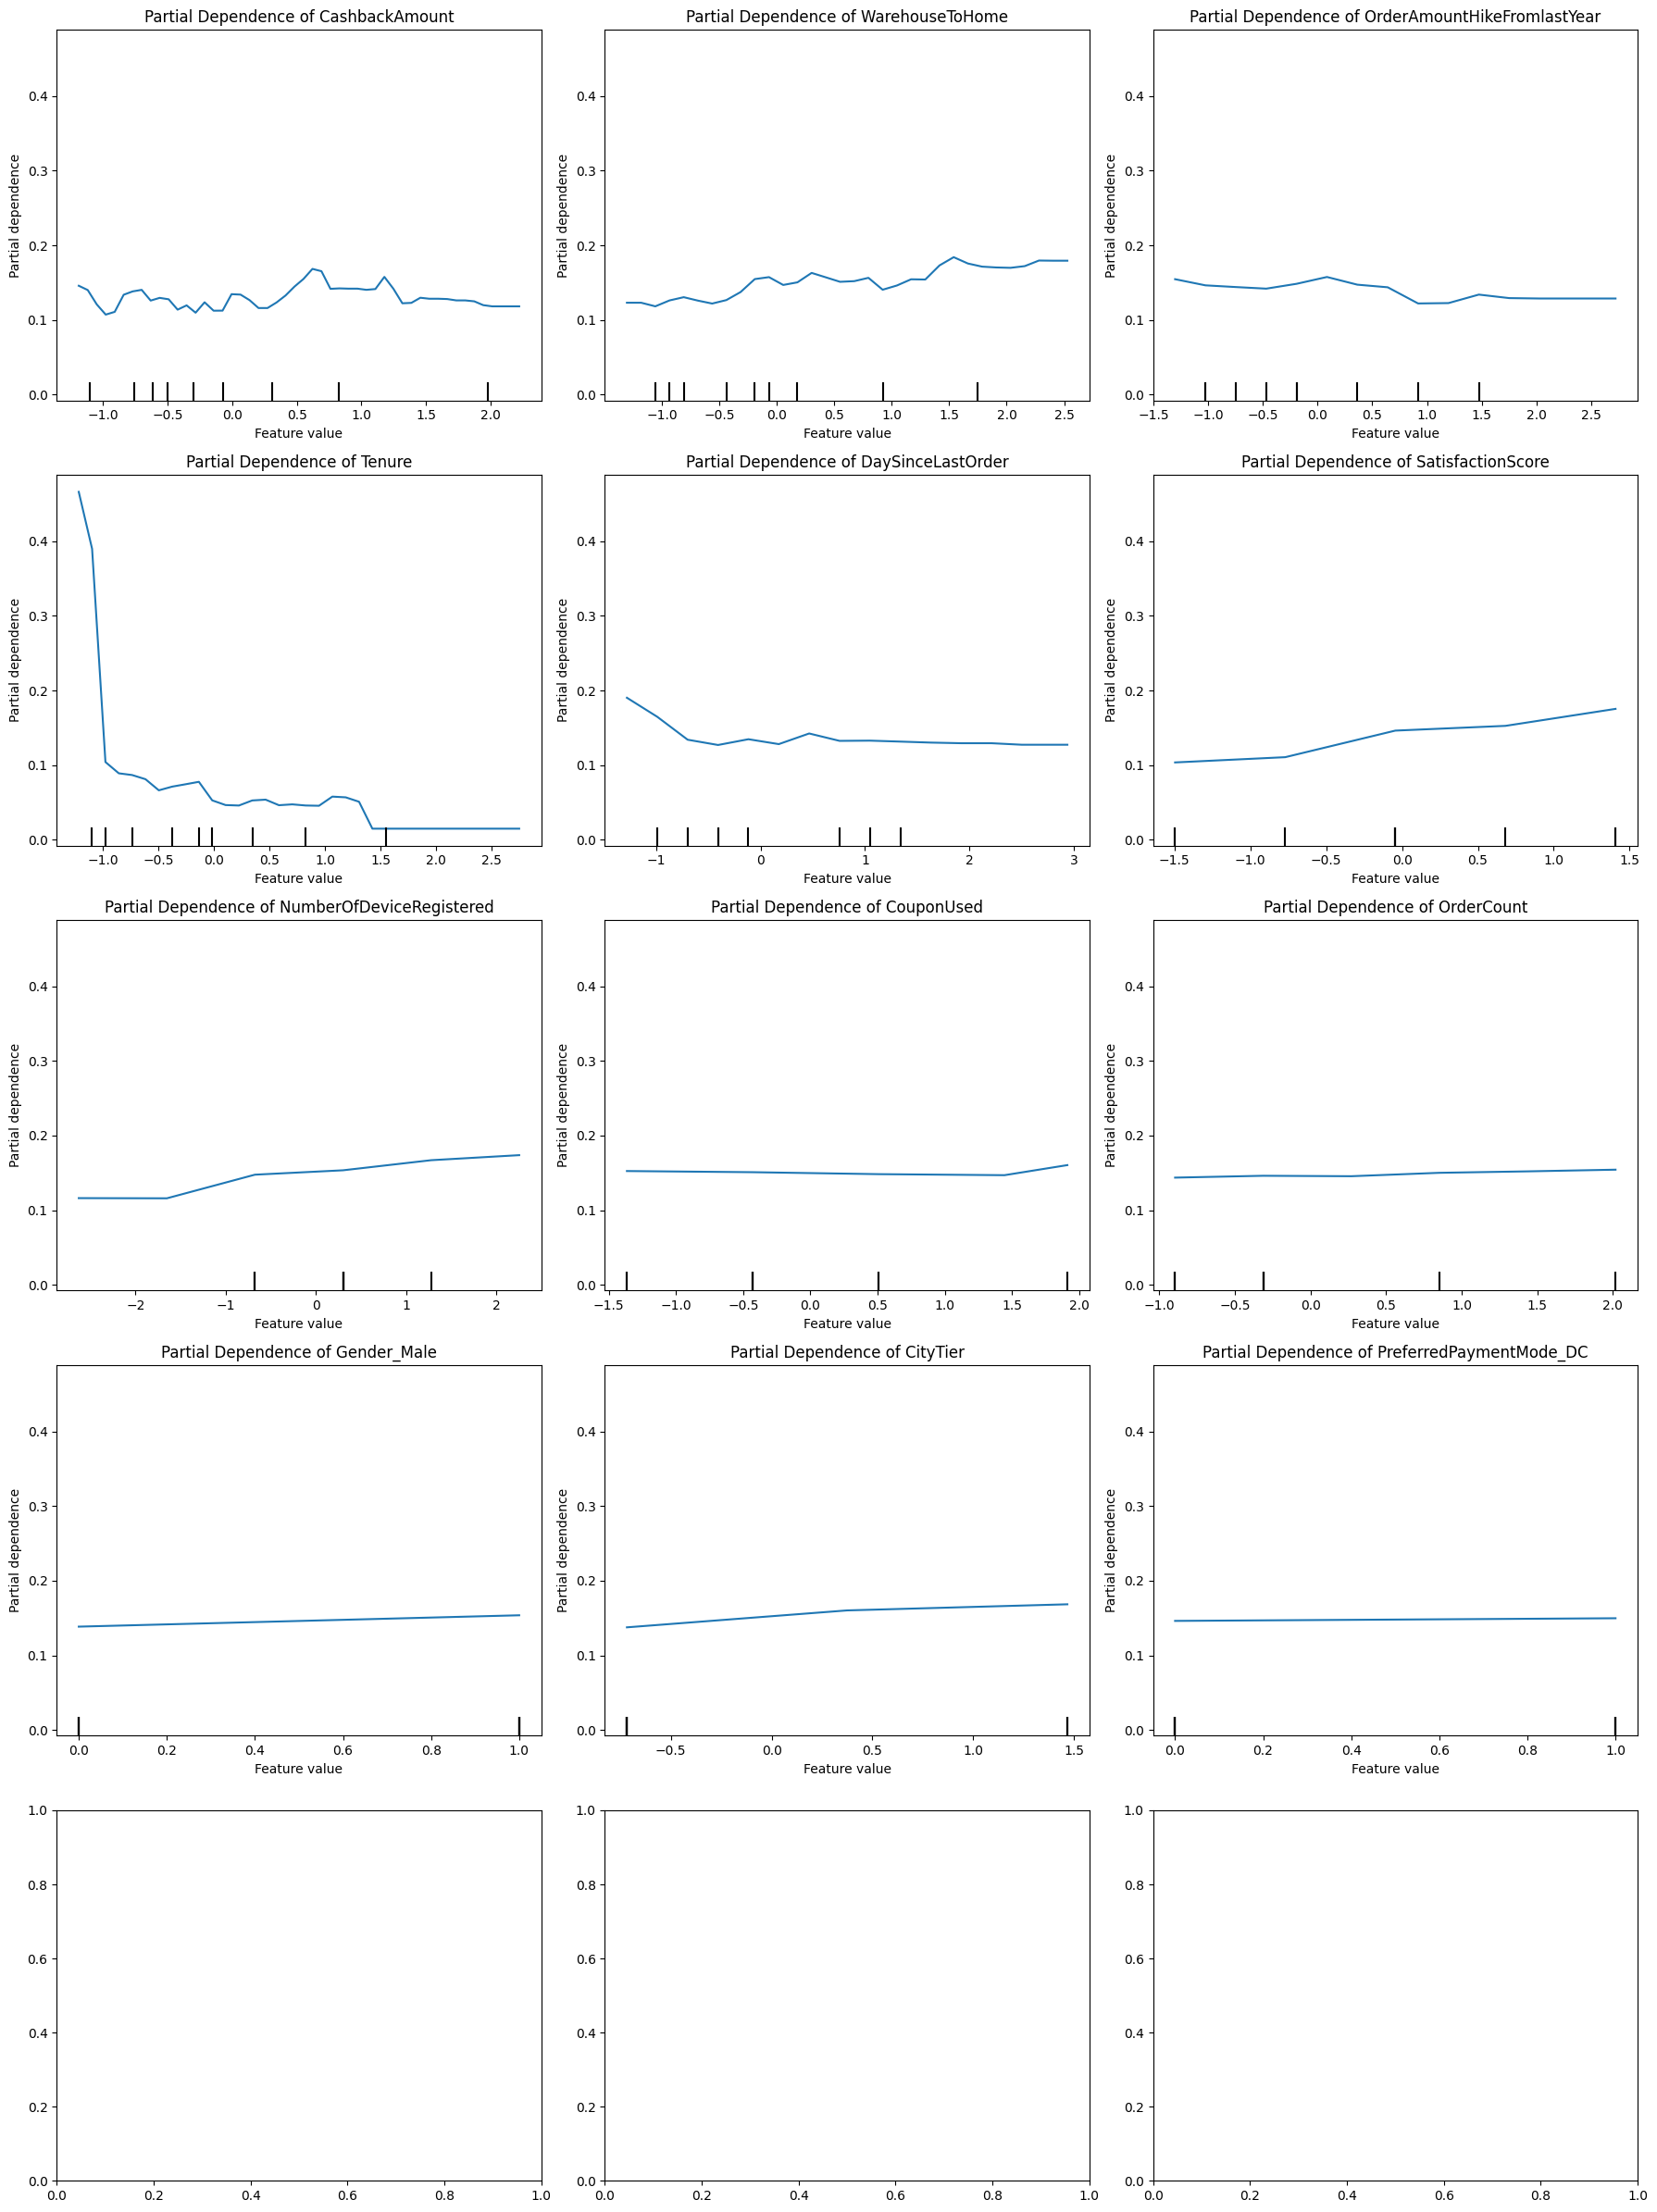

In [118]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Ensure features are properly defined
features = ['CashbackAmount', 'WarehouseToHome', 'OrderAmountHikeFromlastYear',
            'Tenure', 'DaySinceLastOrder', 'SatisfactionScore',
            'NumberOfDeviceRegistered', 'CouponUsed', 'OrderCount',
            'Gender_Male', 'CityTier','PreferredPaymentMode_DC']

# Generate Partial Dependence Plots
fig, ax = plt.subplots(nrows=len(features)//3 + 1, ncols=3, figsize=(18, len(features) * 2))

# Generate PDP for each feature
display = PartialDependenceDisplay.from_estimator(final_model, x_test, features, grid_resolution=50, ax=ax.flatten()[:len(features)])

# Customize plots
for i, axi in enumerate(ax.flatten()[:len(features)]):
    axi.set_xlabel('Feature value')
    axi.set_ylabel('Partial dependence')
    axi.set_title(f'Partial Dependence of {features[i]}')

plt.tight_layout()
plt.show()


### Caliberation Plots

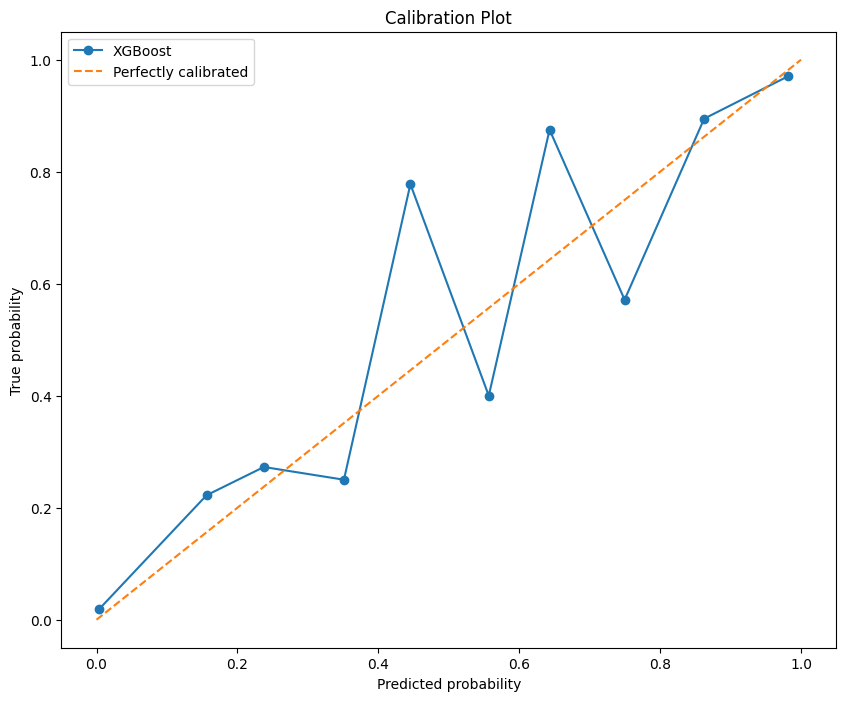

In [120]:
from sklearn.calibration import calibration_curve

# Predict probabilities
y_prob = final_model.predict_proba(x_test)[:, 1]

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(10, 8))
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Plot')
plt.legend()
plt.show()

### Learning Curves

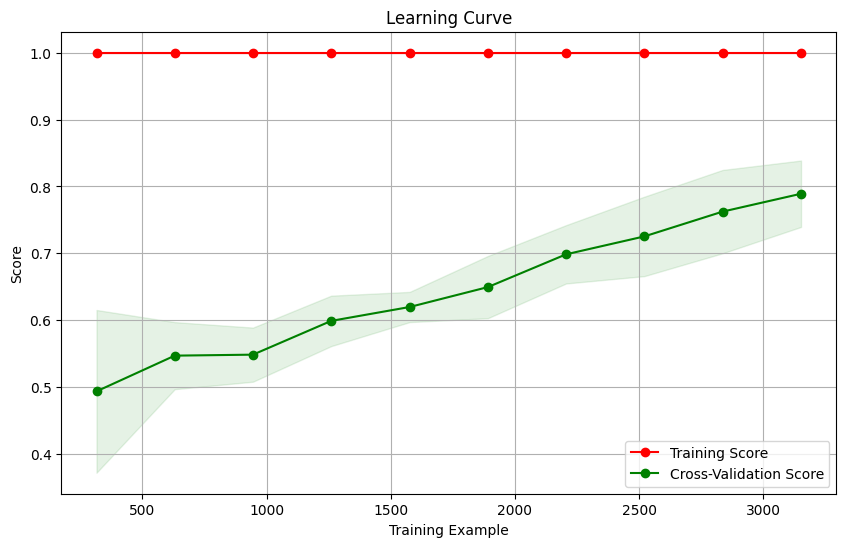

In [125]:
from sklearn.model_selection import learning_curve

model = final_model

# generate the learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring='recall',
    train_sizes=np.linspace(0.1, 1.0,10), n_jobs=-1
)

# calcuate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, 
                val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Example")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

### SHAP Analysis

#### 1. SHAP Summary Plot - Bar Plot

 96%|=================== | 1615/1689 [00:13<00:00]       

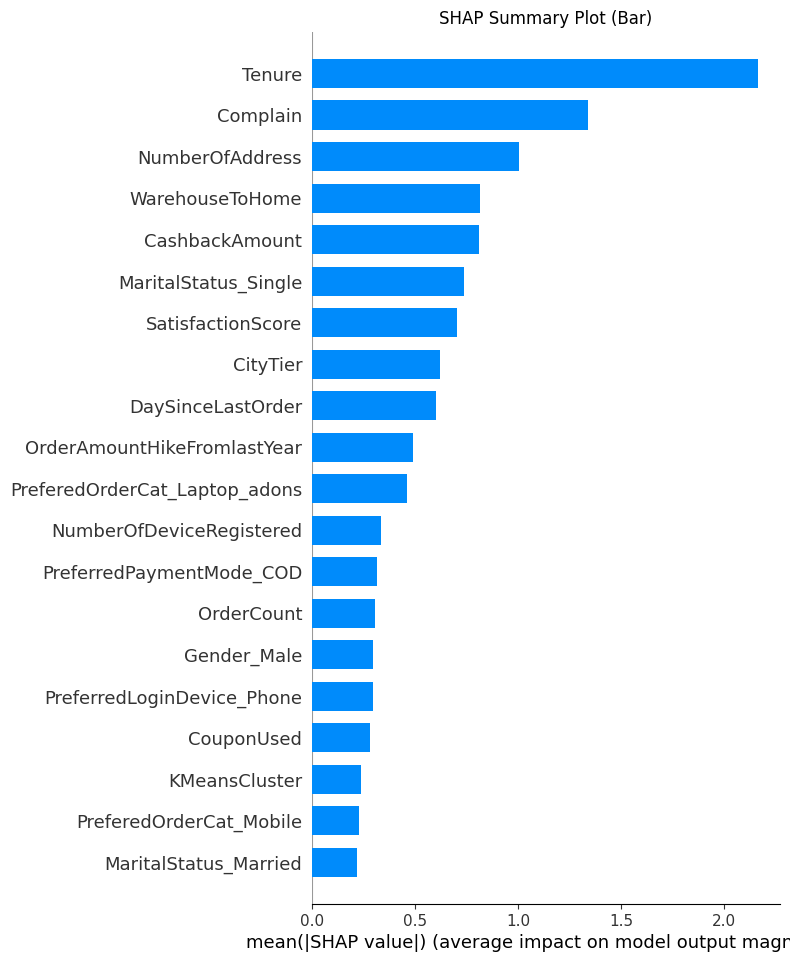

In [132]:
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
import pandas as pd


# Create SHAP Explainer
explainer = shap.# Ensure Feature Names are Correct
feature_names = X_test.columns.tolist()

# Generate SHAP Decision Plot
shap.decision_plot(explainer.expected_value, 
                   shap_values.values, X_test, 
                   feature_names=feature_names, show=False)

# Customize and Save the Plot
plt.title('SHAP Decision Plot')
plt.savefig('shap_decision_plot.png')
plt.show()Explainer(final_model, x_train)
shap_values = explainer(x_test)

# SHAP Summary Plot (Bar)
plt.figure(figsize=(10,5))  # shap's internal features override matplotlib settings
shap.summary_plot(shap_values, x_test, plot_type="bar", show=False)
plt.title('SHAP Summary Plot (Bar)')
plt.savefig('shap_summary_bar.png')
plt.show()

#### 2. SHAP Summary Plot - Beeswarm Plot

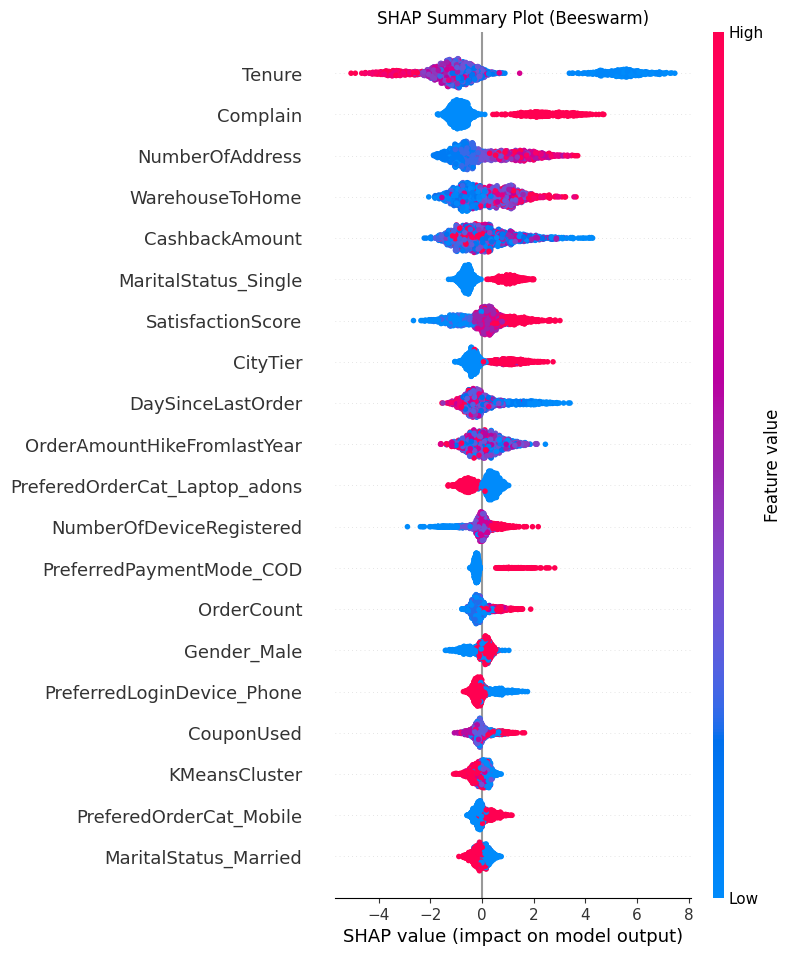

In [133]:
# SHAP Summary Plot (Beeswarm)
shap.summary_plot(shap_values, x_test, show=False)
plt.title('SHAP Summary Plot (Beeswarm)')
plt.savefig('shap_summary_beeswarm.png')
plt.show()

#### 3. SHAP Dependence Plot

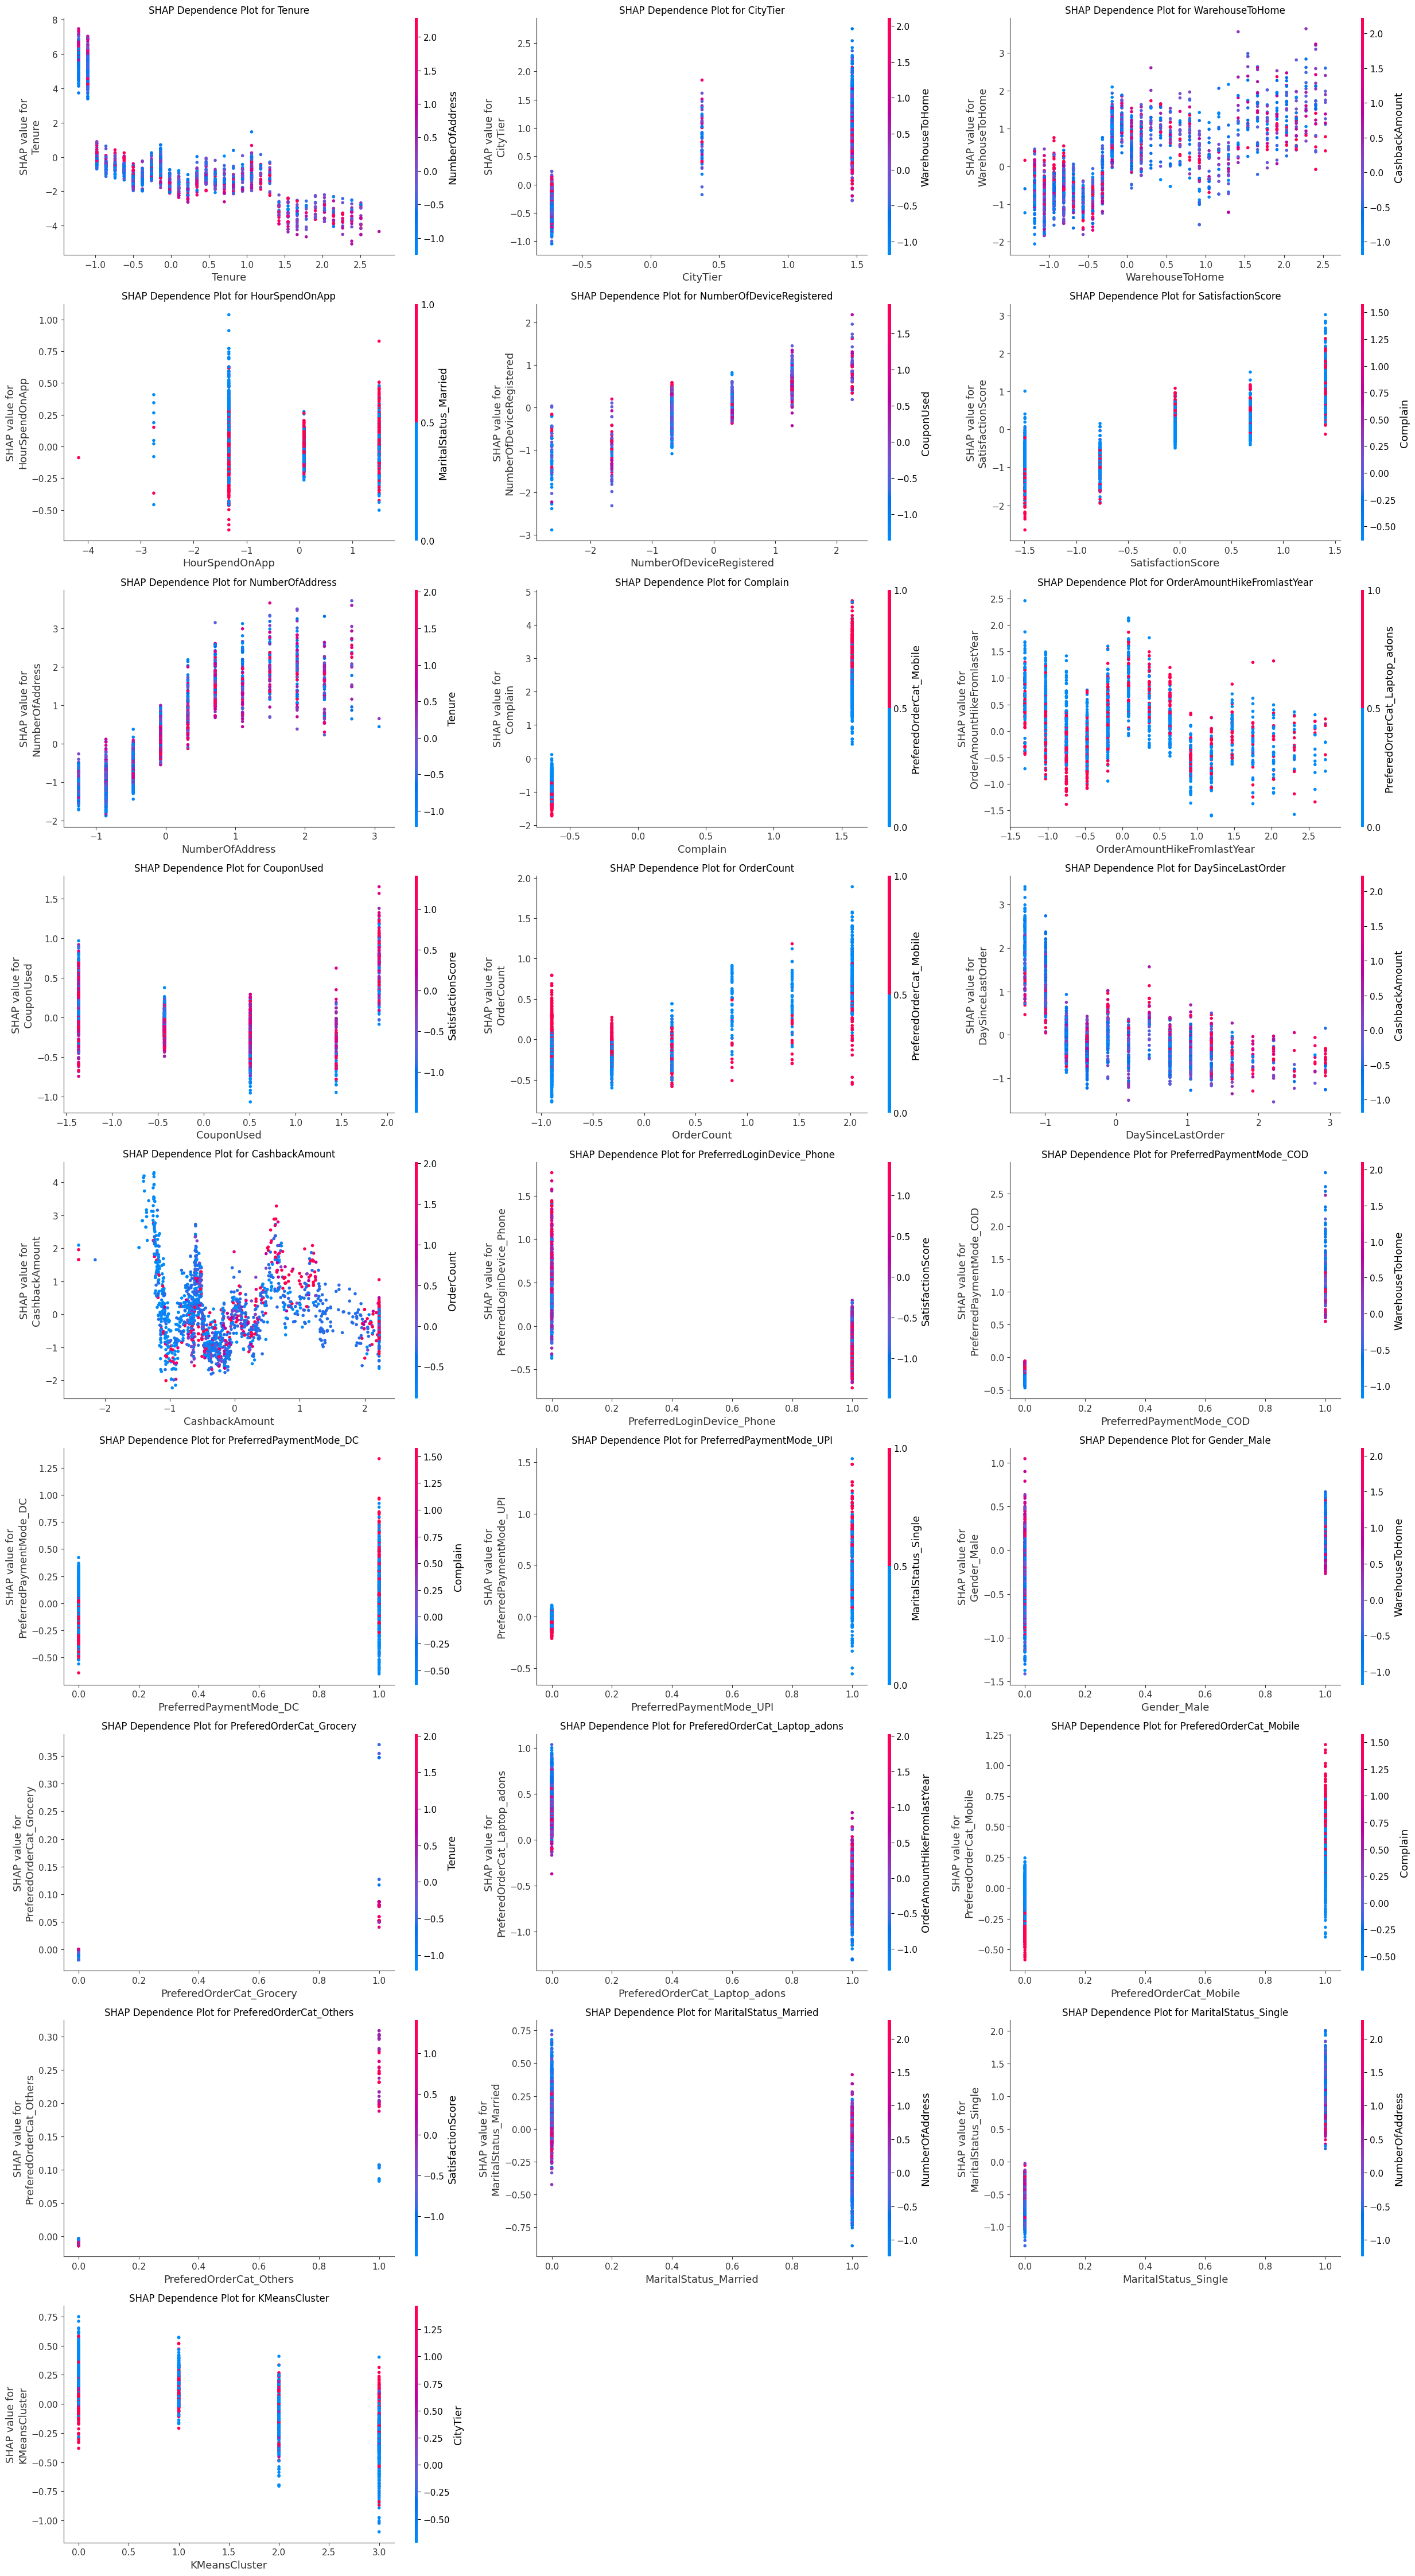

In [140]:
# SHAP Dependence Plots
col_per_row = 3
num_features = len(x_test.columns)
num_rows = int(np.ceil(num_features / col_per_row))

fig, axes = plt.subplots(num_rows, col_per_row, figsize=(25, 5*num_rows))

axes = axes.flatten()

for idx, feature in enumerate(x_test.columns):
    shap.dependence_plot(feature, shap_values.values, x_test, ax=axes[idx], show=False)
    axes[idx].set_title(f'SHAP Dependence Plot for {feature}')

for i in range(len(x_test.columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.savefig('shap dependence_grid.png')
plt.show()

#### 4. SHAP Interaction Plot

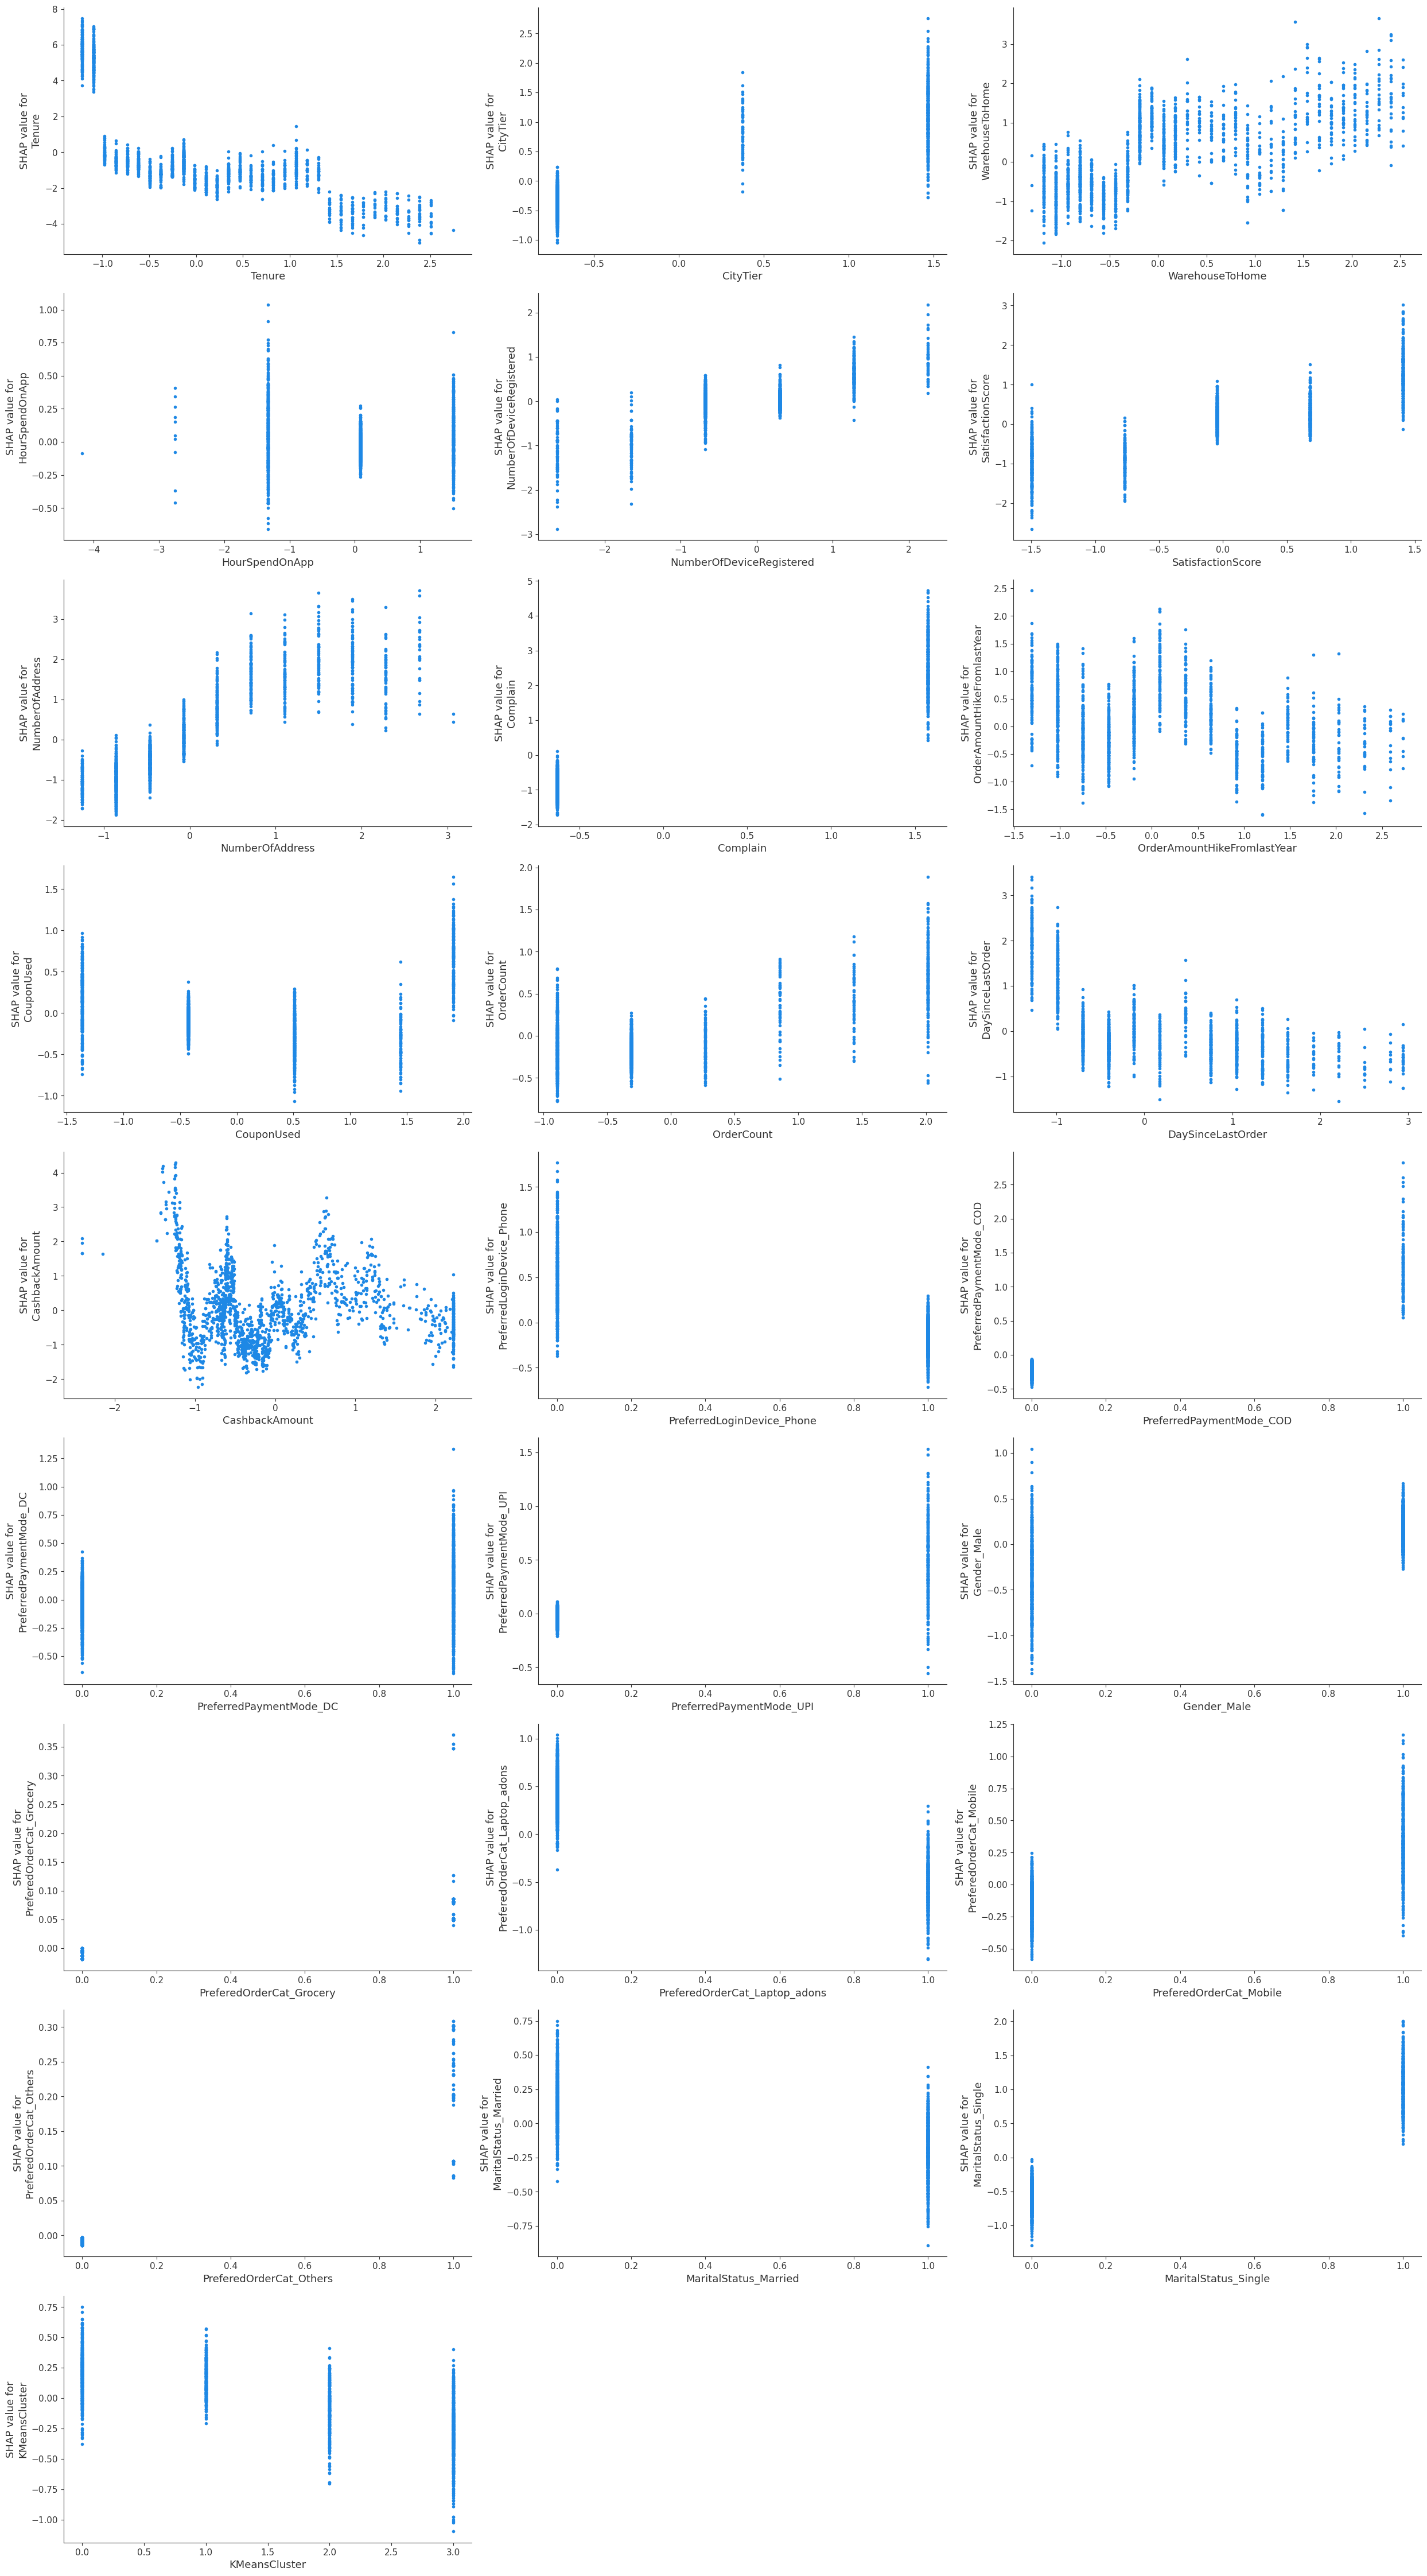

<Figure size 640x480 with 0 Axes>

In [146]:
cols_per_row = 3
num_features = len(x_test.columns)
num_rows = int(np.ceil(num_features/cols_per_row))

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(25, 5*num_rows))

axes = axes.flatten()

for idx, feature in enumerate(x_test.columns):
    shap.dependence_plot(feature, shap_values.values, x_test, ax=axes[idx],
                        interaction_index=None, show=False)
    plt.title(f'SHAP interaction plot for {feature}')

for i in range(len(x_test.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.savefig('shap_interaction_plots.png')

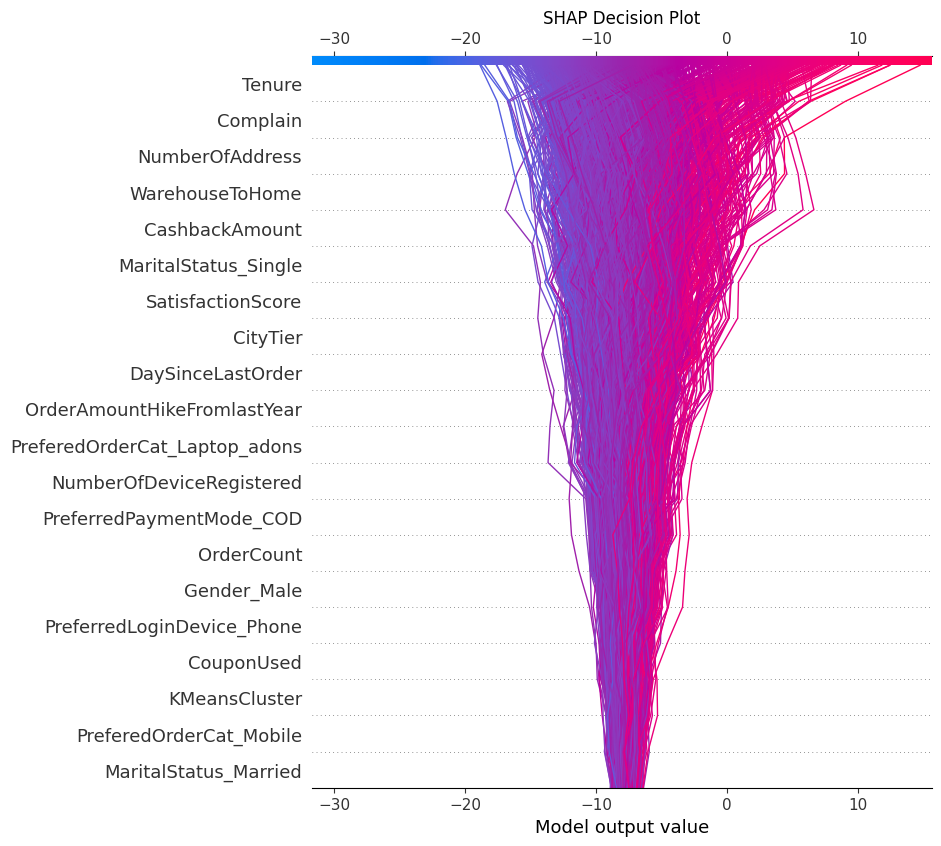

In [153]:
# SHAP Decision Plot
shap.decision_plot(explainer.expected_value, shap_values.values, x_test, show=False)
plt.title('SHAP Decision Plot')
plt.savefig('shap_decision_plot.png')
plt.show()

# Export the Training and Testin Dataset

In [154]:
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)

y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Export the XGBoost Model

In [97]:
# create a directory to save the pickle models
save_dir = os.path.join(os.getcwd(), 'model_exports')
os.makedirs(save_dir, exist_ok=True)

def save_model(model, path):
    try:
        with open(path, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model saved to {path}")
    except Exception as e:
        print(f"Failed to save model to {path}: {e}")


# Define the file paths
kmeans_path = os.path.join(save_dir, 'kmeans_model.pkl')
kmedoids_path = os.path.join(save_dir, 'kmedoids_model.pkl')
xgboost_path = os.path.join(save_dir, 'xgboost_model.pkl')

# Save the models
save_model(kmeans, kmeans_path)
# save_model(kmedoids, kmedoids_path)
save_model(final_model, xgboost_path)

Model saved to /home/flame/Desktop/Projects/Churn Prediction/model_exports/kmeans_model.pkl
Model saved to /home/flame/Desktop/Projects/Churn Prediction/model_exports/xgboost_model.pkl


# Export the Pre Processing Pipeline

In [98]:
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the numerical and categorical columns
numerical_cols = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
                  'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 
                  'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
                  'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 
                    'PreferedOrderCat', 'MaritalStatus']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ], remainder='passthrough')

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Save the preprocessor
preprocessor_path = os.path.join('model_exports', 'preprocessor.pkl')
with open(preprocessor_path, 'wb') as file:
    pickle.dump(preprocessor, file)
